In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
''' ラグ01（販売個数トレンド+ASP+Revenue58特徴量'''
#lag01 = pd.read_csv('./csv/target_lag01.csv')
'''Outlier最終データ'''
outlier_data = pd.read_csv('./csv/total_outlier_w_170_matrix_final.csv')
# sub data = matrix.iloc[181438:,:]
'''最終データ'''
data = pd.read_csv('./csv/matrix_final.csv')

In [3]:
data

,date_block_num,YYYY,MM,StoreId,ItemId,SoldNum,is_holiday,ItemCategoryId,Category,Type,...,date_shop_type_avg_item_cnt_lag_3,date_shop_type_avg_item_cnt_lag_6,date_shop_type_avg_item_cnt_lag_12,Revenue,delta_price_lag,delta_revenue_lag_1,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
0,12,2019,1,0,1000001,2.0,0.0,100,5,1,...,0.7334,1.0000,1.6670,840.0,12.0,1.023000,1,1,12,12
1,13,2019,2,0,1000001,1.0,0.0,100,5,1,...,0.3333,0.6665,0.6665,420.0,13.0,0.405800,1,1,13,13
2,14,2019,3,0,1000001,0.0,0.0,100,5,1,...,0.7334,0.5330,0.6665,0.0,14.0,0.145500,1,1,14,14
3,15,2019,4,0,1000001,0.0,0.0,100,5,1,...,0.6665,0.7334,0.8667,0.0,15.0,0.244000,1,1,15,15
4,16,2019,5,0,1000001,0.0,0.0,100,5,1,...,2.0660,0.3333,1.0000,0.0,16.0,-0.103150,1,1,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,17,2019,6,17,3500001,0.0,0.0,350,6,6,...,0.0000,1.0000,0.0000,0.0,17.0,-0.003078,1,-1,17,17
30596,18,2019,7,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,18.0,0.223300,1,-1,18,18
30597,19,2019,8,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,19.0,0.268300,1,-1,19,19
30598,20,2019,9,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,20.0,0.226000,1,-1,20,20


In [4]:
data = data[[
    'date_block_num',
    'YYYY', 
    'MM', 
    'StoreId',
    'ItemId', 
    'SoldNum',
    'is_holiday',
    'ItemCategoryId',
    'Category', 
    'Type',
    'SoldNum_lag_1',
    'SoldNum_lag_2',
    'SoldNum_lag_3',
    'SoldNum_lag_6',
    'SoldNum_lag_12',
    'date_avg_item_cnt_lag_1',#
    'date_avg_item_cnt_lag_2', #
    'date_avg_item_cnt_lag_3',#
    'date_avg_item_cnt_lag_6', #
    'date_avg_item_cnt_lag_12',#
    'date_shop_avg_item_cnt_lag_1',#
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12', 
    'date_itemcat_avg_item_cnt_lag_1',
    'date_itemcat_avg_item_cnt_lag_2',#
    'date_itemcat_avg_item_cnt_lag_3',#
    'date_itemcat_avg_item_cnt_lag_6',
    'date_itemcat_avg_item_cnt_lag_12', 
    'date_cat_avg_item_cnt_lag_1',#
    'date_cat_avg_item_cnt_lag_2',#
    'date_cat_avg_item_cnt_lag_3',#
    'date_cat_avg_item_cnt_lag_6', #
    'date_cat_avg_item_cnt_lag_12',#
    'date_type_avg_item_cnt_lag_1',
    'date_type_avg_item_cnt_lag_2',
    'date_type_avg_item_cnt_lag_3', 
    'date_type_avg_item_cnt_lag_6',#
    'date_type_avg_item_cnt_lag_12',#
    'date_shop_itemcat_avg_item_cnt_lag_1',
    'date_shop_itemcat_avg_item_cnt_lag_2',#
    'date_shop_itemcat_avg_item_cnt_lag_3',#
    'date_shop_itemcat_avg_item_cnt_lag_6',
    'date_shop_itemcat_avg_item_cnt_lag_12',#
    'date_shop_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_2',#
    'date_shop_cat_avg_item_cnt_lag_3',#
    'date_shop_cat_avg_item_cnt_lag_6',#
    'date_shop_cat_avg_item_cnt_lag_12',#
    'date_shop_type_avg_item_cnt_lag_1',
    'date_shop_type_avg_item_cnt_lag_2',#
    'date_shop_type_avg_item_cnt_lag_3',#
    'date_shop_type_avg_item_cnt_lag_6',
    'date_shop_type_avg_item_cnt_lag_12', #
    'Revenue', 
    'delta_price_lag',#
    'delta_revenue_lag_1', #
    'item_shop_last_sale', #
    'item_last_sale',#
    'item_shop_first_sale', #
    'item_first_sale'#
]]

In [5]:
data_from_outlier = outlier_data[[
    #'date_block_num',
    #'YYYY', 
    #'MM', 
    #'StoreId',
    #'ItemId', 
    #'SoldNum',
    #'is_holiday',
    #'ItemCategoryId',
    #'Category', 
    #'Type',
    #'SoldNum_lag_1',
    #'SoldNum_lag_2',
    #'SoldNum_lag_3',
    #'SoldNum_lag_6',
    #'SoldNum_lag_12',
    'date_avg_item_cnt_lag_1',#
    'date_avg_item_cnt_lag_2', #
    'date_avg_item_cnt_lag_3',#
    'date_avg_item_cnt_lag_6', #
    'date_avg_item_cnt_lag_12',#
    'date_shop_avg_item_cnt_lag_1',#
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12', 
    'date_itemcat_avg_item_cnt_lag_1',
    'date_itemcat_avg_item_cnt_lag_2',#
    'date_itemcat_avg_item_cnt_lag_3',#
    'date_itemcat_avg_item_cnt_lag_6',
    'date_itemcat_avg_item_cnt_lag_12', 
    'date_cat_avg_item_cnt_lag_1',#
    'date_cat_avg_item_cnt_lag_2',#
    'date_cat_avg_item_cnt_lag_3',#
    'date_cat_avg_item_cnt_lag_6', #
    'date_cat_avg_item_cnt_lag_12',#
    'date_type_avg_item_cnt_lag_1',
    'date_type_avg_item_cnt_lag_2',
    'date_type_avg_item_cnt_lag_3', 
    'date_type_avg_item_cnt_lag_6',#
    'date_type_avg_item_cnt_lag_12',#
    'date_shop_itemcat_avg_item_cnt_lag_1',
    'date_shop_itemcat_avg_item_cnt_lag_2',#
    'date_shop_itemcat_avg_item_cnt_lag_3',#
    'date_shop_itemcat_avg_item_cnt_lag_6',
    'date_shop_itemcat_avg_item_cnt_lag_12',#
    'date_shop_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_2',#
    'date_shop_cat_avg_item_cnt_lag_3',#
    'date_shop_cat_avg_item_cnt_lag_6',#
    'date_shop_cat_avg_item_cnt_lag_12',#
    'date_shop_type_avg_item_cnt_lag_1',
    'date_shop_type_avg_item_cnt_lag_2',#
    'date_shop_type_avg_item_cnt_lag_3',#
    'date_shop_type_avg_item_cnt_lag_6',
    'date_shop_type_avg_item_cnt_lag_12', #
    #'Revenue', 
    #'delta_price_lag',#
    #'delta_revenue_lag_1', #
    #'item_shop_last_sale', #
    #'item_last_sale',#
    #'item_shop_first_sale', #
    #'item_first_sale'#
]]

In [6]:
data_from_outlier.columns = [
    #'date_block_num',
    #'YYYY', 
    #'MM', 
    #'StoreId',
    #'ItemId', 
    #'SoldNum',
    #'is_holiday',
    #'ItemCategoryId',
    #'Category', 
    #'Type',
    #'SoldNum_lag_1',
    #'SoldNum_lag_2',
    #'SoldNum_lag_3',
    #'SoldNum_lag_6',
    #'SoldNum_lag_12',
    'date_avg_item_cnt_lag_1t',#
    'date_avg_item_cnt_lag_2t', #
    'date_avg_item_cnt_lag_3t',#
    'date_avg_item_cnt_lag_6t', #
    'date_avg_item_cnt_lag_12t',#
    'date_shop_avg_item_cnt_lag_1t',#
    'date_shop_avg_item_cnt_lag_2t',
    'date_shop_avg_item_cnt_lag_3t',
    'date_shop_avg_item_cnt_lag_6t',
    'date_shop_avg_item_cnt_lag_12t', 
    'date_itemcat_avg_item_cnt_lag_1t',
    'date_itemcat_avg_item_cnt_lag_2t',#
    'date_itemcat_avg_item_cnt_lag_3t',#
    'date_itemcat_avg_item_cnt_lag_6t',
    'date_itemcat_avg_item_cnt_lag_12t', 
    'date_cat_avg_item_cnt_lag_1t',#
    'date_cat_avg_item_cnt_lag_2t',#
    'date_cat_avg_item_cnt_lag_3t',#
    'date_cat_avg_item_cnt_lag_6t', #
    'date_cat_avg_item_cnt_lag_12t',#
    'date_type_avg_item_cnt_lag_1t',
    'date_type_avg_item_cnt_lag_2t',
    'date_type_avg_item_cnt_lag_3t', 
    'date_type_avg_item_cnt_lag_6t',#
    'date_type_avg_item_cnt_lag_12t',#
    'date_shop_itemcat_avg_item_cnt_lag_1t',
    'date_shop_itemcat_avg_item_cnt_lag_2t',#
    'date_shop_itemcat_avg_item_cnt_lag_3t',#
    'date_shop_itemcat_avg_item_cnt_lag_6t',
    'date_shop_itemcat_avg_item_cnt_lag_12t',#
    'date_shop_cat_avg_item_cnt_lag_1t',
    'date_shop_cat_avg_item_cnt_lag_2t',#
    'date_shop_cat_avg_item_cnt_lag_3t',#
    'date_shop_cat_avg_item_cnt_lag_6t',#
    'date_shop_cat_avg_item_cnt_lag_12t',#
    'date_shop_type_avg_item_cnt_lag_1t',
    'date_shop_type_avg_item_cnt_lag_2t',#
    'date_shop_type_avg_item_cnt_lag_3t',#
    'date_shop_type_avg_item_cnt_lag_6t',
    'date_shop_type_avg_item_cnt_lag_12t', #
    #'Revenue', 
    #'delta_price_lag',#
    #'delta_revenue_lag_1', #
    #'item_shop_last_sale', #
    #'item_last_sale',#
    #'item_shop_first_sale', #
    #'item_first_sale'#
]

In [7]:
print(data_from_outlier.shape,data.shape)

(211115, 40) (30600, 62)


In [8]:
outlier = data_from_outlier.iloc[180515:,:]
#outlier.to_csv('./csv/outlier_data_30600.csv',index=False)
outlier.shape

(30600, 40)

In [9]:
target = data
#target.to_csv('./csv/target30600_feature62.csv',index=False)
target.shape

(30600, 62)

In [10]:
outlier = pd.read_csv('./csv/outlier_data_30600.csv')
target = pd.read_csv('./csv/target30600_feature62.csv')

In [11]:
target

,date_block_num,YYYY,MM,StoreId,ItemId,SoldNum,is_holiday,ItemCategoryId,Category,Type,...,date_shop_type_avg_item_cnt_lag_3,date_shop_type_avg_item_cnt_lag_6,date_shop_type_avg_item_cnt_lag_12,Revenue,delta_price_lag,delta_revenue_lag_1,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
0,12,2019,1,0,1000001,2.0,0.0,100,5,1,...,0.7334,1.0000,1.6670,840.0,12.0,1.023000,1,1,12,12
1,13,2019,2,0,1000001,1.0,0.0,100,5,1,...,0.3333,0.6665,0.6665,420.0,13.0,0.405800,1,1,13,13
2,14,2019,3,0,1000001,0.0,0.0,100,5,1,...,0.7334,0.5330,0.6665,0.0,14.0,0.145500,1,1,14,14
3,15,2019,4,0,1000001,0.0,0.0,100,5,1,...,0.6665,0.7334,0.8667,0.0,15.0,0.244000,1,1,15,15
4,16,2019,5,0,1000001,0.0,0.0,100,5,1,...,2.0660,0.3333,1.0000,0.0,16.0,-0.103150,1,1,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,17,2019,6,17,3500001,0.0,0.0,350,6,6,...,0.0000,1.0000,0.0000,0.0,17.0,-0.003078,1,-1,17,17
30596,18,2019,7,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,18.0,0.223300,1,-1,18,18
30597,19,2019,8,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,19.0,0.268300,1,-1,19,19
30598,20,2019,9,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,20.0,0.226000,1,-1,20,20


In [12]:
target15 = target.iloc[:,:15]
target15

,date_block_num,YYYY,MM,StoreId,ItemId,SoldNum,is_holiday,ItemCategoryId,Category,Type,SoldNum_lag_1,SoldNum_lag_2,SoldNum_lag_3,SoldNum_lag_6,SoldNum_lag_12
0,12,2019,1,0,1000001,2.0,0.0,100,5,1,0.0,2.0,0.0,3.0,6.0
1,13,2019,2,0,1000001,1.0,0.0,100,5,1,2.0,0.0,2.0,2.0,3.0
2,14,2019,3,0,1000001,0.0,0.0,100,5,1,1.0,2.0,0.0,1.0,1.0
3,15,2019,4,0,1000001,0.0,0.0,100,5,1,0.0,1.0,2.0,0.0,2.0
4,16,2019,5,0,1000001,0.0,0.0,100,5,1,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,17,2019,6,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,1.0,0.0
30596,18,2019,7,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,0.0,0.0
30597,19,2019,8,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,0.0,0.0
30598,20,2019,9,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,0.0,0.0


In [13]:
SoldNum = data.iloc[:,5]
SoldNum

0        2.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
30595    0.0
30596    0.0
30597    0.0
30598    0.0
30599    0.0
Name: SoldNum, Length: 30600, dtype: float64

In [14]:
merged_data = pd.concat([target,outlier],axis=1)

# ターゲット絞込

# MinMaxScaler

In [15]:
from sklearn import preprocessing

#minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
std = preprocessing.StandardScaler()
scaled_data = std.fit_transform(data)
data= pd.DataFrame(scaled_data)


In [16]:
data

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,-1.566699,0.0,-1.566699,-1.638356,-1.268273,0.583357,-0.191008,-1.267972,0.391915,-1.069968,...,-0.142084,0.189926,1.666226,-0.025780,-1.566699,2.081910,0.354196,4.241982,-1.566699,-1.566699
1,-1.218544,0.0,-1.218544,-1.638356,-1.268273,0.079967,-0.191008,-1.267972,0.391915,-1.069968,...,-0.547736,-0.156702,0.122960,-0.165025,-1.218544,0.450969,0.354196,4.241982,-1.218544,-1.218544
2,-0.870388,0.0,-0.870388,-1.638356,-1.268273,-0.423424,-0.191008,-1.267972,0.391915,-1.069968,...,-0.142084,-0.295457,0.122960,-0.304269,-0.870388,-0.236870,0.354196,4.241982,-0.870388,-0.870388
3,-0.522233,0.0,-0.522233,-1.638356,-1.268273,-0.423424,-0.191008,-1.267972,0.391915,-1.069968,...,-0.209913,-0.087168,0.431768,-0.304269,-0.522233,0.023415,0.354196,4.241982,-0.522233,-0.522233
4,-0.174078,0.0,-0.174078,-1.638356,-1.268273,-0.423424,-0.191008,-1.267972,0.391915,-1.069968,...,1.209005,-0.503018,0.637382,-0.304269,-0.174078,-0.893924,0.354196,4.241982,-0.174078,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,0.174078,0.0,0.174078,1.638356,2.383203,-0.423424,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,0.189926,-0.905112,-0.304269,0.174078,-0.629485,0.354196,-0.235739,0.174078,0.174078
30596,0.522233,0.0,0.522233,1.638356,2.383203,-0.423424,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,-0.849438,-0.905112,-0.304269,0.522233,-0.031285,0.354196,-0.235739,0.522233,0.522233
30597,0.870388,0.0,0.870388,1.638356,2.383203,-0.423424,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,-0.849438,-0.905112,-0.304269,0.870388,0.087627,0.354196,-0.235739,0.870388,0.870388
30598,1.218544,0.0,1.218544,1.638356,2.383203,-0.423424,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,-0.849438,-0.905112,-0.304269,1.218544,-0.024150,0.354196,-0.235739,1.218544,1.218544


In [17]:
date_block_num = target.iloc[:,0]
temp_data = data.iloc[:,1:]
temp_data = temp_data.drop(columns=5)
data = pd.concat([date_block_num,temp_data],axis=1)
data

,date_block_num,1,2,3,4,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,12,0.0,-1.566699,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,-0.503006,...,-0.142084,0.189926,1.666226,-0.025780,-1.566699,2.081910,0.354196,4.241982,-1.566699,-1.566699
1,13,0.0,-1.218544,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,0.618531,...,-0.547736,-0.156702,0.122960,-0.165025,-1.218544,0.450969,0.354196,4.241982,-1.218544,-1.218544
2,14,0.0,-0.870388,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,0.057763,...,-0.142084,-0.295457,0.122960,-0.304269,-0.870388,-0.236870,0.354196,4.241982,-0.870388,-0.870388
3,15,0.0,-0.522233,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,-0.503006,...,-0.209913,-0.087168,0.431768,-0.304269,-0.522233,0.023415,0.354196,4.241982,-0.522233,-0.522233
4,16,0.0,-0.174078,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,-0.503006,...,1.209005,-0.503018,0.637382,-0.304269,-0.174078,-0.893924,0.354196,4.241982,-0.174078,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,17,0.0,0.174078,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,-0.503006,...,-0.885660,0.189926,-0.905112,-0.304269,0.174078,-0.629485,0.354196,-0.235739,0.174078,0.174078
30596,18,0.0,0.522233,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,-0.503006,...,-0.885660,-0.849438,-0.905112,-0.304269,0.522233,-0.031285,0.354196,-0.235739,0.522233,0.522233
30597,19,0.0,0.870388,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,-0.503006,...,-0.885660,-0.849438,-0.905112,-0.304269,0.870388,0.087627,0.354196,-0.235739,0.870388,0.870388
30598,20,0.0,1.218544,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,-0.503006,...,-0.885660,-0.849438,-0.905112,-0.304269,1.218544,-0.024150,0.354196,-0.235739,1.218544,1.218544


In [18]:
data = pd.concat([SoldNum,data],axis=1)
data

,SoldNum,date_block_num,1,2,3,4,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,2.0,12,0.0,-1.566699,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,...,-0.142084,0.189926,1.666226,-0.025780,-1.566699,2.081910,0.354196,4.241982,-1.566699,-1.566699
1,1.0,13,0.0,-1.218544,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,...,-0.547736,-0.156702,0.122960,-0.165025,-1.218544,0.450969,0.354196,4.241982,-1.218544,-1.218544
2,0.0,14,0.0,-0.870388,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,...,-0.142084,-0.295457,0.122960,-0.304269,-0.870388,-0.236870,0.354196,4.241982,-0.870388,-0.870388
3,0.0,15,0.0,-0.522233,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,...,-0.209913,-0.087168,0.431768,-0.304269,-0.522233,0.023415,0.354196,4.241982,-0.522233,-0.522233
4,0.0,16,0.0,-0.174078,-1.638356,-1.268273,-0.191008,-1.267972,0.391915,-1.069968,...,1.209005,-0.503018,0.637382,-0.304269,-0.174078,-0.893924,0.354196,4.241982,-0.174078,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,0.0,17,0.0,0.174078,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,0.189926,-0.905112,-0.304269,0.174078,-0.629485,0.354196,-0.235739,0.174078,0.174078
30596,0.0,18,0.0,0.522233,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,-0.849438,-0.905112,-0.304269,0.522233,-0.031285,0.354196,-0.235739,0.522233,0.522233
30597,0.0,19,0.0,0.870388,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,-0.849438,-0.905112,-0.304269,0.870388,0.087627,0.354196,-0.235739,0.870388,0.870388
30598,0.0,20,0.0,1.218544,1.638356,2.383203,-0.191008,2.383031,0.772632,-0.298575,...,-0.885660,-0.849438,-0.905112,-0.304269,1.218544,-0.024150,0.354196,-0.235739,1.218544,1.218544


# LGBR
# GridSearchCV

In [19]:
import lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [20]:
X_train = data[data.date_block_num < 15]
Y_train = data[(13 < data.date_block_num)&(data.date_block_num<17)]['SoldNum']
X_valid = data[data.date_block_num == 18]
Y_valid = data[data.date_block_num == 20]['SoldNum']
X_test = data[data.date_block_num == 21]

In [22]:
# ハイパーパラメータ探索 https://qiita.com/msrks/items/e3e958c04a5167575c41
lgbm_cv = GridSearchCV(LGBMRegressor(), {
    "objective":['regression'],
  "num_leaves": [5,10,25,],
    "min_data_in_leaf":[20,40,60],
      "max_depth": [5,7,10],
  "learning_rate": [0.1,0.01],

})

'''
MinMax
'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 20, 
'num_leaves': 25, 'objective': 'regression'} 0.21327088714933945

shifted n62
'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 20, 
'num_leaves': 25, 'objective': 'regression'} 0.21327088714933945

shifted n15
{'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 40, 
'num_leaves': 5, 'objective': 'regression'} 0.1752538218180977

shifted n102
{'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 40, 
'num_leaves': 10, 'objective': 'regression'} 0.20138616765120282

old data
{'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 60,
'num_leaves': 20, 'objective': 'regression'} 0.6624353697409473
n102
'learning_rate': 0.1, 'max_depth': 20, 'min_data_in_leaf': 40, 
'num_leaves': 50, 'objective': 'regression'} 0.6067086549632152

total outlier data trained
'learning_rate': 0.1, 'max_depth': 40, 'min_data_in_leaf': 40,
'num_leaves': 75, 'objective': 'regression'} 0.8608823814384993

'''
lgbm_cv.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10
    )

print(lgbm_cv.best_params_, lgbm_cv.best_score_)

[1]	valid_0's rmse: 1.66229	valid_0's l2: 2.76321	valid_1's rmse: 1.24655	valid_1's l2: 1.55388
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.62499	valid_0's l2: 2.64059	valid_1's rmse: 1.22789	valid_1's l2: 1.50772
[3]	valid_0's rmse: 1.59292	valid_0's l2: 2.53741	valid_1's rmse: 1.2128	valid_1's l2: 1.47088
[4]	valid_0's rmse: 1.56823	valid_0's l2: 2.45934	valid_1's rmse: 1.20433	valid_1's l2: 1.45041
[5]	valid_0's rmse: 1.54432	valid_0's l2: 2.38492	valid_1's rmse: 1.18652	valid_1's l2: 1.40783
[6]	valid_0's rmse: 1.52299	valid_0's l2: 2.31951	valid_1's rmse: 1.17589	valid_1's l2: 1.38271
[7]	valid_0's rmse: 1.5052	valid_0's l2: 2.26563	valid_1's rmse: 1.16175	valid_1's l2: 1.34967
[8]	valid_0's rmse: 1.48959	valid_0's l2: 2.21887	valid_1's rmse: 1.14924	valid_1's l2: 1.32076
[9]	valid_0's rmse: 1.47767	valid_0's l2: 2.18352	valid_1's rmse: 1.13881	valid_1's l2: 1.29689
[10]	valid_0's rmse: 1.46539	valid_0's l2: 2.14736	valid_1's rmse: 1.12877	va

[26]	valid_0's rmse: 1.33954	valid_0's l2: 1.79436	valid_1's rmse: 1.05464	valid_1's l2: 1.11226
[27]	valid_0's rmse: 1.33573	valid_0's l2: 1.78418	valid_1's rmse: 1.05273	valid_1's l2: 1.10823
[28]	valid_0's rmse: 1.32975	valid_0's l2: 1.76824	valid_1's rmse: 1.0496	valid_1's l2: 1.10167
[29]	valid_0's rmse: 1.3271	valid_0's l2: 1.76119	valid_1's rmse: 1.04852	valid_1's l2: 1.09939
[30]	valid_0's rmse: 1.3235	valid_0's l2: 1.75166	valid_1's rmse: 1.04741	valid_1's l2: 1.09707
[31]	valid_0's rmse: 1.32045	valid_0's l2: 1.7436	valid_1's rmse: 1.04507	valid_1's l2: 1.09218
[32]	valid_0's rmse: 1.314	valid_0's l2: 1.7266	valid_1's rmse: 1.04397	valid_1's l2: 1.08987
[33]	valid_0's rmse: 1.3079	valid_0's l2: 1.7106	valid_1's rmse: 1.04309	valid_1's l2: 1.08804
[34]	valid_0's rmse: 1.30282	valid_0's l2: 1.69734	valid_1's rmse: 1.04175	valid_1's l2: 1.08524
[35]	valid_0's rmse: 1.30104	valid_0's l2: 1.69271	valid_1's rmse: 1.04129	valid_1's l2: 1.08429
[36]	valid_0's rmse: 1.29692	valid_0's 

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.66053	valid_0's l2: 2.75735	valid_1's rmse: 1.24856	valid_1's l2: 1.55891
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.62084	valid_0's l2: 2.62714	valid_1's rmse: 1.22936	valid_1's l2: 1.51133
[3]	valid_0's rmse: 1.58881	valid_0's l2: 2.52431	valid_1's rmse: 1.21444	valid_1's l2: 1.47486
[4]	valid_0's rmse: 1.56106	valid_0's l2: 2.4369	valid_1's rmse: 1.19581	valid_1's l2: 1.42996
[5]	valid_0's rmse: 1.53668	valid_0's l2: 2.3614	valid_1's rmse: 1.18263	valid_1's l2: 1.3986
[6]	valid_0's rmse: 1.51647	valid_0's l2: 2.29967	valid_1's rmse: 1.17133	valid_1's l2: 1.37202
[7]	valid_0's rmse: 1.4973	valid_0's l2: 2.2419	valid_1's rmse: 1.1595	valid_1's l2: 1.34444
[8]	valid_0's rmse: 1.48076	valid_0's l2: 2.19266	valid_1's rmse: 1.14742	valid_1's l2: 1.31657
[9]	valid_0's rmse: 1.4673	valid_0's l2: 2.15298	valid_

[39]	valid_0's rmse: 1.2552	valid_0's l2: 1.57552	valid_1's rmse: 1.04332	valid_1's l2: 1.08851
[40]	valid_0's rmse: 1.25395	valid_0's l2: 1.5724	valid_1's rmse: 1.04319	valid_1's l2: 1.08825
[41]	valid_0's rmse: 1.25056	valid_0's l2: 1.56389	valid_1's rmse: 1.04012	valid_1's l2: 1.08185
[42]	valid_0's rmse: 1.24779	valid_0's l2: 1.55699	valid_1's rmse: 1.03991	valid_1's l2: 1.08142
[43]	valid_0's rmse: 1.24479	valid_0's l2: 1.54949	valid_1's rmse: 1.03952	valid_1's l2: 1.0806
[44]	valid_0's rmse: 1.24374	valid_0's l2: 1.54688	valid_1's rmse: 1.03995	valid_1's l2: 1.08149
[45]	valid_0's rmse: 1.24312	valid_0's l2: 1.54534	valid_1's rmse: 1.04156	valid_1's l2: 1.08485
[46]	valid_0's rmse: 1.24183	valid_0's l2: 1.54213	valid_1's rmse: 1.04147	valid_1's l2: 1.08466
[47]	valid_0's rmse: 1.238	valid_0's l2: 1.53265	valid_1's rmse: 1.0395	valid_1's l2: 1.08056
[48]	valid_0's rmse: 1.23507	valid_0's l2: 1.52539	valid_1's rmse: 1.03935	valid_1's l2: 1.08025
[49]	valid_0's rmse: 1.23439	valid_0

[20]	valid_0's rmse: 1.429	valid_0's l2: 2.04205	valid_1's rmse: 1.05988	valid_1's l2: 1.12334
[21]	valid_0's rmse: 1.42518	valid_0's l2: 2.03114	valid_1's rmse: 1.05698	valid_1's l2: 1.11721
[22]	valid_0's rmse: 1.41917	valid_0's l2: 2.01406	valid_1's rmse: 1.05479	valid_1's l2: 1.11258
[23]	valid_0's rmse: 1.4162	valid_0's l2: 2.00563	valid_1's rmse: 1.05306	valid_1's l2: 1.10893
[24]	valid_0's rmse: 1.41283	valid_0's l2: 1.9961	valid_1's rmse: 1.05161	valid_1's l2: 1.10588
[25]	valid_0's rmse: 1.41141	valid_0's l2: 1.99208	valid_1's rmse: 1.04982	valid_1's l2: 1.10213
[26]	valid_0's rmse: 1.40893	valid_0's l2: 1.98508	valid_1's rmse: 1.0488	valid_1's l2: 1.09998
[27]	valid_0's rmse: 1.40546	valid_0's l2: 1.97531	valid_1's rmse: 1.04663	valid_1's l2: 1.09543
[28]	valid_0's rmse: 1.4011	valid_0's l2: 1.96307	valid_1's rmse: 1.04388	valid_1's l2: 1.08968
[29]	valid_0's rmse: 1.3945	valid_0's l2: 1.94463	valid_1's rmse: 1.04352	valid_1's l2: 1.08893
[30]	valid_0's rmse: 1.39379	valid_0'

[54]	valid_0's rmse: 1.16618	valid_0's l2: 1.35997	valid_1's rmse: 1.02985	valid_1's l2: 1.06059
[55]	valid_0's rmse: 1.16419	valid_0's l2: 1.35534	valid_1's rmse: 1.02969	valid_1's l2: 1.06027
[56]	valid_0's rmse: 1.16294	valid_0's l2: 1.35242	valid_1's rmse: 1.02984	valid_1's l2: 1.06056
[57]	valid_0's rmse: 1.16213	valid_0's l2: 1.35056	valid_1's rmse: 1.02997	valid_1's l2: 1.06083
[58]	valid_0's rmse: 1.15937	valid_0's l2: 1.34413	valid_1's rmse: 1.02818	valid_1's l2: 1.05715
Early stopping, best iteration is:
[48]	valid_0's rmse: 1.17346	valid_0's l2: 1.37701	valid_1's rmse: 1.02573	valid_1's l2: 1.05212
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.65265	valid_0's l2: 2.73127	valid_1's rmse: 1.23502	valid_1's l2: 1.52528
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.60729	valid_0's l2: 2.58338	valid_1's rmse: 1.20777	valid_1's l2: 1.45871
[3]	vali

[32]	valid_0's rmse: 1.35775	valid_0's l2: 1.84349	valid_1's rmse: 1.04631	valid_1's l2: 1.09476
[33]	valid_0's rmse: 1.35663	valid_0's l2: 1.84045	valid_1's rmse: 1.04499	valid_1's l2: 1.092
[34]	valid_0's rmse: 1.35579	valid_0's l2: 1.83816	valid_1's rmse: 1.04407	valid_1's l2: 1.09008
[35]	valid_0's rmse: 1.35464	valid_0's l2: 1.83504	valid_1's rmse: 1.04397	valid_1's l2: 1.08986
[36]	valid_0's rmse: 1.35324	valid_0's l2: 1.83126	valid_1's rmse: 1.0447	valid_1's l2: 1.0914
[37]	valid_0's rmse: 1.34816	valid_0's l2: 1.81752	valid_1's rmse: 1.04625	valid_1's l2: 1.09464
[38]	valid_0's rmse: 1.34554	valid_0's l2: 1.81048	valid_1's rmse: 1.04635	valid_1's l2: 1.09485
[39]	valid_0's rmse: 1.34518	valid_0's l2: 1.8095	valid_1's rmse: 1.04765	valid_1's l2: 1.09756
[40]	valid_0's rmse: 1.3436	valid_0's l2: 1.80526	valid_1's rmse: 1.04759	valid_1's l2: 1.09744
[41]	valid_0's rmse: 1.34291	valid_0's l2: 1.80339	valid_1's rmse: 1.04801	valid_1's l2: 1.09833
[42]	valid_0's rmse: 1.34209	valid_0

[26]	valid_0's rmse: 1.41415	valid_0's l2: 1.99981	valid_1's rmse: 1.06052	valid_1's l2: 1.1247
[27]	valid_0's rmse: 1.41161	valid_0's l2: 1.99264	valid_1's rmse: 1.05896	valid_1's l2: 1.12139
[28]	valid_0's rmse: 1.40885	valid_0's l2: 1.98485	valid_1's rmse: 1.05709	valid_1's l2: 1.11743
[29]	valid_0's rmse: 1.40648	valid_0's l2: 1.9782	valid_1's rmse: 1.0553	valid_1's l2: 1.11365
[30]	valid_0's rmse: 1.39831	valid_0's l2: 1.95527	valid_1's rmse: 1.05402	valid_1's l2: 1.11096
[31]	valid_0's rmse: 1.39681	valid_0's l2: 1.95107	valid_1's rmse: 1.05277	valid_1's l2: 1.10832
[32]	valid_0's rmse: 1.39498	valid_0's l2: 1.94597	valid_1's rmse: 1.05076	valid_1's l2: 1.1041
[33]	valid_0's rmse: 1.39331	valid_0's l2: 1.9413	valid_1's rmse: 1.04993	valid_1's l2: 1.10234
[34]	valid_0's rmse: 1.3914	valid_0's l2: 1.936	valid_1's rmse: 1.049	valid_1's l2: 1.1004
[35]	valid_0's rmse: 1.3891	valid_0's l2: 1.92961	valid_1's rmse: 1.04841	valid_1's l2: 1.09916
[36]	valid_0's rmse: 1.38764	valid_0's l2:

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.67042	valid_0's l2: 2.79031	valid_1's rmse: 1.2472	valid_1's l2: 1.5555
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.63904	valid_0's l2: 2.68646	valid_1's rmse: 1.22685	valid_1's l2: 1.50516
[3]	valid_0's rmse: 1.613	valid_0's l2: 2.60176	valid_1's rmse: 1.21205	valid_1's l2: 1.46907
[4]	valid_0's rmse: 1.5898	valid_0's l2: 2.52745	valid_1's rmse: 1.19518	valid_1's l2: 1.42846
[5]	valid_0's rmse: 1.56971	valid_0's l2: 2.46398	valid_1's rmse: 1.18081	valid_1's l2: 1.39432
[6]	valid_0's rmse: 1.55265	valid_0's l2: 2.41072	valid_1's rmse: 1.16664	valid_1's l2: 1.36105
[7]	valid_0's rmse: 1.53738	valid_0's l2: 2.36355	valid_1's rmse: 1.15812	valid_1's l2: 1.34124
[8]	valid_0's rmse: 1.52412	valid_0's l2: 2.32294	valid_1's rmse: 1.14856	valid_1's l2: 1.31918
[9]	valid_0's rmse: 1.50578	valid_0's l2: 2.26736	vali

[8]	valid_0's rmse: 1.5103	valid_0's l2: 2.28101	valid_1's rmse: 1.11503	valid_1's l2: 1.24328
[9]	valid_0's rmse: 1.49873	valid_0's l2: 2.24619	valid_1's rmse: 1.10173	valid_1's l2: 1.21381
[10]	valid_0's rmse: 1.48715	valid_0's l2: 2.21162	valid_1's rmse: 1.09566	valid_1's l2: 1.20048
[11]	valid_0's rmse: 1.47748	valid_0's l2: 2.18296	valid_1's rmse: 1.08938	valid_1's l2: 1.18676
[12]	valid_0's rmse: 1.46652	valid_0's l2: 2.15068	valid_1's rmse: 1.08444	valid_1's l2: 1.176
[13]	valid_0's rmse: 1.45983	valid_0's l2: 2.13111	valid_1's rmse: 1.07556	valid_1's l2: 1.15684
[14]	valid_0's rmse: 1.45156	valid_0's l2: 2.10702	valid_1's rmse: 1.07116	valid_1's l2: 1.14737
[15]	valid_0's rmse: 1.44451	valid_0's l2: 2.08661	valid_1's rmse: 1.06766	valid_1's l2: 1.13989
[16]	valid_0's rmse: 1.43533	valid_0's l2: 2.06019	valid_1's rmse: 1.06482	valid_1's l2: 1.13383
[17]	valid_0's rmse: 1.43083	valid_0's l2: 2.04727	valid_1's rmse: 1.06213	valid_1's l2: 1.12813
[18]	valid_0's rmse: 1.42638	valid_

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.67238	valid_0's l2: 2.79685	valid_1's rmse: 1.23515	valid_1's l2: 1.5256
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.64669	valid_0's l2: 2.71158	valid_1's rmse: 1.21046	valid_1's l2: 1.46521
[3]	valid_0's rmse: 1.62177	valid_0's l2: 2.63014	valid_1's rmse: 1.18817	valid_1's l2: 1.41174
[4]	valid_0's rmse: 1.59773	valid_0's l2: 2.55275	valid_1's rmse: 1.16941	valid_1's l2: 1.36753
[5]	valid_0's rmse: 1.57893	valid_0's l2: 2.49301	valid_1's rmse: 1.15292	valid_1's l2: 1.32922
[6]	valid_0's rmse: 1.56276	valid_0's l2: 2.44223	valid_1's rmse: 1.14114	valid_1's l2: 1.30221
[7]	valid_0's rmse: 1.54763	valid_0's l2: 2.39516	valid_1's rmse: 1.12913	valid_1's l2: 1.27493
[8]	valid_0's rmse: 1.53561	valid_0's l2: 2.35808	valid_1's rmse: 1.11936	valid_1's l2: 1.25297
[9]	valid_0's rmse: 1.52505	valid_0's l2: 2.32577	

[15]	valid_0's rmse: 1.41371	valid_0's l2: 1.99858	valid_1's rmse: 1.06371	valid_1's l2: 1.13148
[16]	valid_0's rmse: 1.40059	valid_0's l2: 1.96166	valid_1's rmse: 1.06148	valid_1's l2: 1.12673
[17]	valid_0's rmse: 1.39296	valid_0's l2: 1.94035	valid_1's rmse: 1.05625	valid_1's l2: 1.11567
[18]	valid_0's rmse: 1.38716	valid_0's l2: 1.92422	valid_1's rmse: 1.05296	valid_1's l2: 1.10872
[19]	valid_0's rmse: 1.38016	valid_0's l2: 1.90485	valid_1's rmse: 1.05005	valid_1's l2: 1.1026
[20]	valid_0's rmse: 1.37366	valid_0's l2: 1.88694	valid_1's rmse: 1.04587	valid_1's l2: 1.09384
[21]	valid_0's rmse: 1.35762	valid_0's l2: 1.84312	valid_1's rmse: 1.0433	valid_1's l2: 1.08847
[22]	valid_0's rmse: 1.34378	valid_0's l2: 1.80575	valid_1's rmse: 1.04005	valid_1's l2: 1.0817
[23]	valid_0's rmse: 1.33583	valid_0's l2: 1.78444	valid_1's rmse: 1.03911	valid_1's l2: 1.07974
[24]	valid_0's rmse: 1.33073	valid_0's l2: 1.77083	valid_1's rmse: 1.03662	valid_1's l2: 1.07457
[25]	valid_0's rmse: 1.32016	vali

[3]	valid_0's rmse: 1.59014	valid_0's l2: 2.52854	valid_1's rmse: 1.18287	valid_1's l2: 1.39919
[4]	valid_0's rmse: 1.56239	valid_0's l2: 2.44107	valid_1's rmse: 1.16293	valid_1's l2: 1.35241
[5]	valid_0's rmse: 1.53842	valid_0's l2: 2.36674	valid_1's rmse: 1.14669	valid_1's l2: 1.31491
[6]	valid_0's rmse: 1.51836	valid_0's l2: 2.30542	valid_1's rmse: 1.13163	valid_1's l2: 1.28058
[7]	valid_0's rmse: 1.50151	valid_0's l2: 2.25454	valid_1's rmse: 1.11805	valid_1's l2: 1.25004
[8]	valid_0's rmse: 1.48678	valid_0's l2: 2.21052	valid_1's rmse: 1.1089	valid_1's l2: 1.22966
[9]	valid_0's rmse: 1.47084	valid_0's l2: 2.16336	valid_1's rmse: 1.09903	valid_1's l2: 1.20786
[10]	valid_0's rmse: 1.458	valid_0's l2: 2.12578	valid_1's rmse: 1.08935	valid_1's l2: 1.18668
[11]	valid_0's rmse: 1.44839	valid_0's l2: 2.09785	valid_1's rmse: 1.08133	valid_1's l2: 1.16927
[12]	valid_0's rmse: 1.43397	valid_0's l2: 2.05626	valid_1's rmse: 1.07584	valid_1's l2: 1.15744
[13]	valid_0's rmse: 1.4137	valid_0's l2

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.66405	valid_0's l2: 2.76905	valid_1's rmse: 1.24066	valid_1's l2: 1.53923
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.62779	valid_0's l2: 2.64969	valid_1's rmse: 1.21199	valid_1's l2: 1.46891
[3]	valid_0's rmse: 1.59794	valid_0's l2: 2.55342	valid_1's rmse: 1.19076	valid_1's l2: 1.4179
[4]	valid_0's rmse: 1.5705	valid_0's l2: 2.46647	valid_1's rmse: 1.1709	valid_1's l2: 1.371
[5]	valid_0's rmse: 1.5481	valid_0's l2: 2.39662	valid_1's rmse: 1.15359	valid_1's l2: 1.33077
[6]	valid_0's rmse: 1.52789	valid_0's l2: 2.33444	valid_1's rmse: 1.13646	valid_1's l2: 1.29154
[7]	valid_0's rmse: 1.50992	valid_0's l2: 2.27985	valid_1's rmse: 1.12184	valid_1's l2: 1.25853
[8]	valid_0's rmse: 1.49488	valid_0's l2: 2.23467	valid_1's rmse: 1.11049	valid_1's l2: 1.2332
[9]	valid_0's rmse: 1.48187	valid_0's l2: 2.19594	valid_

[29]	valid_0's rmse: 1.38815	valid_0's l2: 1.92695	valid_1's rmse: 1.04514	valid_1's l2: 1.09233
[30]	valid_0's rmse: 1.3859	valid_0's l2: 1.92071	valid_1's rmse: 1.0439	valid_1's l2: 1.08972
[31]	valid_0's rmse: 1.38383	valid_0's l2: 1.91498	valid_1's rmse: 1.04248	valid_1's l2: 1.08677
[32]	valid_0's rmse: 1.38072	valid_0's l2: 1.9064	valid_1's rmse: 1.04191	valid_1's l2: 1.08557
[33]	valid_0's rmse: 1.37893	valid_0's l2: 1.90144	valid_1's rmse: 1.0417	valid_1's l2: 1.08514
[34]	valid_0's rmse: 1.37659	valid_0's l2: 1.895	valid_1's rmse: 1.03969	valid_1's l2: 1.08095
[35]	valid_0's rmse: 1.37522	valid_0's l2: 1.89124	valid_1's rmse: 1.03873	valid_1's l2: 1.07895
[36]	valid_0's rmse: 1.37329	valid_0's l2: 1.88592	valid_1's rmse: 1.03856	valid_1's l2: 1.07862
[37]	valid_0's rmse: 1.37137	valid_0's l2: 1.88065	valid_1's rmse: 1.0376	valid_1's l2: 1.0766
[38]	valid_0's rmse: 1.36994	valid_0's l2: 1.87673	valid_1's rmse: 1.03712	valid_1's l2: 1.07562
[39]	valid_0's rmse: 1.36438	valid_0's

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.67183	valid_0's l2: 2.79502	valid_1's rmse: 1.24585	valid_1's l2: 1.55215
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.64181	valid_0's l2: 2.69555	valid_1's rmse: 1.22256	valid_1's l2: 1.49464
[3]	valid_0's rmse: 1.61675	valid_0's l2: 2.61388	valid_1's rmse: 1.20319	valid_1's l2: 1.44766
[4]	valid_0's rmse: 1.59556	valid_0's l2: 2.54582	valid_1's rmse: 1.18468	valid_1's l2: 1.40346
[5]	valid_0's rmse: 1.57767	valid_0's l2: 2.48904	valid_1's rmse: 1.17046	valid_1's l2: 1.36997
[6]	valid_0's rmse: 1.55751	valid_0's l2: 2.42583	valid_1's rmse: 1.16123	valid_1's l2: 1.34845
[7]	valid_0's rmse: 1.54355	valid_0's l2: 2.38254	valid_1's rmse: 1.15109	valid_1's l2: 1.32501
[8]	valid_0's rmse: 1.53084	valid_0's l2: 2.34348	valid_1's rmse: 1.14237	valid_1's l2: 1.305
[9]	valid_0's rmse: 1.51912	valid_0's l2: 2.30772	v

[34]	valid_0's rmse: 1.37219	valid_0's l2: 1.8829	valid_1's rmse: 1.0296	valid_1's l2: 1.06007
[35]	valid_0's rmse: 1.37129	valid_0's l2: 1.88043	valid_1's rmse: 1.02943	valid_1's l2: 1.05973
[36]	valid_0's rmse: 1.3643	valid_0's l2: 1.86131	valid_1's rmse: 1.02951	valid_1's l2: 1.05988
[37]	valid_0's rmse: 1.36314	valid_0's l2: 1.85815	valid_1's rmse: 1.02984	valid_1's l2: 1.06057
[38]	valid_0's rmse: 1.36236	valid_0's l2: 1.85601	valid_1's rmse: 1.02982	valid_1's l2: 1.06053
[39]	valid_0's rmse: 1.35688	valid_0's l2: 1.84113	valid_1's rmse: 1.0295	valid_1's l2: 1.05987
[40]	valid_0's rmse: 1.35564	valid_0's l2: 1.83776	valid_1's rmse: 1.02966	valid_1's l2: 1.0602
[41]	valid_0's rmse: 1.35081	valid_0's l2: 1.82468	valid_1's rmse: 1.02684	valid_1's l2: 1.05441
[42]	valid_0's rmse: 1.34974	valid_0's l2: 1.82179	valid_1's rmse: 1.0264	valid_1's l2: 1.05349
[43]	valid_0's rmse: 1.3491	valid_0's l2: 1.82007	valid_1's rmse: 1.02596	valid_1's l2: 1.0526
[44]	valid_0's rmse: 1.34499	valid_0's

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.67381	valid_0's l2: 2.80165	valid_1's rmse: 1.23411	valid_1's l2: 1.52302
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.64528	valid_0's l2: 2.70694	valid_1's rmse: 1.20759	valid_1's l2: 1.45827
[3]	valid_0's rmse: 1.62087	valid_0's l2: 2.62723	valid_1's rmse: 1.18457	valid_1's l2: 1.4032
[4]	valid_0's rmse: 1.59907	valid_0's l2: 2.55702	valid_1's rmse: 1.16557	valid_1's l2: 1.35856
[5]	valid_0's rmse: 1.57944	valid_0's l2: 2.49463	valid_1's rmse: 1.14586	valid_1's l2: 1.313
[6]	valid_0's rmse: 1.56391	valid_0's l2: 2.4458	valid_1's rmse: 1.13158	valid_1's l2: 1.28048
[7]	valid_0's rmse: 1.55051	valid_0's l2: 2.40409	valid_1's rmse: 1.11752	valid_1's l2: 1.24885
[8]	valid_0's rmse: 1.53876	valid_0's l2: 2.36777	valid_1's rmse: 1.10812	valid_1's l2: 1.22792
[9]	valid_0's rmse: 1.52715	valid_0's l2: 2.33219	val

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.66897	valid_0's l2: 2.78545	valid_1's rmse: 1.23641	valid_1's l2: 1.5287
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.63699	valid_0's l2: 2.67975	valid_1's rmse: 1.20605	valid_1's l2: 1.45456
[3]	valid_0's rmse: 1.60997	valid_0's l2: 2.592	valid_1's rmse: 1.18527	valid_1's l2: 1.40486
[4]	valid_0's rmse: 1.58742	valid_0's l2: 2.51992	valid_1's rmse: 1.16617	valid_1's l2: 1.35995
[5]	valid_0's rmse: 1.5675	valid_0's l2: 2.45706	valid_1's rmse: 1.14918	valid_1's l2: 1.32063
[6]	valid_0's rmse: 1.54869	valid_0's l2: 2.39844	valid_1's rmse: 1.13466	valid_1's l2: 1.28744
[7]	valid_0's rmse: 1.53461	valid_0's l2: 2.35502	valid_1's rmse: 1.1237	valid_1's l2: 1.26271
[8]	valid_0's rmse: 1.5202	valid_0's l2: 2.31102	valid_1's rmse: 1.10915	valid_1's l2: 1.2302
[9]	valid_0's rmse: 1.50887	valid_0's l2: 2.27669	valid_

[89]	valid_0's rmse: 1.27125	valid_0's l2: 1.61608	valid_1's rmse: 1.01374	valid_1's l2: 1.02767
[90]	valid_0's rmse: 1.27119	valid_0's l2: 1.61594	valid_1's rmse: 1.01375	valid_1's l2: 1.0277
[91]	valid_0's rmse: 1.27039	valid_0's l2: 1.6139	valid_1's rmse: 1.01327	valid_1's l2: 1.02671
Early stopping, best iteration is:
[81]	valid_0's rmse: 1.2806	valid_0's l2: 1.63995	valid_1's rmse: 1.01215	valid_1's l2: 1.02445
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.66544	valid_0's l2: 2.77369	valid_1's rmse: 1.23721	valid_1's l2: 1.53069
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.62988	valid_0's l2: 2.6565	valid_1's rmse: 1.21053	valid_1's l2: 1.46539
[3]	valid_0's rmse: 1.60111	valid_0's l2: 2.56356	valid_1's rmse: 1.18606	valid_1's l2: 1.40674
[4]	valid_0's rmse: 1.57517	valid_0's l2: 2.48115	valid_1's rmse: 1.16553	valid_1's l2: 1.35847
[5]	valid_0's 

[1]	valid_0's rmse: 1.66588	valid_0's l2: 2.77516	valid_1's rmse: 1.23666	valid_1's l2: 1.52934
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.63205	valid_0's l2: 2.66357	valid_1's rmse: 1.20845	valid_1's l2: 1.46035
[3]	valid_0's rmse: 1.60242	valid_0's l2: 2.56774	valid_1's rmse: 1.18381	valid_1's l2: 1.40141
[4]	valid_0's rmse: 1.57809	valid_0's l2: 2.49036	valid_1's rmse: 1.16409	valid_1's l2: 1.35511
[5]	valid_0's rmse: 1.55728	valid_0's l2: 2.42513	valid_1's rmse: 1.14744	valid_1's l2: 1.31662
[6]	valid_0's rmse: 1.53948	valid_0's l2: 2.36999	valid_1's rmse: 1.13385	valid_1's l2: 1.28562
[7]	valid_0's rmse: 1.52371	valid_0's l2: 2.32168	valid_1's rmse: 1.12339	valid_1's l2: 1.26199
[8]	valid_0's rmse: 1.50992	valid_0's l2: 2.27986	valid_1's rmse: 1.11433	valid_1's l2: 1.24172
[9]	valid_0's rmse: 1.48868	valid_0's l2: 2.21616	valid_1's rmse: 1.10622	valid_1's l2: 1.22373
[10]	valid_0's rmse: 1.4779	valid_0's l2: 2.1842	valid_1's rmse: 1.09972	va

[37]	valid_0's rmse: 1.31681	valid_0's l2: 1.734	valid_1's rmse: 1.04424	valid_1's l2: 1.09044
[38]	valid_0's rmse: 1.31201	valid_0's l2: 1.72138	valid_1's rmse: 1.04384	valid_1's l2: 1.0896
[39]	valid_0's rmse: 1.31083	valid_0's l2: 1.71827	valid_1's rmse: 1.04334	valid_1's l2: 1.08855
[40]	valid_0's rmse: 1.30982	valid_0's l2: 1.71563	valid_1's rmse: 1.04278	valid_1's l2: 1.08739
[41]	valid_0's rmse: 1.30875	valid_0's l2: 1.71282	valid_1's rmse: 1.04155	valid_1's l2: 1.08482
[42]	valid_0's rmse: 1.30686	valid_0's l2: 1.70789	valid_1's rmse: 1.04151	valid_1's l2: 1.08474
[43]	valid_0's rmse: 1.30531	valid_0's l2: 1.70382	valid_1's rmse: 1.04049	valid_1's l2: 1.08263
[44]	valid_0's rmse: 1.30411	valid_0's l2: 1.7007	valid_1's rmse: 1.04022	valid_1's l2: 1.08206
[45]	valid_0's rmse: 1.30048	valid_0's l2: 1.69126	valid_1's rmse: 1.03743	valid_1's l2: 1.07626
[46]	valid_0's rmse: 1.29935	valid_0's l2: 1.68832	valid_1's rmse: 1.03731	valid_1's l2: 1.07601
[47]	valid_0's rmse: 1.29827	valid

[21]	valid_0's rmse: 1.36633	valid_0's l2: 1.86686	valid_1's rmse: 1.06557	valid_1's l2: 1.13543
[22]	valid_0's rmse: 1.36237	valid_0's l2: 1.85604	valid_1's rmse: 1.06295	valid_1's l2: 1.12987
[23]	valid_0's rmse: 1.35783	valid_0's l2: 1.84372	valid_1's rmse: 1.05937	valid_1's l2: 1.12227
[24]	valid_0's rmse: 1.35432	valid_0's l2: 1.83417	valid_1's rmse: 1.05787	valid_1's l2: 1.11909
[25]	valid_0's rmse: 1.34494	valid_0's l2: 1.80886	valid_1's rmse: 1.05655	valid_1's l2: 1.11629
[26]	valid_0's rmse: 1.33954	valid_0's l2: 1.79436	valid_1's rmse: 1.05464	valid_1's l2: 1.11226
[27]	valid_0's rmse: 1.33573	valid_0's l2: 1.78418	valid_1's rmse: 1.05273	valid_1's l2: 1.10823
[28]	valid_0's rmse: 1.32975	valid_0's l2: 1.76824	valid_1's rmse: 1.0496	valid_1's l2: 1.10167
[29]	valid_0's rmse: 1.3271	valid_0's l2: 1.76119	valid_1's rmse: 1.04852	valid_1's l2: 1.09939
[30]	valid_0's rmse: 1.3235	valid_0's l2: 1.75166	valid_1's rmse: 1.04741	valid_1's l2: 1.09707
[31]	valid_0's rmse: 1.32045	vali

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.66053	valid_0's l2: 2.75735	valid_1's rmse: 1.24856	valid_1's l2: 1.55891
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.62084	valid_0's l2: 2.62714	valid_1's rmse: 1.22936	valid_1's l2: 1.51133
[3]	valid_0's rmse: 1.58881	valid_0's l2: 2.52431	valid_1's rmse: 1.21444	valid_1's l2: 1.47486
[4]	valid_0's rmse: 1.56106	valid_0's l2: 2.4369	valid_1's rmse: 1.19581	valid_1's l2: 1.42996
[5]	valid_0's rmse: 1.53668	valid_0's l2: 2.3614	valid_1's rmse: 1.18263	valid_1's l2: 1.3986
[6]	valid_0's rmse: 1.51647	valid_0's l2: 2.29967	valid_1's rmse: 1.17133	valid_1's l2: 1.37202
[7]	valid_0's rmse: 1.4973	valid_0's l2: 2.2419	valid_1's rmse: 1.1595	valid_1's l2: 1.34444
[8]	valid_0's rmse: 1.48076	valid_0's l2: 2.19266	valid_1's rmse: 1.14742	valid_1's l2: 1.31657
[9]	valid_0's rmse: 1.4673	valid_0's l2: 2.15298	valid_

[67]	valid_0's rmse: 1.20038	valid_0's l2: 1.44091	valid_1's rmse: 1.03919	valid_1's l2: 1.07991
Early stopping, best iteration is:
[57]	valid_0's rmse: 1.20886	valid_0's l2: 1.46135	valid_1's rmse: 1.03347	valid_1's l2: 1.06806
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.65017	valid_0's l2: 2.72308	valid_1's rmse: 1.23873	valid_1's l2: 1.53445
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.60197	valid_0's l2: 2.56631	valid_1's rmse: 1.21305	valid_1's l2: 1.4715
[3]	valid_0's rmse: 1.56127	valid_0's l2: 2.43756	valid_1's rmse: 1.19134	valid_1's l2: 1.4193
[4]	valid_0's rmse: 1.52736	valid_0's l2: 2.33282	valid_1's rmse: 1.17276	valid_1's l2: 1.37538
[5]	valid_0's rmse: 1.49758	valid_0's l2: 2.24275	valid_1's rmse: 1.15112	valid_1's l2: 1.32508
[6]	valid_0's rmse: 1.47346	valid_0's l2: 2.17108	valid_1's rmse: 1.13588	valid_1's l2: 1.29022
[7]	valid_0's 

[3]	valid_0's rmse: 1.56255	valid_0's l2: 2.44155	valid_1's rmse: 1.19249	valid_1's l2: 1.42204
[4]	valid_0's rmse: 1.52786	valid_0's l2: 2.33436	valid_1's rmse: 1.17226	valid_1's l2: 1.37419
[5]	valid_0's rmse: 1.49823	valid_0's l2: 2.24468	valid_1's rmse: 1.15457	valid_1's l2: 1.33302
[6]	valid_0's rmse: 1.47304	valid_0's l2: 2.16984	valid_1's rmse: 1.14172	valid_1's l2: 1.30352
[7]	valid_0's rmse: 1.44667	valid_0's l2: 2.09285	valid_1's rmse: 1.1323	valid_1's l2: 1.28211
[8]	valid_0's rmse: 1.42773	valid_0's l2: 2.03841	valid_1's rmse: 1.12201	valid_1's l2: 1.2589
[9]	valid_0's rmse: 1.41035	valid_0's l2: 1.98907	valid_1's rmse: 1.11359	valid_1's l2: 1.24009
[10]	valid_0's rmse: 1.39351	valid_0's l2: 1.94188	valid_1's rmse: 1.10647	valid_1's l2: 1.22429
[11]	valid_0's rmse: 1.3767	valid_0's l2: 1.89529	valid_1's rmse: 1.09959	valid_1's l2: 1.20909
[12]	valid_0's rmse: 1.36575	valid_0's l2: 1.86527	valid_1's rmse: 1.09421	valid_1's l2: 1.19729
[13]	valid_0's rmse: 1.35084	valid_0's l

[10]	valid_0's rmse: 1.37976	valid_0's l2: 1.90374	valid_1's rmse: 1.09312	valid_1's l2: 1.19491
[11]	valid_0's rmse: 1.36506	valid_0's l2: 1.86339	valid_1's rmse: 1.08623	valid_1's l2: 1.17989
[12]	valid_0's rmse: 1.35121	valid_0's l2: 1.82578	valid_1's rmse: 1.07966	valid_1's l2: 1.16567
[13]	valid_0's rmse: 1.33982	valid_0's l2: 1.79513	valid_1's rmse: 1.0736	valid_1's l2: 1.15261
[14]	valid_0's rmse: 1.32752	valid_0's l2: 1.76232	valid_1's rmse: 1.06927	valid_1's l2: 1.14334
[15]	valid_0's rmse: 1.31826	valid_0's l2: 1.7378	valid_1's rmse: 1.06476	valid_1's l2: 1.13371
[16]	valid_0's rmse: 1.30828	valid_0's l2: 1.7116	valid_1's rmse: 1.06358	valid_1's l2: 1.1312
[17]	valid_0's rmse: 1.29946	valid_0's l2: 1.6886	valid_1's rmse: 1.06078	valid_1's l2: 1.12526
[18]	valid_0's rmse: 1.29151	valid_0's l2: 1.668	valid_1's rmse: 1.05838	valid_1's l2: 1.12017
[19]	valid_0's rmse: 1.28465	valid_0's l2: 1.65033	valid_1's rmse: 1.05759	valid_1's l2: 1.1185
[20]	valid_0's rmse: 1.27924	valid_0's

[37]	valid_0's rmse: 1.30403	valid_0's l2: 1.7005	valid_1's rmse: 1.04862	valid_1's l2: 1.09961
[38]	valid_0's rmse: 1.30322	valid_0's l2: 1.69838	valid_1's rmse: 1.04859	valid_1's l2: 1.09954
[39]	valid_0's rmse: 1.30163	valid_0's l2: 1.69424	valid_1's rmse: 1.04888	valid_1's l2: 1.10015
[40]	valid_0's rmse: 1.30099	valid_0's l2: 1.69259	valid_1's rmse: 1.04855	valid_1's l2: 1.09945
[41]	valid_0's rmse: 1.3	valid_0's l2: 1.69	valid_1's rmse: 1.04785	valid_1's l2: 1.09799
[42]	valid_0's rmse: 1.29913	valid_0's l2: 1.68773	valid_1's rmse: 1.04744	valid_1's l2: 1.09714
Early stopping, best iteration is:
[32]	valid_0's rmse: 1.31488	valid_0's l2: 1.72892	valid_1's rmse: 1.04068	valid_1's l2: 1.08302
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.64361	valid_0's l2: 2.70146	valid_1's rmse: 1.23187	valid_1's l2: 1.51751
Training until validation scores don't improve for 10 rounds
[2]	valid_0's r

[42]	valid_0's rmse: 1.37157	valid_0's l2: 1.8812	valid_1's rmse: 1.04489	valid_1's l2: 1.0918
[43]	valid_0's rmse: 1.36974	valid_0's l2: 1.8762	valid_1's rmse: 1.04495	valid_1's l2: 1.09191
[44]	valid_0's rmse: 1.36754	valid_0's l2: 1.87017	valid_1's rmse: 1.04444	valid_1's l2: 1.09085
[45]	valid_0's rmse: 1.36637	valid_0's l2: 1.86696	valid_1's rmse: 1.04271	valid_1's l2: 1.08725
[46]	valid_0's rmse: 1.36038	valid_0's l2: 1.85063	valid_1's rmse: 1.0423	valid_1's l2: 1.08639
[47]	valid_0's rmse: 1.35881	valid_0's l2: 1.84638	valid_1's rmse: 1.04152	valid_1's l2: 1.08476
[48]	valid_0's rmse: 1.35825	valid_0's l2: 1.84484	valid_1's rmse: 1.04207	valid_1's l2: 1.08592
[49]	valid_0's rmse: 1.3534	valid_0's l2: 1.8317	valid_1's rmse: 1.04178	valid_1's l2: 1.0853
[50]	valid_0's rmse: 1.3519	valid_0's l2: 1.82763	valid_1's rmse: 1.0407	valid_1's l2: 1.08307
[51]	valid_0's rmse: 1.35067	valid_0's l2: 1.8243	valid_1's rmse: 1.04144	valid_1's l2: 1.08459
[52]	valid_0's rmse: 1.34747	valid_0's l

[1]	valid_0's rmse: 1.6766	valid_0's l2: 2.81099	valid_1's rmse: 1.24111	valid_1's l2: 1.54035
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.65509	valid_0's l2: 2.73932	valid_1's rmse: 1.21842	valid_1's l2: 1.48454
[3]	valid_0's rmse: 1.63289	valid_0's l2: 2.66634	valid_1's rmse: 1.19584	valid_1's l2: 1.43003
[4]	valid_0's rmse: 1.61504	valid_0's l2: 2.60836	valid_1's rmse: 1.18204	valid_1's l2: 1.39722
[5]	valid_0's rmse: 1.59894	valid_0's l2: 2.5566	valid_1's rmse: 1.16593	valid_1's l2: 1.35938
[6]	valid_0's rmse: 1.58447	valid_0's l2: 2.51055	valid_1's rmse: 1.15475	valid_1's l2: 1.33346
[7]	valid_0's rmse: 1.57409	valid_0's l2: 2.47775	valid_1's rmse: 1.14009	valid_1's l2: 1.29979
[8]	valid_0's rmse: 1.56427	valid_0's l2: 2.44695	valid_1's rmse: 1.13324	valid_1's l2: 1.28423
[9]	valid_0's rmse: 1.55437	valid_0's l2: 2.41607	valid_1's rmse: 1.12237	valid_1's l2: 1.25972
[10]	valid_0's rmse: 1.54666	valid_0's l2: 2.39217	valid_1's rmse: 1.11623	va

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.67149	valid_0's l2: 2.79388	valid_1's rmse: 1.25117	valid_1's l2: 1.56544
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.64305	valid_0's l2: 2.6996	valid_1's rmse: 1.23121	valid_1's l2: 1.51587
[3]	valid_0's rmse: 1.61735	valid_0's l2: 2.61582	valid_1's rmse: 1.21098	valid_1's l2: 1.46648
[4]	valid_0's rmse: 1.5954	valid_0's l2: 2.54531	valid_1's rmse: 1.19059	valid_1's l2: 1.4175
[5]	valid_0's rmse: 1.57774	valid_0's l2: 2.48928	valid_1's rmse: 1.17492	valid_1's l2: 1.38044
[6]	valid_0's rmse: 1.55994	valid_0's l2: 2.43341	valid_1's rmse: 1.16144	valid_1's l2: 1.34895
[7]	valid_0's rmse: 1.54413	valid_0's l2: 2.38434	valid_1's rmse: 1.15048	valid_1's l2: 1.32361
[8]	valid_0's rmse: 1.53173	valid_0's l2: 2.34619	valid_1's rmse: 1.13875	valid_1's l2: 1.29676
[9]	valid_0's rmse: 1.5123	valid_0's l2: 2.28706	val

[3]	valid_0's rmse: 1.59115	valid_0's l2: 2.53177	valid_1's rmse: 1.1894	valid_1's l2: 1.41468
[4]	valid_0's rmse: 1.56409	valid_0's l2: 2.44637	valid_1's rmse: 1.16934	valid_1's l2: 1.36736
[5]	valid_0's rmse: 1.54068	valid_0's l2: 2.37369	valid_1's rmse: 1.15086	valid_1's l2: 1.32448
[6]	valid_0's rmse: 1.52134	valid_0's l2: 2.31448	valid_1's rmse: 1.13788	valid_1's l2: 1.29478
[7]	valid_0's rmse: 1.50315	valid_0's l2: 2.25945	valid_1's rmse: 1.12654	valid_1's l2: 1.2691
[8]	valid_0's rmse: 1.48737	valid_0's l2: 2.21227	valid_1's rmse: 1.11486	valid_1's l2: 1.24292
[9]	valid_0's rmse: 1.47473	valid_0's l2: 2.17482	valid_1's rmse: 1.10352	valid_1's l2: 1.21775
[10]	valid_0's rmse: 1.46109	valid_0's l2: 2.13479	valid_1's rmse: 1.09595	valid_1's l2: 1.2011
[11]	valid_0's rmse: 1.44116	valid_0's l2: 2.07694	valid_1's rmse: 1.09015	valid_1's l2: 1.18842
[12]	valid_0's rmse: 1.43255	valid_0's l2: 2.0522	valid_1's rmse: 1.08354	valid_1's l2: 1.17406
[13]	valid_0's rmse: 1.42412	valid_0's l2

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.66312	valid_0's l2: 2.76596	valid_1's rmse: 1.23898	valid_1's l2: 1.53506
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.62591	valid_0's l2: 2.64358	valid_1's rmse: 1.21162	valid_1's l2: 1.46803
[3]	valid_0's rmse: 1.59465	valid_0's l2: 2.5429	valid_1's rmse: 1.18914	valid_1's l2: 1.41405
[4]	valid_0's rmse: 1.5686	valid_0's l2: 2.46049	valid_1's rmse: 1.16899	valid_1's l2: 1.36655
[5]	valid_0's rmse: 1.54587	valid_0's l2: 2.38971	valid_1's rmse: 1.15093	valid_1's l2: 1.32465
[6]	valid_0's rmse: 1.5267	valid_0's l2: 2.33081	valid_1's rmse: 1.13701	valid_1's l2: 1.29279
[7]	valid_0's rmse: 1.50997	valid_0's l2: 2.28001	valid_1's rmse: 1.1218	valid_1's l2: 1.25844
[8]	valid_0's rmse: 1.49657	valid_0's l2: 2.23971	valid_1's rmse: 1.11109	valid_1's l2: 1.23453
[9]	valid_0's rmse: 1.48163	valid_0's l2: 2.19524	val

[32]	valid_0's rmse: 1.31577	valid_0's l2: 1.73126	valid_1's rmse: 1.03534	valid_1's l2: 1.07192
[33]	valid_0's rmse: 1.31405	valid_0's l2: 1.72674	valid_1's rmse: 1.0359	valid_1's l2: 1.07308
[34]	valid_0's rmse: 1.30722	valid_0's l2: 1.70881	valid_1's rmse: 1.03512	valid_1's l2: 1.07148
[35]	valid_0's rmse: 1.30543	valid_0's l2: 1.70414	valid_1's rmse: 1.03467	valid_1's l2: 1.07053
[36]	valid_0's rmse: 1.30354	valid_0's l2: 1.69921	valid_1's rmse: 1.03454	valid_1's l2: 1.07028
[37]	valid_0's rmse: 1.29555	valid_0's l2: 1.67846	valid_1's rmse: 1.03133	valid_1's l2: 1.06364
[38]	valid_0's rmse: 1.29418	valid_0's l2: 1.6749	valid_1's rmse: 1.0314	valid_1's l2: 1.06379
[39]	valid_0's rmse: 1.29249	valid_0's l2: 1.67053	valid_1's rmse: 1.03144	valid_1's l2: 1.06387
[40]	valid_0's rmse: 1.28719	valid_0's l2: 1.65685	valid_1's rmse: 1.02944	valid_1's l2: 1.05975
[41]	valid_0's rmse: 1.28607	valid_0's l2: 1.65399	valid_1's rmse: 1.02949	valid_1's l2: 1.05985
[42]	valid_0's rmse: 1.28526	vali

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.6588	valid_0's l2: 2.7516	valid_1's rmse: 1.23511	valid_1's l2: 1.52549
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.61537	valid_0's l2: 2.60944	valid_1's rmse: 1.20587	valid_1's l2: 1.45412
[3]	valid_0's rmse: 1.58117	valid_0's l2: 2.5001	valid_1's rmse: 1.18146	valid_1's l2: 1.39584
[4]	valid_0's rmse: 1.55039	valid_0's l2: 2.4037	valid_1's rmse: 1.15866	valid_1's l2: 1.3425
[5]	valid_0's rmse: 1.52476	valid_0's l2: 2.32489	valid_1's rmse: 1.1409	valid_1's l2: 1.30165
[6]	valid_0's rmse: 1.5023	valid_0's l2: 2.2569	valid_1's rmse: 1.12581	valid_1's l2: 1.26746
[7]	valid_0's rmse: 1.48159	valid_0's l2: 2.19512	valid_1's rmse: 1.11457	valid_1's l2: 1.24228
[8]	valid_0's rmse: 1.46158	valid_0's l2: 2.13621	valid_1's rmse: 1.10336	valid_1's l2: 1.2174
[9]	valid_0's rmse: 1.44671	valid_0's l2: 2.09296	valid_1'

[23]	valid_0's rmse: 1.44374	valid_0's l2: 2.08439	valid_1's rmse: 1.06122	valid_1's l2: 1.12619
[24]	valid_0's rmse: 1.44115	valid_0's l2: 2.07692	valid_1's rmse: 1.05923	valid_1's l2: 1.12197
[25]	valid_0's rmse: 1.43873	valid_0's l2: 2.06994	valid_1's rmse: 1.05757	valid_1's l2: 1.11845
[26]	valid_0's rmse: 1.43567	valid_0's l2: 2.06116	valid_1's rmse: 1.0569	valid_1's l2: 1.11703
[27]	valid_0's rmse: 1.43356	valid_0's l2: 2.05509	valid_1's rmse: 1.05556	valid_1's l2: 1.11422
[28]	valid_0's rmse: 1.43124	valid_0's l2: 2.04845	valid_1's rmse: 1.05337	valid_1's l2: 1.10959
[29]	valid_0's rmse: 1.4283	valid_0's l2: 2.04005	valid_1's rmse: 1.0529	valid_1's l2: 1.10859
[30]	valid_0's rmse: 1.42594	valid_0's l2: 2.03332	valid_1's rmse: 1.04958	valid_1's l2: 1.10161
[31]	valid_0's rmse: 1.42013	valid_0's l2: 2.01677	valid_1's rmse: 1.04882	valid_1's l2: 1.10002
[32]	valid_0's rmse: 1.41707	valid_0's l2: 2.00809	valid_1's rmse: 1.04825	valid_1's l2: 1.09884
[33]	valid_0's rmse: 1.41168	vali

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.68003	valid_0's l2: 2.82251	valid_1's rmse: 1.24055	valid_1's l2: 1.53896
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.65429	valid_0's l2: 2.73667	valid_1's rmse: 1.21625	valid_1's l2: 1.47926
[3]	valid_0's rmse: 1.63548	valid_0's l2: 2.6748	valid_1's rmse: 1.19904	valid_1's l2: 1.4377
[4]	valid_0's rmse: 1.61887	valid_0's l2: 2.62075	valid_1's rmse: 1.17759	valid_1's l2: 1.38671
[5]	valid_0's rmse: 1.60264	valid_0's l2: 2.56845	valid_1's rmse: 1.16294	valid_1's l2: 1.35244
[6]	valid_0's rmse: 1.58836	valid_0's l2: 2.52289	valid_1's rmse: 1.15013	valid_1's l2: 1.32279
[7]	valid_0's rmse: 1.5777	valid_0's l2: 2.48913	valid_1's rmse: 1.13583	valid_1's l2: 1.29011
[8]	valid_0's rmse: 1.56712	valid_0's l2: 2.45588	valid_1's rmse: 1.12527	valid_1's l2: 1.26624
[9]	valid_0's rmse: 1.55876	valid_0's l2: 2.42973	va

[21]	valid_0's rmse: 1.43025	valid_0's l2: 2.04562	valid_1's rmse: 1.0657	valid_1's l2: 1.13571
[22]	valid_0's rmse: 1.42427	valid_0's l2: 2.02855	valid_1's rmse: 1.06265	valid_1's l2: 1.12923
[23]	valid_0's rmse: 1.41659	valid_0's l2: 2.00673	valid_1's rmse: 1.06057	valid_1's l2: 1.1248
[24]	valid_0's rmse: 1.41315	valid_0's l2: 1.99701	valid_1's rmse: 1.05681	valid_1's l2: 1.11684
[25]	valid_0's rmse: 1.40982	valid_0's l2: 1.98759	valid_1's rmse: 1.05445	valid_1's l2: 1.11186
[26]	valid_0's rmse: 1.40506	valid_0's l2: 1.9742	valid_1's rmse: 1.05268	valid_1's l2: 1.10814
[27]	valid_0's rmse: 1.40165	valid_0's l2: 1.96462	valid_1's rmse: 1.04994	valid_1's l2: 1.10236
[28]	valid_0's rmse: 1.39935	valid_0's l2: 1.95819	valid_1's rmse: 1.04733	valid_1's l2: 1.09689
[29]	valid_0's rmse: 1.39597	valid_0's l2: 1.94873	valid_1's rmse: 1.04526	valid_1's l2: 1.09258
[30]	valid_0's rmse: 1.39036	valid_0's l2: 1.93309	valid_1's rmse: 1.04426	valid_1's l2: 1.09048
[31]	valid_0's rmse: 1.38798	vali

[48]	valid_0's rmse: 1.33059	valid_0's l2: 1.77047	valid_1's rmse: 1.02352	valid_1's l2: 1.0476
[49]	valid_0's rmse: 1.32603	valid_0's l2: 1.75837	valid_1's rmse: 1.02295	valid_1's l2: 1.04642
[50]	valid_0's rmse: 1.32502	valid_0's l2: 1.75568	valid_1's rmse: 1.02211	valid_1's l2: 1.04472
[51]	valid_0's rmse: 1.32412	valid_0's l2: 1.7533	valid_1's rmse: 1.02256	valid_1's l2: 1.04563
[52]	valid_0's rmse: 1.32228	valid_0's l2: 1.74842	valid_1's rmse: 1.0208	valid_1's l2: 1.04204
[53]	valid_0's rmse: 1.31937	valid_0's l2: 1.74073	valid_1's rmse: 1.02067	valid_1's l2: 1.04178
[54]	valid_0's rmse: 1.31733	valid_0's l2: 1.73537	valid_1's rmse: 1.02048	valid_1's l2: 1.04138
[55]	valid_0's rmse: 1.31633	valid_0's l2: 1.73271	valid_1's rmse: 1.02097	valid_1's l2: 1.04238
[56]	valid_0's rmse: 1.31216	valid_0's l2: 1.72177	valid_1's rmse: 1.02053	valid_1's l2: 1.04148
[57]	valid_0's rmse: 1.31137	valid_0's l2: 1.7197	valid_1's rmse: 1.02065	valid_1's l2: 1.04172
[58]	valid_0's rmse: 1.30999	valid

[38]	valid_0's rmse: 1.30758	valid_0's l2: 1.70977	valid_1's rmse: 1.05732	valid_1's l2: 1.11792
[39]	valid_0's rmse: 1.30474	valid_0's l2: 1.70235	valid_1's rmse: 1.0567	valid_1's l2: 1.11662
Early stopping, best iteration is:
[29]	valid_0's rmse: 1.34772	valid_0's l2: 1.81634	valid_1's rmse: 1.05171	valid_1's l2: 1.10609
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.66577	valid_0's l2: 2.77478	valid_1's rmse: 1.24269	valid_1's l2: 1.54428
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.63115	valid_0's l2: 2.66066	valid_1's rmse: 1.21498	valid_1's l2: 1.47618
[3]	valid_0's rmse: 1.60198	valid_0's l2: 2.56633	valid_1's rmse: 1.19276	valid_1's l2: 1.42268
[4]	valid_0's rmse: 1.57515	valid_0's l2: 2.4811	valid_1's rmse: 1.17225	valid_1's l2: 1.37417
[5]	valid_0's rmse: 1.55334	valid_0's l2: 2.41285	valid_1's rmse: 1.15391	valid_1's l2: 1.33151
[6]	valid_0's

[5]	valid_0's rmse: 1.5364	valid_0's l2: 2.36052	valid_1's rmse: 1.13424	valid_1's l2: 1.2865
[6]	valid_0's rmse: 1.51715	valid_0's l2: 2.30174	valid_1's rmse: 1.12014	valid_1's l2: 1.2547
[7]	valid_0's rmse: 1.49886	valid_0's l2: 2.24658	valid_1's rmse: 1.10746	valid_1's l2: 1.22646
[8]	valid_0's rmse: 1.48396	valid_0's l2: 2.20214	valid_1's rmse: 1.09587	valid_1's l2: 1.20093
[9]	valid_0's rmse: 1.46956	valid_0's l2: 2.1596	valid_1's rmse: 1.0875	valid_1's l2: 1.18265
[10]	valid_0's rmse: 1.45734	valid_0's l2: 2.12384	valid_1's rmse: 1.08016	valid_1's l2: 1.16674
[11]	valid_0's rmse: 1.43909	valid_0's l2: 2.07098	valid_1's rmse: 1.07594	valid_1's l2: 1.15765
[12]	valid_0's rmse: 1.43011	valid_0's l2: 2.0452	valid_1's rmse: 1.06937	valid_1's l2: 1.14356
[13]	valid_0's rmse: 1.42228	valid_0's l2: 2.02287	valid_1's rmse: 1.0658	valid_1's l2: 1.13593
[14]	valid_0's rmse: 1.41276	valid_0's l2: 1.9959	valid_1's rmse: 1.0588	valid_1's l2: 1.12107
[15]	valid_0's rmse: 1.40003	valid_0's l2: 1

[1]	valid_0's rmse: 1.66105	valid_0's l2: 2.75909	valid_1's rmse: 1.2377	valid_1's l2: 1.53189
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.6226	valid_0's l2: 2.63282	valid_1's rmse: 1.206	valid_1's l2: 1.45443
[3]	valid_0's rmse: 1.58869	valid_0's l2: 2.52394	valid_1's rmse: 1.17902	valid_1's l2: 1.39008
[4]	valid_0's rmse: 1.56067	valid_0's l2: 2.43569	valid_1's rmse: 1.15665	valid_1's l2: 1.33783
[5]	valid_0's rmse: 1.53693	valid_0's l2: 2.36216	valid_1's rmse: 1.13536	valid_1's l2: 1.28905
[6]	valid_0's rmse: 1.51473	valid_0's l2: 2.29439	valid_1's rmse: 1.11808	valid_1's l2: 1.25011
[7]	valid_0's rmse: 1.49488	valid_0's l2: 2.23468	valid_1's rmse: 1.10459	valid_1's l2: 1.22011
[8]	valid_0's rmse: 1.47958	valid_0's l2: 2.18915	valid_1's rmse: 1.094	valid_1's l2: 1.19683
[9]	valid_0's rmse: 1.46373	valid_0's l2: 2.1425	valid_1's rmse: 1.08715	valid_1's l2: 1.18189
[10]	valid_0's rmse: 1.45029	valid_0's l2: 2.10334	valid_1's rmse: 1.07847	valid_1

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.67485	valid_0's l2: 2.80512	valid_1's rmse: 1.24165	valid_1's l2: 1.5417
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.64867	valid_0's l2: 2.71812	valid_1's rmse: 1.21919	valid_1's l2: 1.48642
[3]	valid_0's rmse: 1.62596	valid_0's l2: 2.64374	valid_1's rmse: 1.19654	valid_1's l2: 1.43171
[4]	valid_0's rmse: 1.60459	valid_0's l2: 2.57471	valid_1's rmse: 1.18405	valid_1's l2: 1.40198
[5]	valid_0's rmse: 1.58936	valid_0's l2: 2.52608	valid_1's rmse: 1.16953	valid_1's l2: 1.36781
[6]	valid_0's rmse: 1.57733	valid_0's l2: 2.48796	valid_1's rmse: 1.15201	valid_1's l2: 1.32714
[7]	valid_0's rmse: 1.56603	valid_0's l2: 2.45245	valid_1's rmse: 1.14326	valid_1's l2: 1.30703
[8]	valid_0's rmse: 1.55513	valid_0's l2: 2.41842	valid_1's rmse: 1.1324	valid_1's l2: 1.28234
[9]	valid_0's rmse: 1.54732	valid_0's l2: 2.39421	v

[50]	valid_0's rmse: 1.25038	valid_0's l2: 1.56346	valid_1's rmse: 1.02603	valid_1's l2: 1.05275
[51]	valid_0's rmse: 1.24884	valid_0's l2: 1.5596	valid_1's rmse: 1.02588	valid_1's l2: 1.05244
[52]	valid_0's rmse: 1.24735	valid_0's l2: 1.55588	valid_1's rmse: 1.02482	valid_1's l2: 1.05027
[53]	valid_0's rmse: 1.23979	valid_0's l2: 1.53707	valid_1's rmse: 1.02565	valid_1's l2: 1.05196
[54]	valid_0's rmse: 1.24498	valid_0's l2: 1.54997	valid_1's rmse: 1.03581	valid_1's l2: 1.0729
[55]	valid_0's rmse: 1.24253	valid_0's l2: 1.54389	valid_1's rmse: 1.03487	valid_1's l2: 1.07096
[56]	valid_0's rmse: 1.24132	valid_0's l2: 1.54086	valid_1's rmse: 1.0345	valid_1's l2: 1.07019
[57]	valid_0's rmse: 1.24076	valid_0's l2: 1.53948	valid_1's rmse: 1.03495	valid_1's l2: 1.07111
[58]	valid_0's rmse: 1.23925	valid_0's l2: 1.53575	valid_1's rmse: 1.03485	valid_1's l2: 1.07092
Early stopping, best iteration is:
[48]	valid_0's rmse: 1.2552	valid_0's l2: 1.57552	valid_1's rmse: 1.02144	valid_1's l2: 1.04334

[29]	valid_0's rmse: 1.37492	valid_0's l2: 1.8904	valid_1's rmse: 1.04445	valid_1's l2: 1.09089
[30]	valid_0's rmse: 1.37043	valid_0's l2: 1.87809	valid_1's rmse: 1.04647	valid_1's l2: 1.09509
[31]	valid_0's rmse: 1.36941	valid_0's l2: 1.87528	valid_1's rmse: 1.04527	valid_1's l2: 1.0926
[32]	valid_0's rmse: 1.36737	valid_0's l2: 1.86969	valid_1's rmse: 1.04427	valid_1's l2: 1.0905
[33]	valid_0's rmse: 1.363	valid_0's l2: 1.85776	valid_1's rmse: 1.04083	valid_1's l2: 1.08333
[34]	valid_0's rmse: 1.3617	valid_0's l2: 1.85422	valid_1's rmse: 1.03891	valid_1's l2: 1.07933
[35]	valid_0's rmse: 1.35913	valid_0's l2: 1.84723	valid_1's rmse: 1.03962	valid_1's l2: 1.0808
[36]	valid_0's rmse: 1.35691	valid_0's l2: 1.84122	valid_1's rmse: 1.03957	valid_1's l2: 1.08071
[37]	valid_0's rmse: 1.35569	valid_0's l2: 1.83789	valid_1's rmse: 1.04085	valid_1's l2: 1.08336
[38]	valid_0's rmse: 1.35394	valid_0's l2: 1.83315	valid_1's rmse: 1.04141	valid_1's l2: 1.08452
[39]	valid_0's rmse: 1.35067	valid_0'

[1]	valid_0's rmse: 1.64832	valid_0's l2: 2.71697	valid_1's rmse: 1.23008	valid_1's l2: 1.5131
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.59786	valid_0's l2: 2.55317	valid_1's rmse: 1.2021	valid_1's l2: 1.44506
[3]	valid_0's rmse: 1.55408	valid_0's l2: 2.41515	valid_1's rmse: 1.17825	valid_1's l2: 1.38828
[4]	valid_0's rmse: 1.5158	valid_0's l2: 2.29764	valid_1's rmse: 1.1564	valid_1's l2: 1.33726
[5]	valid_0's rmse: 1.48357	valid_0's l2: 2.20097	valid_1's rmse: 1.1379	valid_1's l2: 1.29483
[6]	valid_0's rmse: 1.45662	valid_0's l2: 2.12174	valid_1's rmse: 1.12454	valid_1's l2: 1.26458
[7]	valid_0's rmse: 1.43121	valid_0's l2: 2.04836	valid_1's rmse: 1.1053	valid_1's l2: 1.22168
[8]	valid_0's rmse: 1.40897	valid_0's l2: 1.9852	valid_1's rmse: 1.09791	valid_1's l2: 1.2054
[9]	valid_0's rmse: 1.39058	valid_0's l2: 1.93372	valid_1's rmse: 1.08941	valid_1's l2: 1.18681
[10]	valid_0's rmse: 1.37223	valid_0's l2: 1.88302	valid_1's rmse: 1.08007	valid_1'

[11]	valid_0's rmse: 1.42837	valid_0's l2: 2.04024	valid_1's rmse: 1.07865	valid_1's l2: 1.16349
[12]	valid_0's rmse: 1.41484	valid_0's l2: 2.00177	valid_1's rmse: 1.07263	valid_1's l2: 1.15053
[13]	valid_0's rmse: 1.40611	valid_0's l2: 1.97714	valid_1's rmse: 1.06676	valid_1's l2: 1.13797
[14]	valid_0's rmse: 1.39687	valid_0's l2: 1.95124	valid_1's rmse: 1.06221	valid_1's l2: 1.12828
[15]	valid_0's rmse: 1.38873	valid_0's l2: 1.92856	valid_1's rmse: 1.05869	valid_1's l2: 1.12082
[16]	valid_0's rmse: 1.37953	valid_0's l2: 1.9031	valid_1's rmse: 1.0551	valid_1's l2: 1.11323
[17]	valid_0's rmse: 1.37005	valid_0's l2: 1.87705	valid_1's rmse: 1.05238	valid_1's l2: 1.1075
[18]	valid_0's rmse: 1.36443	valid_0's l2: 1.86166	valid_1's rmse: 1.04688	valid_1's l2: 1.09596
[19]	valid_0's rmse: 1.35824	valid_0's l2: 1.84482	valid_1's rmse: 1.04456	valid_1's l2: 1.0911
[20]	valid_0's rmse: 1.35328	valid_0's l2: 1.83138	valid_1's rmse: 1.0409	valid_1's l2: 1.08347
[21]	valid_0's rmse: 1.34634	valid_

[1]	valid_0's rmse: 1.67355	valid_0's l2: 2.80075	valid_1's rmse: 1.24295	valid_1's l2: 1.54492
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.64575	valid_0's l2: 2.70849	valid_1's rmse: 1.22066	valid_1's l2: 1.49001
[3]	valid_0's rmse: 1.62001	valid_0's l2: 2.62442	valid_1's rmse: 1.20169	valid_1's l2: 1.44406
[4]	valid_0's rmse: 1.59954	valid_0's l2: 2.55852	valid_1's rmse: 1.18718	valid_1's l2: 1.4094
[5]	valid_0's rmse: 1.57868	valid_0's l2: 2.49223	valid_1's rmse: 1.16832	valid_1's l2: 1.36497
[6]	valid_0's rmse: 1.56245	valid_0's l2: 2.44125	valid_1's rmse: 1.16269	valid_1's l2: 1.35184
[7]	valid_0's rmse: 1.54586	valid_0's l2: 2.38968	valid_1's rmse: 1.1528	valid_1's l2: 1.32894
[8]	valid_0's rmse: 1.53348	valid_0's l2: 2.35156	valid_1's rmse: 1.13925	valid_1's l2: 1.2979
[9]	valid_0's rmse: 1.51954	valid_0's l2: 2.309	valid_1's rmse: 1.12779	valid_1's l2: 1.27192
[10]	valid_0's rmse: 1.50949	valid_0's l2: 2.27857	valid_1's rmse: 1.11747	valid

[24]	valid_0's rmse: 1.39811	valid_0's l2: 1.9547	valid_1's rmse: 1.05093	valid_1's l2: 1.10446
[25]	valid_0's rmse: 1.39339	valid_0's l2: 1.94153	valid_1's rmse: 1.04869	valid_1's l2: 1.09974
[26]	valid_0's rmse: 1.38673	valid_0's l2: 1.92301	valid_1's rmse: 1.04665	valid_1's l2: 1.09547
[27]	valid_0's rmse: 1.38345	valid_0's l2: 1.91394	valid_1's rmse: 1.04545	valid_1's l2: 1.09297
[28]	valid_0's rmse: 1.38023	valid_0's l2: 1.90503	valid_1's rmse: 1.0446	valid_1's l2: 1.09119
[29]	valid_0's rmse: 1.37764	valid_0's l2: 1.8979	valid_1's rmse: 1.04403	valid_1's l2: 1.09001
[30]	valid_0's rmse: 1.37503	valid_0's l2: 1.89072	valid_1's rmse: 1.04263	valid_1's l2: 1.08707
[31]	valid_0's rmse: 1.36996	valid_0's l2: 1.87679	valid_1's rmse: 1.04207	valid_1's l2: 1.08591
[32]	valid_0's rmse: 1.36706	valid_0's l2: 1.86885	valid_1's rmse: 1.04023	valid_1's l2: 1.08207
[33]	valid_0's rmse: 1.36438	valid_0's l2: 1.86154	valid_1's rmse: 1.03911	valid_1's l2: 1.07975
[34]	valid_0's rmse: 1.36225	vali

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.67042	valid_0's l2: 2.79031	valid_1's rmse: 1.2472	valid_1's l2: 1.5555
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.63904	valid_0's l2: 2.68646	valid_1's rmse: 1.22685	valid_1's l2: 1.50516
[3]	valid_0's rmse: 1.613	valid_0's l2: 2.60176	valid_1's rmse: 1.21205	valid_1's l2: 1.46907
[4]	valid_0's rmse: 1.5898	valid_0's l2: 2.52745	valid_1's rmse: 1.19518	valid_1's l2: 1.42846
[5]	valid_0's rmse: 1.56971	valid_0's l2: 2.46398	valid_1's rmse: 1.18081	valid_1's l2: 1.39432
[6]	valid_0's rmse: 1.55265	valid_0's l2: 2.41072	valid_1's rmse: 1.16664	valid_1's l2: 1.36105
[7]	valid_0's rmse: 1.53738	valid_0's l2: 2.36355	valid_1's rmse: 1.15812	valid_1's l2: 1.34124
[8]	valid_0's rmse: 1.52412	valid_0's l2: 2.32294	valid_1's rmse: 1.14856	valid_1's l2: 1.31918
[9]	valid_0's rmse: 1.50578	valid_0's l2: 2.26736	vali

[42]	valid_0's rmse: 1.30224	valid_0's l2: 1.69583	valid_1's rmse: 1.02933	valid_1's l2: 1.05952
[43]	valid_0's rmse: 1.3006	valid_0's l2: 1.69156	valid_1's rmse: 1.02997	valid_1's l2: 1.06084
[44]	valid_0's rmse: 1.29821	valid_0's l2: 1.68534	valid_1's rmse: 1.02968	valid_1's l2: 1.06024
[45]	valid_0's rmse: 1.29746	valid_0's l2: 1.68341	valid_1's rmse: 1.02925	valid_1's l2: 1.05936
[46]	valid_0's rmse: 1.29418	valid_0's l2: 1.6749	valid_1's rmse: 1.02775	valid_1's l2: 1.05628
[47]	valid_0's rmse: 1.29099	valid_0's l2: 1.66665	valid_1's rmse: 1.02807	valid_1's l2: 1.05692
[48]	valid_0's rmse: 1.28882	valid_0's l2: 1.66106	valid_1's rmse: 1.0286	valid_1's l2: 1.05802
[49]	valid_0's rmse: 1.28745	valid_0's l2: 1.65752	valid_1's rmse: 1.02784	valid_1's l2: 1.05646
[50]	valid_0's rmse: 1.28603	valid_0's l2: 1.65387	valid_1's rmse: 1.02829	valid_1's l2: 1.05738
[51]	valid_0's rmse: 1.28548	valid_0's l2: 1.65245	valid_1's rmse: 1.02909	valid_1's l2: 1.05903
[52]	valid_0's rmse: 1.28454	vali

[58]	valid_0's rmse: 1.18431	valid_0's l2: 1.40259	valid_1's rmse: 1.03597	valid_1's l2: 1.07324
[59]	valid_0's rmse: 1.18332	valid_0's l2: 1.40025	valid_1's rmse: 1.03611	valid_1's l2: 1.07352
[60]	valid_0's rmse: 1.18227	valid_0's l2: 1.39776	valid_1's rmse: 1.03632	valid_1's l2: 1.07395
Early stopping, best iteration is:
[50]	valid_0's rmse: 1.20049	valid_0's l2: 1.44117	valid_1's rmse: 1.03326	valid_1's l2: 1.06763
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.67044	valid_0's l2: 2.79036	valid_1's rmse: 1.23586	valid_1's l2: 1.52736
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.64228	valid_0's l2: 2.69708	valid_1's rmse: 1.20924	valid_1's l2: 1.46227
[3]	valid_0's rmse: 1.6173	valid_0's l2: 2.61567	valid_1's rmse: 1.18743	valid_1's l2: 1.41
[4]	valid_0's rmse: 1.59212	valid_0's l2: 2.53485	valid_1's rmse: 1.16884	valid_1's l2: 1.3662
[5]	valid_0's r

[1]	valid_0's rmse: 1.66291	valid_0's l2: 2.76529	valid_1's rmse: 1.24384	valid_1's l2: 1.54714
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.62647	valid_0's l2: 2.64539	valid_1's rmse: 1.2168	valid_1's l2: 1.48059
[3]	valid_0's rmse: 1.59551	valid_0's l2: 2.54564	valid_1's rmse: 1.1961	valid_1's l2: 1.43065
[4]	valid_0's rmse: 1.56818	valid_0's l2: 2.45917	valid_1's rmse: 1.17889	valid_1's l2: 1.38979
[5]	valid_0's rmse: 1.54501	valid_0's l2: 2.38707	valid_1's rmse: 1.16141	valid_1's l2: 1.34888
[6]	valid_0's rmse: 1.52259	valid_0's l2: 2.31829	valid_1's rmse: 1.14427	valid_1's l2: 1.30935
[7]	valid_0's rmse: 1.50623	valid_0's l2: 2.26872	valid_1's rmse: 1.13287	valid_1's l2: 1.28339
[8]	valid_0's rmse: 1.4909	valid_0's l2: 2.22278	valid_1's rmse: 1.12343	valid_1's l2: 1.26211
[9]	valid_0's rmse: 1.47551	valid_0's l2: 2.17712	valid_1's rmse: 1.11257	valid_1's l2: 1.23782
[10]	valid_0's rmse: 1.45936	valid_0's l2: 2.12973	valid_1's rmse: 1.1037	vali

[1]	valid_0's rmse: 1.65541	valid_0's l2: 2.7404	valid_1's rmse: 1.23289	valid_1's l2: 1.52002
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.61203	valid_0's l2: 2.59865	valid_1's rmse: 1.20316	valid_1's l2: 1.44759
[3]	valid_0's rmse: 1.57452	valid_0's l2: 2.47912	valid_1's rmse: 1.17506	valid_1's l2: 1.38076
[4]	valid_0's rmse: 1.5425	valid_0's l2: 2.3793	valid_1's rmse: 1.15353	valid_1's l2: 1.33064
[5]	valid_0's rmse: 1.51143	valid_0's l2: 2.28442	valid_1's rmse: 1.13184	valid_1's l2: 1.28106
[6]	valid_0's rmse: 1.48774	valid_0's l2: 2.21337	valid_1's rmse: 1.1155	valid_1's l2: 1.24433
[7]	valid_0's rmse: 1.46663	valid_0's l2: 2.15102	valid_1's rmse: 1.10099	valid_1's l2: 1.21218
[8]	valid_0's rmse: 1.44927	valid_0's l2: 2.1004	valid_1's rmse: 1.08898	valid_1's l2: 1.18587
[9]	valid_0's rmse: 1.43105	valid_0's l2: 2.04789	valid_1's rmse: 1.07922	valid_1's l2: 1.16471
[10]	valid_0's rmse: 1.41746	valid_0's l2: 2.00918	valid_1's rmse: 1.06988	valid

[1]	valid_0's rmse: 1.65714	valid_0's l2: 2.74611	valid_1's rmse: 1.23936	valid_1's l2: 1.53602
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.61507	valid_0's l2: 2.60845	valid_1's rmse: 1.20623	valid_1's l2: 1.45498
[3]	valid_0's rmse: 1.58059	valid_0's l2: 2.49826	valid_1's rmse: 1.18101	valid_1's l2: 1.3948
[4]	valid_0's rmse: 1.54786	valid_0's l2: 2.39588	valid_1's rmse: 1.16029	valid_1's l2: 1.34627
[5]	valid_0's rmse: 1.52181	valid_0's l2: 2.3159	valid_1's rmse: 1.14053	valid_1's l2: 1.30081
[6]	valid_0's rmse: 1.49803	valid_0's l2: 2.24411	valid_1's rmse: 1.12507	valid_1's l2: 1.26578
[7]	valid_0's rmse: 1.47607	valid_0's l2: 2.17877	valid_1's rmse: 1.11018	valid_1's l2: 1.2325
[8]	valid_0's rmse: 1.45911	valid_0's l2: 2.12899	valid_1's rmse: 1.09851	valid_1's l2: 1.20673
[9]	valid_0's rmse: 1.43771	valid_0's l2: 2.067	valid_1's rmse: 1.08686	valid_1's l2: 1.18128
[10]	valid_0's rmse: 1.42174	valid_0's l2: 2.02135	valid_1's rmse: 1.07695	valid

[18]	valid_0's rmse: 1.43842	valid_0's l2: 2.06906	valid_1's rmse: 1.07355	valid_1's l2: 1.15251
[19]	valid_0's rmse: 1.4342	valid_0's l2: 2.05694	valid_1's rmse: 1.07143	valid_1's l2: 1.14795
[20]	valid_0's rmse: 1.42692	valid_0's l2: 2.03611	valid_1's rmse: 1.06633	valid_1's l2: 1.13707
[21]	valid_0's rmse: 1.41948	valid_0's l2: 2.01492	valid_1's rmse: 1.06376	valid_1's l2: 1.13158
[22]	valid_0's rmse: 1.41596	valid_0's l2: 2.00493	valid_1's rmse: 1.05976	valid_1's l2: 1.12309
[23]	valid_0's rmse: 1.41038	valid_0's l2: 1.98918	valid_1's rmse: 1.05724	valid_1's l2: 1.11776
[24]	valid_0's rmse: 1.4047	valid_0's l2: 1.97318	valid_1's rmse: 1.05456	valid_1's l2: 1.1121
[25]	valid_0's rmse: 1.40079	valid_0's l2: 1.96221	valid_1's rmse: 1.05248	valid_1's l2: 1.10772
[26]	valid_0's rmse: 1.39782	valid_0's l2: 1.9539	valid_1's rmse: 1.04958	valid_1's l2: 1.10162
[27]	valid_0's rmse: 1.3949	valid_0's l2: 1.94574	valid_1's rmse: 1.04834	valid_1's l2: 1.09901
[28]	valid_0's rmse: 1.39249	valid_

[54]	valid_0's rmse: 1.44035	valid_0's l2: 2.07462	valid_1's rmse: 1.03627	valid_1's l2: 1.07386
[55]	valid_0's rmse: 1.43972	valid_0's l2: 2.0728	valid_1's rmse: 1.03642	valid_1's l2: 1.07416
[56]	valid_0's rmse: 1.43858	valid_0's l2: 2.06951	valid_1's rmse: 1.03671	valid_1's l2: 1.07478
[57]	valid_0's rmse: 1.43722	valid_0's l2: 2.06559	valid_1's rmse: 1.03698	valid_1's l2: 1.07534
[58]	valid_0's rmse: 1.43629	valid_0's l2: 2.06294	valid_1's rmse: 1.0374	valid_1's l2: 1.0762
[59]	valid_0's rmse: 1.43609	valid_0's l2: 2.06236	valid_1's rmse: 1.03806	valid_1's l2: 1.07757
[60]	valid_0's rmse: 1.43575	valid_0's l2: 2.06137	valid_1's rmse: 1.03825	valid_1's l2: 1.07796
[61]	valid_0's rmse: 1.43556	valid_0's l2: 2.06085	valid_1's rmse: 1.03917	valid_1's l2: 1.07987
[62]	valid_0's rmse: 1.43391	valid_0's l2: 2.05611	valid_1's rmse: 1.04067	valid_1's l2: 1.08299
[63]	valid_0's rmse: 1.43331	valid_0's l2: 2.05438	valid_1's rmse: 1.04093	valid_1's l2: 1.08354
[64]	valid_0's rmse: 1.43281	vali

[5]	valid_0's rmse: 1.56506	valid_0's l2: 2.44942	valid_1's rmse: 1.15149	valid_1's l2: 1.32593
[6]	valid_0's rmse: 1.54548	valid_0's l2: 2.3885	valid_1's rmse: 1.13607	valid_1's l2: 1.29066
[7]	valid_0's rmse: 1.53093	valid_0's l2: 2.34373	valid_1's rmse: 1.12533	valid_1's l2: 1.26637
[8]	valid_0's rmse: 1.51652	valid_0's l2: 2.29984	valid_1's rmse: 1.11117	valid_1's l2: 1.23471
[9]	valid_0's rmse: 1.50533	valid_0's l2: 2.26601	valid_1's rmse: 1.09926	valid_1's l2: 1.20837
[10]	valid_0's rmse: 1.49378	valid_0's l2: 2.23139	valid_1's rmse: 1.09079	valid_1's l2: 1.18982
[11]	valid_0's rmse: 1.48499	valid_0's l2: 2.2052	valid_1's rmse: 1.08252	valid_1's l2: 1.17185
[12]	valid_0's rmse: 1.47454	valid_0's l2: 2.17428	valid_1's rmse: 1.07283	valid_1's l2: 1.15096
[13]	valid_0's rmse: 1.46713	valid_0's l2: 2.15246	valid_1's rmse: 1.06786	valid_1's l2: 1.14032
[14]	valid_0's rmse: 1.46005	valid_0's l2: 2.13175	valid_1's rmse: 1.06284	valid_1's l2: 1.12963
[15]	valid_0's rmse: 1.45301	valid_0'

[19]	valid_0's rmse: 1.45087	valid_0's l2: 2.10503	valid_1's rmse: 1.05501	valid_1's l2: 1.11305
[20]	valid_0's rmse: 1.44549	valid_0's l2: 2.08944	valid_1's rmse: 1.05165	valid_1's l2: 1.10598
[21]	valid_0's rmse: 1.44249	valid_0's l2: 2.08077	valid_1's rmse: 1.04918	valid_1's l2: 1.10078
[22]	valid_0's rmse: 1.43837	valid_0's l2: 2.06891	valid_1's rmse: 1.0471	valid_1's l2: 1.09641
[23]	valid_0's rmse: 1.43593	valid_0's l2: 2.06189	valid_1's rmse: 1.04432	valid_1's l2: 1.09061
[24]	valid_0's rmse: 1.4331	valid_0's l2: 2.05377	valid_1's rmse: 1.04386	valid_1's l2: 1.08965
[25]	valid_0's rmse: 1.42964	valid_0's l2: 2.04387	valid_1's rmse: 1.04195	valid_1's l2: 1.08566
[26]	valid_0's rmse: 1.4277	valid_0's l2: 2.03833	valid_1's rmse: 1.0418	valid_1's l2: 1.08534
[27]	valid_0's rmse: 1.42399	valid_0's l2: 2.02776	valid_1's rmse: 1.04202	valid_1's l2: 1.0858
[28]	valid_0's rmse: 1.4209	valid_0's l2: 2.01897	valid_1's rmse: 1.04117	valid_1's l2: 1.08403
[29]	valid_0's rmse: 1.41664	valid_0

[36]	valid_0's rmse: 1.31218	valid_0's l2: 1.72181	valid_1's rmse: 1.03148	valid_1's l2: 1.06396
[37]	valid_0's rmse: 1.30859	valid_0's l2: 1.7124	valid_1's rmse: 1.03214	valid_1's l2: 1.06532
[38]	valid_0's rmse: 1.303	valid_0's l2: 1.69781	valid_1's rmse: 1.03171	valid_1's l2: 1.06442
[39]	valid_0's rmse: 1.30052	valid_0's l2: 1.69134	valid_1's rmse: 1.03216	valid_1's l2: 1.06536
[40]	valid_0's rmse: 1.29524	valid_0's l2: 1.67766	valid_1's rmse: 1.03219	valid_1's l2: 1.06542
[41]	valid_0's rmse: 1.29254	valid_0's l2: 1.67067	valid_1's rmse: 1.03344	valid_1's l2: 1.068
[42]	valid_0's rmse: 1.29209	valid_0's l2: 1.6695	valid_1's rmse: 1.03329	valid_1's l2: 1.06769
[43]	valid_0's rmse: 1.28738	valid_0's l2: 1.65735	valid_1's rmse: 1.03314	valid_1's l2: 1.06738
[44]	valid_0's rmse: 1.28531	valid_0's l2: 1.65201	valid_1's rmse: 1.03295	valid_1's l2: 1.06699
[45]	valid_0's rmse: 1.28343	valid_0's l2: 1.6472	valid_1's rmse: 1.03241	valid_1's l2: 1.06587
[46]	valid_0's rmse: 1.27962	valid_0'

[28]	valid_0's rmse: 1.39804	valid_0's l2: 1.9545	valid_1's rmse: 1.04722	valid_1's l2: 1.09666
[29]	valid_0's rmse: 1.39343	valid_0's l2: 1.94165	valid_1's rmse: 1.04648	valid_1's l2: 1.09513
[30]	valid_0's rmse: 1.38994	valid_0's l2: 1.93194	valid_1's rmse: 1.04664	valid_1's l2: 1.09545
[31]	valid_0's rmse: 1.3865	valid_0's l2: 1.92239	valid_1's rmse: 1.04507	valid_1's l2: 1.09218
[32]	valid_0's rmse: 1.38488	valid_0's l2: 1.91789	valid_1's rmse: 1.04554	valid_1's l2: 1.09314
[33]	valid_0's rmse: 1.38262	valid_0's l2: 1.91163	valid_1's rmse: 1.04589	valid_1's l2: 1.09389
[34]	valid_0's rmse: 1.38104	valid_0's l2: 1.90728	valid_1's rmse: 1.0464	valid_1's l2: 1.09495
[35]	valid_0's rmse: 1.37745	valid_0's l2: 1.89738	valid_1's rmse: 1.04964	valid_1's l2: 1.10174
[36]	valid_0's rmse: 1.37592	valid_0's l2: 1.89316	valid_1's rmse: 1.05134	valid_1's l2: 1.10532
[37]	valid_0's rmse: 1.37478	valid_0's l2: 1.89002	valid_1's rmse: 1.05205	valid_1's l2: 1.10681
[38]	valid_0's rmse: 1.37344	vali

[1]	valid_0's rmse: 1.70262	valid_0's l2: 2.8989	valid_1's rmse: 1.26474	valid_1's l2: 1.59956
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69809	valid_0's l2: 2.88351	valid_1's rmse: 1.26248	valid_1's l2: 1.59386
[3]	valid_0's rmse: 1.69359	valid_0's l2: 2.86825	valid_1's rmse: 1.26045	valid_1's l2: 1.58873
[4]	valid_0's rmse: 1.68922	valid_0's l2: 2.85345	valid_1's rmse: 1.25827	valid_1's l2: 1.58324
[5]	valid_0's rmse: 1.68487	valid_0's l2: 2.83878	valid_1's rmse: 1.25631	valid_1's l2: 1.57831
[6]	valid_0's rmse: 1.68064	valid_0's l2: 2.82455	valid_1's rmse: 1.2542	valid_1's l2: 1.57301
[7]	valid_0's rmse: 1.67643	valid_0's l2: 2.81043	valid_1's rmse: 1.2523	valid_1's l2: 1.56826
[8]	valid_0's rmse: 1.67235	valid_0's l2: 2.79675	valid_1's rmse: 1.25027	valid_1's l2: 1.56317
[9]	valid_0's rmse: 1.66828	valid_0's l2: 2.78317	valid_1's rmse: 1.24844	valid_1's l2: 1.55859
[10]	valid_0's rmse: 1.66429	valid_0's l2: 2.76987	valid_1's rmse: 1.24664	val

[1]	valid_0's rmse: 1.70212	valid_0's l2: 2.89722	valid_1's rmse: 1.26998	valid_1's l2: 1.61284
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69737	valid_0's l2: 2.88107	valid_1's rmse: 1.26747	valid_1's l2: 1.60648
[3]	valid_0's rmse: 1.69271	valid_0's l2: 2.86525	valid_1's rmse: 1.26501	valid_1's l2: 1.60024
[4]	valid_0's rmse: 1.68806	valid_0's l2: 2.84956	valid_1's rmse: 1.26274	valid_1's l2: 1.59452
[5]	valid_0's rmse: 1.68356	valid_0's l2: 2.83436	valid_1's rmse: 1.26036	valid_1's l2: 1.58852
[6]	valid_0's rmse: 1.67907	valid_0's l2: 2.81928	valid_1's rmse: 1.25818	valid_1's l2: 1.58301
[7]	valid_0's rmse: 1.67472	valid_0's l2: 2.80468	valid_1's rmse: 1.25588	valid_1's l2: 1.57724
[8]	valid_0's rmse: 1.67039	valid_0's l2: 2.79019	valid_1's rmse: 1.25377	valid_1's l2: 1.57194
[9]	valid_0's rmse: 1.66618	valid_0's l2: 2.77616	valid_1's rmse: 1.25155	valid_1's l2: 1.56639
[10]	valid_0's rmse: 1.66213	valid_0's l2: 2.76268	valid_1's rmse: 1.24941	

[1]	valid_0's rmse: 1.70375	valid_0's l2: 2.90278	valid_1's rmse: 1.26487	valid_1's l2: 1.59991
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70046	valid_0's l2: 2.89156	valid_1's rmse: 1.26225	valid_1's l2: 1.59327
[3]	valid_0's rmse: 1.69722	valid_0's l2: 2.88056	valid_1's rmse: 1.25967	valid_1's l2: 1.58676
[4]	valid_0's rmse: 1.69405	valid_0's l2: 2.8698	valid_1's rmse: 1.25713	valid_1's l2: 1.58036
[5]	valid_0's rmse: 1.691	valid_0's l2: 2.85948	valid_1's rmse: 1.25461	valid_1's l2: 1.57404
[6]	valid_0's rmse: 1.68794	valid_0's l2: 2.84914	valid_1's rmse: 1.25215	valid_1's l2: 1.56787
[7]	valid_0's rmse: 1.685	valid_0's l2: 2.83923	valid_1's rmse: 1.24971	valid_1's l2: 1.56177
[8]	valid_0's rmse: 1.68205	valid_0's l2: 2.8293	valid_1's rmse: 1.24733	valid_1's l2: 1.55582
[9]	valid_0's rmse: 1.67922	valid_0's l2: 2.81979	valid_1's rmse: 1.24496	valid_1's l2: 1.54993
[10]	valid_0's rmse: 1.6763	valid_0's l2: 2.80999	valid_1's rmse: 1.24257	valid_1

[1]	valid_0's rmse: 1.70206	valid_0's l2: 2.89702	valid_1's rmse: 1.26838	valid_1's l2: 1.6088
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69726	valid_0's l2: 2.88069	valid_1's rmse: 1.26612	valid_1's l2: 1.60307
[3]	valid_0's rmse: 1.69262	valid_0's l2: 2.86496	valid_1's rmse: 1.2639	valid_1's l2: 1.59745
[4]	valid_0's rmse: 1.68797	valid_0's l2: 2.84926	valid_1's rmse: 1.26171	valid_1's l2: 1.59191
[5]	valid_0's rmse: 1.68344	valid_0's l2: 2.83398	valid_1's rmse: 1.25946	valid_1's l2: 1.58623
[6]	valid_0's rmse: 1.67903	valid_0's l2: 2.81916	valid_1's rmse: 1.25734	valid_1's l2: 1.58089
[7]	valid_0's rmse: 1.67462	valid_0's l2: 2.80435	valid_1's rmse: 1.25524	valid_1's l2: 1.57564
[8]	valid_0's rmse: 1.67036	valid_0's l2: 2.7901	valid_1's rmse: 1.25319	valid_1's l2: 1.57049
[9]	valid_0's rmse: 1.66609	valid_0's l2: 2.77587	valid_1's rmse: 1.25116	valid_1's l2: 1.56541
[10]	valid_0's rmse: 1.66198	valid_0's l2: 2.76217	valid_1's rmse: 1.24917	val

[26]	valid_0's rmse: 1.61039	valid_0's l2: 2.59335	valid_1's rmse: 1.22455	valid_1's l2: 1.49952
[27]	valid_0's rmse: 1.60735	valid_0's l2: 2.58357	valid_1's rmse: 1.22262	valid_1's l2: 1.49481
[28]	valid_0's rmse: 1.60433	valid_0's l2: 2.57389	valid_1's rmse: 1.22099	valid_1's l2: 1.49082
[29]	valid_0's rmse: 1.60139	valid_0's l2: 2.56444	valid_1's rmse: 1.21911	valid_1's l2: 1.48624
[30]	valid_0's rmse: 1.59848	valid_0's l2: 2.55513	valid_1's rmse: 1.21756	valid_1's l2: 1.48246
[31]	valid_0's rmse: 1.59565	valid_0's l2: 2.54611	valid_1's rmse: 1.2157	valid_1's l2: 1.47792
[32]	valid_0's rmse: 1.59296	valid_0's l2: 2.53751	valid_1's rmse: 1.21409	valid_1's l2: 1.47401
[33]	valid_0's rmse: 1.59016	valid_0's l2: 2.5286	valid_1's rmse: 1.21256	valid_1's l2: 1.4703
[34]	valid_0's rmse: 1.58745	valid_0's l2: 2.52	valid_1's rmse: 1.21081	valid_1's l2: 1.46607
[35]	valid_0's rmse: 1.58475	valid_0's l2: 2.51144	valid_1's rmse: 1.20936	valid_1's l2: 1.46255
[36]	valid_0's rmse: 1.58213	valid_0

[26]	valid_0's rmse: 1.59101	valid_0's l2: 2.5313	valid_1's rmse: 1.20276	valid_1's l2: 1.44664
[27]	valid_0's rmse: 1.58737	valid_0's l2: 2.51975	valid_1's rmse: 1.20061	valid_1's l2: 1.44147
[28]	valid_0's rmse: 1.5838	valid_0's l2: 2.50843	valid_1's rmse: 1.19877	valid_1's l2: 1.43705
[29]	valid_0's rmse: 1.58035	valid_0's l2: 2.49751	valid_1's rmse: 1.19693	valid_1's l2: 1.43265
[30]	valid_0's rmse: 1.57686	valid_0's l2: 2.48648	valid_1's rmse: 1.19489	valid_1's l2: 1.42775
[31]	valid_0's rmse: 1.57349	valid_0's l2: 2.47586	valid_1's rmse: 1.19331	valid_1's l2: 1.42399
[32]	valid_0's rmse: 1.57016	valid_0's l2: 2.46539	valid_1's rmse: 1.19135	valid_1's l2: 1.41932
[33]	valid_0's rmse: 1.56693	valid_0's l2: 2.45528	valid_1's rmse: 1.18954	valid_1's l2: 1.415
[34]	valid_0's rmse: 1.56365	valid_0's l2: 2.445	valid_1's rmse: 1.18762	valid_1's l2: 1.41044
[35]	valid_0's rmse: 1.56052	valid_0's l2: 2.43523	valid_1's rmse: 1.18595	valid_1's l2: 1.40647
[36]	valid_0's rmse: 1.55729	valid_0

[99]	valid_0's rmse: 1.40627	valid_0's l2: 1.97759	valid_1's rmse: 1.10247	valid_1's l2: 1.21544
[100]	valid_0's rmse: 1.40484	valid_0's l2: 1.97356	valid_1's rmse: 1.10148	valid_1's l2: 1.21326
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.40484	valid_0's l2: 1.97356	valid_1's rmse: 1.10148	valid_1's l2: 1.21326
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.70333	valid_0's l2: 2.90133	valid_1's rmse: 1.26438	valid_1's l2: 1.59865
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.6996	valid_0's l2: 2.88863	valid_1's rmse: 1.26113	valid_1's l2: 1.59045
[3]	valid_0's rmse: 1.69595	valid_0's l2: 2.87625	valid_1's rmse: 1.25802	valid_1's l2: 1.58262
[4]	valid_0's rmse: 1.69204	valid_0's l2: 2.863	valid_1's rmse: 1.25522	valid_1's l2: 1.57557
[5]	valid_0's rmse: 1.68854	valid_0's l2: 2.85118	valid_1's rmse: 1.25231	valid_1's l2: 1.56828

[27]	valid_0's rmse: 1.57819	valid_0's l2: 2.49069	valid_1's rmse: 1.1998	valid_1's l2: 1.43952
[28]	valid_0's rmse: 1.57437	valid_0's l2: 2.47863	valid_1's rmse: 1.19774	valid_1's l2: 1.43458
[29]	valid_0's rmse: 1.57062	valid_0's l2: 2.46685	valid_1's rmse: 1.19563	valid_1's l2: 1.42953
[30]	valid_0's rmse: 1.56695	valid_0's l2: 2.45533	valid_1's rmse: 1.19353	valid_1's l2: 1.42451
[31]	valid_0's rmse: 1.56329	valid_0's l2: 2.44388	valid_1's rmse: 1.19136	valid_1's l2: 1.41935
[32]	valid_0's rmse: 1.55975	valid_0's l2: 2.43281	valid_1's rmse: 1.18964	valid_1's l2: 1.41524
[33]	valid_0's rmse: 1.55619	valid_0's l2: 2.42174	valid_1's rmse: 1.18759	valid_1's l2: 1.41036
[34]	valid_0's rmse: 1.55269	valid_0's l2: 2.41085	valid_1's rmse: 1.18572	valid_1's l2: 1.40592
[35]	valid_0's rmse: 1.54931	valid_0's l2: 2.40036	valid_1's rmse: 1.18393	valid_1's l2: 1.40169
[36]	valid_0's rmse: 1.54592	valid_0's l2: 2.38988	valid_1's rmse: 1.18204	valid_1's l2: 1.39722
[37]	valid_0's rmse: 1.54259	va

[84]	valid_0's rmse: 1.43921	valid_0's l2: 2.07132	valid_1's rmse: 1.11672	valid_1's l2: 1.24705
[85]	valid_0's rmse: 1.43752	valid_0's l2: 2.06648	valid_1's rmse: 1.1159	valid_1's l2: 1.24524
[86]	valid_0's rmse: 1.43591	valid_0's l2: 2.06185	valid_1's rmse: 1.115	valid_1's l2: 1.24322
[87]	valid_0's rmse: 1.43433	valid_0's l2: 2.05729	valid_1's rmse: 1.11411	valid_1's l2: 1.24124
[88]	valid_0's rmse: 1.43237	valid_0's l2: 2.05169	valid_1's rmse: 1.11343	valid_1's l2: 1.23973
[89]	valid_0's rmse: 1.43074	valid_0's l2: 2.04701	valid_1's rmse: 1.11254	valid_1's l2: 1.23774
[90]	valid_0's rmse: 1.4291	valid_0's l2: 2.04233	valid_1's rmse: 1.11144	valid_1's l2: 1.23529
[91]	valid_0's rmse: 1.42755	valid_0's l2: 2.03789	valid_1's rmse: 1.11056	valid_1's l2: 1.23333
[92]	valid_0's rmse: 1.42566	valid_0's l2: 2.0325	valid_1's rmse: 1.1099	valid_1's l2: 1.23187
[93]	valid_0's rmse: 1.42411	valid_0's l2: 2.02808	valid_1's rmse: 1.10884	valid_1's l2: 1.22953
[94]	valid_0's rmse: 1.42259	valid_0

[35]	valid_0's rmse: 1.53727	valid_0's l2: 2.36319	valid_1's rmse: 1.17448	valid_1's l2: 1.37941
[36]	valid_0's rmse: 1.53369	valid_0's l2: 2.35222	valid_1's rmse: 1.17238	valid_1's l2: 1.37447
[37]	valid_0's rmse: 1.53018	valid_0's l2: 2.34146	valid_1's rmse: 1.17043	valid_1's l2: 1.3699
[38]	valid_0's rmse: 1.52673	valid_0's l2: 2.33089	valid_1's rmse: 1.16847	valid_1's l2: 1.36531
[39]	valid_0's rmse: 1.52322	valid_0's l2: 2.3202	valid_1's rmse: 1.16673	valid_1's l2: 1.36125
[40]	valid_0's rmse: 1.51984	valid_0's l2: 2.30993	valid_1's rmse: 1.16478	valid_1's l2: 1.35671
[41]	valid_0's rmse: 1.51659	valid_0's l2: 2.30005	valid_1's rmse: 1.16298	valid_1's l2: 1.35252
[42]	valid_0's rmse: 1.51332	valid_0's l2: 2.29015	valid_1's rmse: 1.16099	valid_1's l2: 1.3479
[43]	valid_0's rmse: 1.51008	valid_0's l2: 2.28034	valid_1's rmse: 1.15935	valid_1's l2: 1.34409
[44]	valid_0's rmse: 1.50692	valid_0's l2: 2.27081	valid_1's rmse: 1.15748	valid_1's l2: 1.33977
[45]	valid_0's rmse: 1.50392	vali

[18]	valid_0's rmse: 1.64166	valid_0's l2: 2.69504	valid_1's rmse: 1.21375	valid_1's l2: 1.47318
[19]	valid_0's rmse: 1.63856	valid_0's l2: 2.68489	valid_1's rmse: 1.2112	valid_1's l2: 1.467
[20]	valid_0's rmse: 1.63534	valid_0's l2: 2.67435	valid_1's rmse: 1.20843	valid_1's l2: 1.4603
[21]	valid_0's rmse: 1.632	valid_0's l2: 2.66344	valid_1's rmse: 1.20598	valid_1's l2: 1.45439
[22]	valid_0's rmse: 1.62916	valid_0's l2: 2.65418	valid_1's rmse: 1.20351	valid_1's l2: 1.44845
[23]	valid_0's rmse: 1.62584	valid_0's l2: 2.64337	valid_1's rmse: 1.20115	valid_1's l2: 1.44276
[24]	valid_0's rmse: 1.62309	valid_0's l2: 2.63442	valid_1's rmse: 1.19878	valid_1's l2: 1.43707
[25]	valid_0's rmse: 1.62009	valid_0's l2: 2.62468	valid_1's rmse: 1.19629	valid_1's l2: 1.43112
[26]	valid_0's rmse: 1.61747	valid_0's l2: 2.6162	valid_1's rmse: 1.19403	valid_1's l2: 1.4257
[27]	valid_0's rmse: 1.61453	valid_0's l2: 2.6067	valid_1's rmse: 1.19197	valid_1's l2: 1.42078
[28]	valid_0's rmse: 1.61169	valid_0's 

[1]	valid_0's rmse: 1.70083	valid_0's l2: 2.89282	valid_1's rmse: 1.2672	valid_1's l2: 1.60579
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69478	valid_0's l2: 2.87227	valid_1's rmse: 1.26409	valid_1's l2: 1.59792
[3]	valid_0's rmse: 1.68887	valid_0's l2: 2.85228	valid_1's rmse: 1.26061	valid_1's l2: 1.58914
[4]	valid_0's rmse: 1.68301	valid_0's l2: 2.83253	valid_1's rmse: 1.25761	valid_1's l2: 1.58158
[5]	valid_0's rmse: 1.67731	valid_0's l2: 2.81337	valid_1's rmse: 1.25426	valid_1's l2: 1.57316
[6]	valid_0's rmse: 1.67159	valid_0's l2: 2.79422	valid_1's rmse: 1.2513	valid_1's l2: 1.56575
[7]	valid_0's rmse: 1.66601	valid_0's l2: 2.77559	valid_1's rmse: 1.24801	valid_1's l2: 1.55754
[8]	valid_0's rmse: 1.6605	valid_0's l2: 2.75726	valid_1's rmse: 1.24516	valid_1's l2: 1.55042
[9]	valid_0's rmse: 1.65511	valid_0's l2: 2.73939	valid_1's rmse: 1.24193	valid_1's l2: 1.5424
[10]	valid_0's rmse: 1.64975	valid_0's l2: 2.72168	valid_1's rmse: 1.23919	vali

[23]	valid_0's rmse: 1.59029	valid_0's l2: 2.52903	valid_1's rmse: 1.20852	valid_1's l2: 1.46052
[24]	valid_0's rmse: 1.58617	valid_0's l2: 2.51595	valid_1's rmse: 1.20605	valid_1's l2: 1.45455
[25]	valid_0's rmse: 1.58221	valid_0's l2: 2.5034	valid_1's rmse: 1.20393	valid_1's l2: 1.44944
[26]	valid_0's rmse: 1.57822	valid_0's l2: 2.49079	valid_1's rmse: 1.20153	valid_1's l2: 1.44367
[27]	valid_0's rmse: 1.57434	valid_0's l2: 2.47853	valid_1's rmse: 1.19957	valid_1's l2: 1.43897
[28]	valid_0's rmse: 1.57044	valid_0's l2: 2.46629	valid_1's rmse: 1.19728	valid_1's l2: 1.43349
[29]	valid_0's rmse: 1.56672	valid_0's l2: 2.45461	valid_1's rmse: 1.19527	valid_1's l2: 1.42868
[30]	valid_0's rmse: 1.56293	valid_0's l2: 2.44274	valid_1's rmse: 1.19306	valid_1's l2: 1.42339
[31]	valid_0's rmse: 1.55915	valid_0's l2: 2.43094	valid_1's rmse: 1.19095	valid_1's l2: 1.41836
[32]	valid_0's rmse: 1.55553	valid_0's l2: 2.41966	valid_1's rmse: 1.18885	valid_1's l2: 1.41336
[33]	valid_0's rmse: 1.55207	va

[91]	valid_0's rmse: 1.52439	valid_0's l2: 2.32377	valid_1's rmse: 1.1314	valid_1's l2: 1.28006
[92]	valid_0's rmse: 1.52333	valid_0's l2: 2.32052	valid_1's rmse: 1.13004	valid_1's l2: 1.27699
[93]	valid_0's rmse: 1.52205	valid_0's l2: 2.31664	valid_1's rmse: 1.12919	valid_1's l2: 1.27508
[94]	valid_0's rmse: 1.52097	valid_0's l2: 2.31335	valid_1's rmse: 1.12813	valid_1's l2: 1.27268
[95]	valid_0's rmse: 1.52007	valid_0's l2: 2.3106	valid_1's rmse: 1.12707	valid_1's l2: 1.27028
[96]	valid_0's rmse: 1.51916	valid_0's l2: 2.30784	valid_1's rmse: 1.12625	valid_1's l2: 1.26844
[97]	valid_0's rmse: 1.51793	valid_0's l2: 2.30411	valid_1's rmse: 1.12544	valid_1's l2: 1.26661
[98]	valid_0's rmse: 1.51703	valid_0's l2: 2.30139	valid_1's rmse: 1.12462	valid_1's l2: 1.26478
[99]	valid_0's rmse: 1.51584	valid_0's l2: 2.29778	valid_1's rmse: 1.12362	valid_1's l2: 1.26252
[100]	valid_0's rmse: 1.51487	valid_0's l2: 2.29483	valid_1's rmse: 1.12238	valid_1's l2: 1.25973
Did not meet early stopping. Be

[96]	valid_0's rmse: 1.49984	valid_0's l2: 2.24953	valid_1's rmse: 1.13144	valid_1's l2: 1.28016
[97]	valid_0's rmse: 1.49879	valid_0's l2: 2.24637	valid_1's rmse: 1.13028	valid_1's l2: 1.27753
[98]	valid_0's rmse: 1.49784	valid_0's l2: 2.24352	valid_1's rmse: 1.1296	valid_1's l2: 1.27599
[99]	valid_0's rmse: 1.49682	valid_0's l2: 2.24047	valid_1's rmse: 1.12879	valid_1's l2: 1.27416
[100]	valid_0's rmse: 1.49589	valid_0's l2: 2.23769	valid_1's rmse: 1.12806	valid_1's l2: 1.27253
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.49589	valid_0's l2: 2.23769	valid_1's rmse: 1.12806	valid_1's l2: 1.27253
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70394	valid_0's l2: 2.9034	valid_1's rmse: 1.26481	valid_1's l2: 1.59975
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70082	valid_0's l2: 2.89279	valid_1's rmse: 1.26213	valid_1's l2: 1.5

[94]	valid_0's rmse: 1.5545	valid_0's l2: 2.41647	valid_1's rmse: 1.12133	valid_1's l2: 1.25738
[95]	valid_0's rmse: 1.55367	valid_0's l2: 2.41389	valid_1's rmse: 1.12079	valid_1's l2: 1.25618
[96]	valid_0's rmse: 1.55293	valid_0's l2: 2.4116	valid_1's rmse: 1.12009	valid_1's l2: 1.2546
[97]	valid_0's rmse: 1.55226	valid_0's l2: 2.40953	valid_1's rmse: 1.11914	valid_1's l2: 1.25247
[98]	valid_0's rmse: 1.55141	valid_0's l2: 2.40688	valid_1's rmse: 1.11819	valid_1's l2: 1.25036
[99]	valid_0's rmse: 1.55058	valid_0's l2: 2.40431	valid_1's rmse: 1.11751	valid_1's l2: 1.24884
[100]	valid_0's rmse: 1.54981	valid_0's l2: 2.4019	valid_1's rmse: 1.11701	valid_1's l2: 1.2477
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.54981	valid_0's l2: 2.4019	valid_1's rmse: 1.11701	valid_1's l2: 1.2477
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70308	valid_0's l2: 2.9005	valid_1's 

[87]	valid_0's rmse: 1.51849	valid_0's l2: 2.3058	valid_1's rmse: 1.13989	valid_1's l2: 1.29936
[88]	valid_0's rmse: 1.51739	valid_0's l2: 2.30249	valid_1's rmse: 1.13908	valid_1's l2: 1.29751
[89]	valid_0's rmse: 1.51629	valid_0's l2: 2.29913	valid_1's rmse: 1.13827	valid_1's l2: 1.29567
[90]	valid_0's rmse: 1.51513	valid_0's l2: 2.29563	valid_1's rmse: 1.13732	valid_1's l2: 1.29349
[91]	valid_0's rmse: 1.51332	valid_0's l2: 2.29014	valid_1's rmse: 1.1365	valid_1's l2: 1.29162
[92]	valid_0's rmse: 1.51224	valid_0's l2: 2.28688	valid_1's rmse: 1.13563	valid_1's l2: 1.28966
[93]	valid_0's rmse: 1.51112	valid_0's l2: 2.28349	valid_1's rmse: 1.13456	valid_1's l2: 1.28722
[94]	valid_0's rmse: 1.51009	valid_0's l2: 2.28038	valid_1's rmse: 1.13391	valid_1's l2: 1.28576
[95]	valid_0's rmse: 1.50834	valid_0's l2: 2.27509	valid_1's rmse: 1.13313	valid_1's l2: 1.28399
[96]	valid_0's rmse: 1.50731	valid_0's l2: 2.27198	valid_1's rmse: 1.13236	valid_1's l2: 1.28224
[97]	valid_0's rmse: 1.50624	val

[95]	valid_0's rmse: 1.50953	valid_0's l2: 2.27867	valid_1's rmse: 1.13673	valid_1's l2: 1.29216
[96]	valid_0's rmse: 1.50846	valid_0's l2: 2.27545	valid_1's rmse: 1.13578	valid_1's l2: 1.29
[97]	valid_0's rmse: 1.50743	valid_0's l2: 2.27234	valid_1's rmse: 1.13499	valid_1's l2: 1.2882
[98]	valid_0's rmse: 1.50639	valid_0's l2: 2.26922	valid_1's rmse: 1.13406	valid_1's l2: 1.2861
[99]	valid_0's rmse: 1.50538	valid_0's l2: 2.26617	valid_1's rmse: 1.13313	valid_1's l2: 1.28399
[100]	valid_0's rmse: 1.50377	valid_0's l2: 2.26133	valid_1's rmse: 1.13274	valid_1's l2: 1.2831
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.50377	valid_0's l2: 2.26133	valid_1's rmse: 1.13274	valid_1's l2: 1.2831
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.7031	valid_0's l2: 2.90056	valid_1's rmse: 1.26336	valid_1's l2: 1.59608
Training until validation scores don't improve for 10 rounds


[87]	valid_0's rmse: 1.50466	valid_0's l2: 2.26401	valid_1's rmse: 1.10795	valid_1's l2: 1.22756
[88]	valid_0's rmse: 1.50331	valid_0's l2: 2.25995	valid_1's rmse: 1.10703	valid_1's l2: 1.22551
[89]	valid_0's rmse: 1.50205	valid_0's l2: 2.25616	valid_1's rmse: 1.10599	valid_1's l2: 1.22321
[90]	valid_0's rmse: 1.50073	valid_0's l2: 2.2522	valid_1's rmse: 1.10528	valid_1's l2: 1.22164
[91]	valid_0's rmse: 1.49952	valid_0's l2: 2.24856	valid_1's rmse: 1.10423	valid_1's l2: 1.21933
[92]	valid_0's rmse: 1.4983	valid_0's l2: 2.24489	valid_1's rmse: 1.10357	valid_1's l2: 1.21787
[93]	valid_0's rmse: 1.49722	valid_0's l2: 2.24167	valid_1's rmse: 1.10281	valid_1's l2: 1.2162
[94]	valid_0's rmse: 1.49596	valid_0's l2: 2.23791	valid_1's rmse: 1.10196	valid_1's l2: 1.21431
[95]	valid_0's rmse: 1.49492	valid_0's l2: 2.23479	valid_1's rmse: 1.10122	valid_1's l2: 1.21269
[96]	valid_0's rmse: 1.49373	valid_0's l2: 2.23121	valid_1's rmse: 1.10021	valid_1's l2: 1.21047
[97]	valid_0's rmse: 1.49257	vali

[77]	valid_0's rmse: 1.50021	valid_0's l2: 2.25063	valid_1's rmse: 1.11978	valid_1's l2: 1.25391
[78]	valid_0's rmse: 1.49865	valid_0's l2: 2.24596	valid_1's rmse: 1.1189	valid_1's l2: 1.25193
[79]	valid_0's rmse: 1.49725	valid_0's l2: 2.24177	valid_1's rmse: 1.11797	valid_1's l2: 1.24987
[80]	valid_0's rmse: 1.4957	valid_0's l2: 2.23713	valid_1's rmse: 1.11713	valid_1's l2: 1.24798
[81]	valid_0's rmse: 1.49437	valid_0's l2: 2.23315	valid_1's rmse: 1.11586	valid_1's l2: 1.24513
[82]	valid_0's rmse: 1.49307	valid_0's l2: 2.22926	valid_1's rmse: 1.11477	valid_1's l2: 1.24272
[83]	valid_0's rmse: 1.49173	valid_0's l2: 2.22525	valid_1's rmse: 1.11384	valid_1's l2: 1.24063
[84]	valid_0's rmse: 1.49029	valid_0's l2: 2.22096	valid_1's rmse: 1.11303	valid_1's l2: 1.23884
[85]	valid_0's rmse: 1.48885	valid_0's l2: 2.21669	valid_1's rmse: 1.11207	valid_1's l2: 1.2367
[86]	valid_0's rmse: 1.48741	valid_0's l2: 2.21238	valid_1's rmse: 1.11126	valid_1's l2: 1.23489
[87]	valid_0's rmse: 1.48618	vali

[18]	valid_0's rmse: 1.63545	valid_0's l2: 2.67469	valid_1's rmse: 1.21791	valid_1's l2: 1.48331
[19]	valid_0's rmse: 1.63209	valid_0's l2: 2.66372	valid_1's rmse: 1.21547	valid_1's l2: 1.47736
[20]	valid_0's rmse: 1.62875	valid_0's l2: 2.65281	valid_1's rmse: 1.21288	valid_1's l2: 1.47107
[21]	valid_0's rmse: 1.6255	valid_0's l2: 2.64224	valid_1's rmse: 1.21038	valid_1's l2: 1.46502
[22]	valid_0's rmse: 1.62226	valid_0's l2: 2.63174	valid_1's rmse: 1.20798	valid_1's l2: 1.45921
[23]	valid_0's rmse: 1.61914	valid_0's l2: 2.62163	valid_1's rmse: 1.20566	valid_1's l2: 1.45361
[24]	valid_0's rmse: 1.61602	valid_0's l2: 2.61151	valid_1's rmse: 1.20334	valid_1's l2: 1.44803
[25]	valid_0's rmse: 1.61294	valid_0's l2: 2.60157	valid_1's rmse: 1.20103	valid_1's l2: 1.44247
[26]	valid_0's rmse: 1.60993	valid_0's l2: 2.59187	valid_1's rmse: 1.19892	valid_1's l2: 1.4374
[27]	valid_0's rmse: 1.60698	valid_0's l2: 2.58237	valid_1's rmse: 1.19667	valid_1's l2: 1.43203
[28]	valid_0's rmse: 1.60405	val

[6]	valid_0's rmse: 1.68186	valid_0's l2: 2.82866	valid_1's rmse: 1.25602	valid_1's l2: 1.5776
[7]	valid_0's rmse: 1.67783	valid_0's l2: 2.81512	valid_1's rmse: 1.25287	valid_1's l2: 1.56968
[8]	valid_0's rmse: 1.67392	valid_0's l2: 2.802	valid_1's rmse: 1.24967	valid_1's l2: 1.56167
[9]	valid_0's rmse: 1.67005	valid_0's l2: 2.78907	valid_1's rmse: 1.24655	valid_1's l2: 1.55388
[10]	valid_0's rmse: 1.66627	valid_0's l2: 2.77646	valid_1's rmse: 1.24346	valid_1's l2: 1.54618
[11]	valid_0's rmse: 1.66254	valid_0's l2: 2.76403	valid_1's rmse: 1.24044	valid_1's l2: 1.53869
[12]	valid_0's rmse: 1.65907	valid_0's l2: 2.75251	valid_1's rmse: 1.23797	valid_1's l2: 1.53256
[13]	valid_0's rmse: 1.65544	valid_0's l2: 2.74048	valid_1's rmse: 1.23512	valid_1's l2: 1.52553
[14]	valid_0's rmse: 1.65207	valid_0's l2: 2.72933	valid_1's rmse: 1.23275	valid_1's l2: 1.51968
[15]	valid_0's rmse: 1.64877	valid_0's l2: 2.71844	valid_1's rmse: 1.2304	valid_1's l2: 1.51388
[16]	valid_0's rmse: 1.64532	valid_0's

[1]	valid_0's rmse: 1.7031	valid_0's l2: 2.90056	valid_1's rmse: 1.26336	valid_1's l2: 1.59608
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69907	valid_0's l2: 2.88682	valid_1's rmse: 1.25977	valid_1's l2: 1.58703
[3]	valid_0's rmse: 1.69504	valid_0's l2: 2.87315	valid_1's rmse: 1.25642	valid_1's l2: 1.57858
[4]	valid_0's rmse: 1.69115	valid_0's l2: 2.85999	valid_1's rmse: 1.25296	valid_1's l2: 1.5699
[5]	valid_0's rmse: 1.68723	valid_0's l2: 2.84676	valid_1's rmse: 1.24994	valid_1's l2: 1.56235
[6]	valid_0's rmse: 1.68348	valid_0's l2: 2.83409	valid_1's rmse: 1.2466	valid_1's l2: 1.55401
[7]	valid_0's rmse: 1.67969	valid_0's l2: 2.82137	valid_1's rmse: 1.24365	valid_1's l2: 1.54666
[8]	valid_0's rmse: 1.67606	valid_0's l2: 2.80918	valid_1's rmse: 1.24043	valid_1's l2: 1.53867
[9]	valid_0's rmse: 1.67243	valid_0's l2: 2.79703	valid_1's rmse: 1.23737	valid_1's l2: 1.5311
[10]	valid_0's rmse: 1.66883	valid_0's l2: 2.78499	valid_1's rmse: 1.23461	vali

[1]	valid_0's rmse: 1.70213	valid_0's l2: 2.89723	valid_1's rmse: 1.26872	valid_1's l2: 1.60965
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69739	valid_0's l2: 2.88113	valid_1's rmse: 1.26506	valid_1's l2: 1.60037
[3]	valid_0's rmse: 1.69273	valid_0's l2: 2.86532	valid_1's rmse: 1.26138	valid_1's l2: 1.59107
[4]	valid_0's rmse: 1.68815	valid_0's l2: 2.84986	valid_1's rmse: 1.25784	valid_1's l2: 1.58215
[5]	valid_0's rmse: 1.68365	valid_0's l2: 2.83466	valid_1's rmse: 1.25428	valid_1's l2: 1.57322
[6]	valid_0's rmse: 1.67923	valid_0's l2: 2.81981	valid_1's rmse: 1.25086	valid_1's l2: 1.56465
[7]	valid_0's rmse: 1.67488	valid_0's l2: 2.80522	valid_1's rmse: 1.24743	valid_1's l2: 1.55607
[8]	valid_0's rmse: 1.67065	valid_0's l2: 2.79109	valid_1's rmse: 1.24417	valid_1's l2: 1.54795
[9]	valid_0's rmse: 1.66646	valid_0's l2: 2.77709	valid_1's rmse: 1.24091	valid_1's l2: 1.53987
[10]	valid_0's rmse: 1.66238	valid_0's l2: 2.7635	valid_1's rmse: 1.23776	v

[1]	valid_0's rmse: 1.7033	valid_0's l2: 2.90123	valid_1's rmse: 1.26422	valid_1's l2: 1.59825
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.6996	valid_0's l2: 2.88863	valid_1's rmse: 1.26072	valid_1's l2: 1.58941
[3]	valid_0's rmse: 1.69592	valid_0's l2: 2.87614	valid_1's rmse: 1.2575	valid_1's l2: 1.58132
[4]	valid_0's rmse: 1.69236	valid_0's l2: 2.86408	valid_1's rmse: 1.25413	valid_1's l2: 1.57284
[5]	valid_0's rmse: 1.68879	valid_0's l2: 2.85202	valid_1's rmse: 1.25113	valid_1's l2: 1.56531
[6]	valid_0's rmse: 1.68541	valid_0's l2: 2.8406	valid_1's rmse: 1.24789	valid_1's l2: 1.55723
[7]	valid_0's rmse: 1.68202	valid_0's l2: 2.8292	valid_1's rmse: 1.24494	valid_1's l2: 1.54988
[8]	valid_0's rmse: 1.67876	valid_0's l2: 2.81823	valid_1's rmse: 1.24187	valid_1's l2: 1.54225
[9]	valid_0's rmse: 1.67547	valid_0's l2: 2.8072	valid_1's rmse: 1.23903	valid_1's l2: 1.53518
[10]	valid_0's rmse: 1.67227	valid_0's l2: 2.79649	valid_1's rmse: 1.2361	valid_1

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70231	valid_0's l2: 2.89785	valid_1's rmse: 1.2675	valid_1's l2: 1.60655
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69775	valid_0's l2: 2.88237	valid_1's rmse: 1.26415	valid_1's l2: 1.59807
[3]	valid_0's rmse: 1.69331	valid_0's l2: 2.86731	valid_1's rmse: 1.26058	valid_1's l2: 1.58906
[4]	valid_0's rmse: 1.68891	valid_0's l2: 2.85242	valid_1's rmse: 1.25734	valid_1's l2: 1.5809
[5]	valid_0's rmse: 1.68461	valid_0's l2: 2.83791	valid_1's rmse: 1.25426	valid_1's l2: 1.57317
[6]	valid_0's rmse: 1.68035	valid_0's l2: 2.82358	valid_1's rmse: 1.25109	valid_1's l2: 1.56523
[7]	valid_0's rmse: 1.6762	valid_0's l2: 2.80964	valid_1's rmse: 1.24774	valid_1's l2: 1.55685
[8]	valid_0's rmse: 1.67206	valid_0's l2: 2.79578	valid_1's rmse: 1.24459	valid_1's l2: 1.549
[9]	valid_0's rmse: 1.66804	valid_0's l2: 2.78235	vali

[59]	valid_0's rmse: 1.53402	valid_0's l2: 2.3532	valid_1's rmse: 1.14166	valid_1's l2: 1.30338
[60]	valid_0's rmse: 1.53219	valid_0's l2: 2.34761	valid_1's rmse: 1.14049	valid_1's l2: 1.30073
[61]	valid_0's rmse: 1.53038	valid_0's l2: 2.34208	valid_1's rmse: 1.13895	valid_1's l2: 1.29722
[62]	valid_0's rmse: 1.52864	valid_0's l2: 2.33673	valid_1's rmse: 1.13773	valid_1's l2: 1.29444
[63]	valid_0's rmse: 1.52691	valid_0's l2: 2.33145	valid_1's rmse: 1.1363	valid_1's l2: 1.29119
[64]	valid_0's rmse: 1.52512	valid_0's l2: 2.32601	valid_1's rmse: 1.13473	valid_1's l2: 1.28762
[65]	valid_0's rmse: 1.52331	valid_0's l2: 2.32048	valid_1's rmse: 1.13345	valid_1's l2: 1.2847
[66]	valid_0's rmse: 1.52161	valid_0's l2: 2.31531	valid_1's rmse: 1.13227	valid_1's l2: 1.28204
[67]	valid_0's rmse: 1.51996	valid_0's l2: 2.31027	valid_1's rmse: 1.13118	valid_1's l2: 1.27957
[68]	valid_0's rmse: 1.51828	valid_0's l2: 2.30518	valid_1's rmse: 1.1299	valid_1's l2: 1.27667
[69]	valid_0's rmse: 1.51676	valid

[68]	valid_0's rmse: 1.55813	valid_0's l2: 2.42777	valid_1's rmse: 1.15349	valid_1's l2: 1.33055
[69]	valid_0's rmse: 1.55665	valid_0's l2: 2.42316	valid_1's rmse: 1.15206	valid_1's l2: 1.32725
[70]	valid_0's rmse: 1.55541	valid_0's l2: 2.4193	valid_1's rmse: 1.15072	valid_1's l2: 1.32417
[71]	valid_0's rmse: 1.55394	valid_0's l2: 2.41471	valid_1's rmse: 1.14974	valid_1's l2: 1.3219
[72]	valid_0's rmse: 1.55272	valid_0's l2: 2.41093	valid_1's rmse: 1.14844	valid_1's l2: 1.31891
[73]	valid_0's rmse: 1.55133	valid_0's l2: 2.40664	valid_1's rmse: 1.14761	valid_1's l2: 1.317
[74]	valid_0's rmse: 1.55015	valid_0's l2: 2.40297	valid_1's rmse: 1.14657	valid_1's l2: 1.31463
[75]	valid_0's rmse: 1.54901	valid_0's l2: 2.39942	valid_1's rmse: 1.14532	valid_1's l2: 1.31177
[76]	valid_0's rmse: 1.54769	valid_0's l2: 2.39534	valid_1's rmse: 1.14407	valid_1's l2: 1.30891
[77]	valid_0's rmse: 1.54655	valid_0's l2: 2.39182	valid_1's rmse: 1.14285	valid_1's l2: 1.3061
[78]	valid_0's rmse: 1.54517	valid_

[85]	valid_0's rmse: 1.52249	valid_0's l2: 2.31797	valid_1's rmse: 1.13974	valid_1's l2: 1.29901
[86]	valid_0's rmse: 1.52126	valid_0's l2: 2.31424	valid_1's rmse: 1.13883	valid_1's l2: 1.29693
[87]	valid_0's rmse: 1.52006	valid_0's l2: 2.31059	valid_1's rmse: 1.13793	valid_1's l2: 1.2949
[88]	valid_0's rmse: 1.51894	valid_0's l2: 2.30717	valid_1's rmse: 1.13683	valid_1's l2: 1.29238
[89]	valid_0's rmse: 1.51777	valid_0's l2: 2.30364	valid_1's rmse: 1.13596	valid_1's l2: 1.29041
[90]	valid_0's rmse: 1.51664	valid_0's l2: 2.30019	valid_1's rmse: 1.13508	valid_1's l2: 1.28841
[91]	valid_0's rmse: 1.51523	valid_0's l2: 2.29593	valid_1's rmse: 1.13458	valid_1's l2: 1.28727
[92]	valid_0's rmse: 1.51412	valid_0's l2: 2.29256	valid_1's rmse: 1.13375	valid_1's l2: 1.28538
[93]	valid_0's rmse: 1.51269	valid_0's l2: 2.28823	valid_1's rmse: 1.13288	valid_1's l2: 1.28342
[94]	valid_0's rmse: 1.51158	valid_0's l2: 2.28486	valid_1's rmse: 1.13197	valid_1's l2: 1.28135
[95]	valid_0's rmse: 1.51043	va

[78]	valid_0's rmse: 1.57172	valid_0's l2: 2.47031	valid_1's rmse: 1.12984	valid_1's l2: 1.27655
[79]	valid_0's rmse: 1.57071	valid_0's l2: 2.46713	valid_1's rmse: 1.12879	valid_1's l2: 1.27417
[80]	valid_0's rmse: 1.56991	valid_0's l2: 2.46461	valid_1's rmse: 1.12792	valid_1's l2: 1.2722
[81]	valid_0's rmse: 1.56908	valid_0's l2: 2.46202	valid_1's rmse: 1.12684	valid_1's l2: 1.26977
[82]	valid_0's rmse: 1.56813	valid_0's l2: 2.45902	valid_1's rmse: 1.12574	valid_1's l2: 1.26729
[83]	valid_0's rmse: 1.56734	valid_0's l2: 2.45655	valid_1's rmse: 1.12488	valid_1's l2: 1.26536
[84]	valid_0's rmse: 1.5664	valid_0's l2: 2.4536	valid_1's rmse: 1.1239	valid_1's l2: 1.26315
[85]	valid_0's rmse: 1.56562	valid_0's l2: 2.45116	valid_1's rmse: 1.12288	valid_1's l2: 1.26085
[86]	valid_0's rmse: 1.56475	valid_0's l2: 2.44843	valid_1's rmse: 1.12194	valid_1's l2: 1.25874
[87]	valid_0's rmse: 1.56373	valid_0's l2: 2.44524	valid_1's rmse: 1.12115	valid_1's l2: 1.25697
[88]	valid_0's rmse: 1.56285	valid

[82]	valid_0's rmse: 1.53016	valid_0's l2: 2.34138	valid_1's rmse: 1.1435	valid_1's l2: 1.30759
[83]	valid_0's rmse: 1.52891	valid_0's l2: 2.33756	valid_1's rmse: 1.14259	valid_1's l2: 1.30552
[84]	valid_0's rmse: 1.52741	valid_0's l2: 2.33297	valid_1's rmse: 1.1417	valid_1's l2: 1.30347
[85]	valid_0's rmse: 1.52619	valid_0's l2: 2.32926	valid_1's rmse: 1.14081	valid_1's l2: 1.30146
[86]	valid_0's rmse: 1.525	valid_0's l2: 2.32562	valid_1's rmse: 1.13984	valid_1's l2: 1.29924
[87]	valid_0's rmse: 1.52381	valid_0's l2: 2.32201	valid_1's rmse: 1.13907	valid_1's l2: 1.29748
[88]	valid_0's rmse: 1.52269	valid_0's l2: 2.31857	valid_1's rmse: 1.1383	valid_1's l2: 1.29572
[89]	valid_0's rmse: 1.52154	valid_0's l2: 2.31507	valid_1's rmse: 1.13754	valid_1's l2: 1.29401
[90]	valid_0's rmse: 1.5204	valid_0's l2: 2.31162	valid_1's rmse: 1.13671	valid_1's l2: 1.29212
[91]	valid_0's rmse: 1.51898	valid_0's l2: 2.3073	valid_1's rmse: 1.13589	valid_1's l2: 1.29025
[92]	valid_0's rmse: 1.51787	valid_0'

[94]	valid_0's rmse: 1.51944	valid_0's l2: 2.30869	valid_1's rmse: 1.13532	valid_1's l2: 1.28895
[95]	valid_0's rmse: 1.51844	valid_0's l2: 2.30567	valid_1's rmse: 1.13441	valid_1's l2: 1.28688
[96]	valid_0's rmse: 1.51713	valid_0's l2: 2.30168	valid_1's rmse: 1.13401	valid_1's l2: 1.28599
[97]	valid_0's rmse: 1.51609	valid_0's l2: 2.29854	valid_1's rmse: 1.13302	valid_1's l2: 1.28373
[98]	valid_0's rmse: 1.515	valid_0's l2: 2.29521	valid_1's rmse: 1.13222	valid_1's l2: 1.28191
[99]	valid_0's rmse: 1.51359	valid_0's l2: 2.29096	valid_1's rmse: 1.13139	valid_1's l2: 1.28004
[100]	valid_0's rmse: 1.51252	valid_0's l2: 2.28772	valid_1's rmse: 1.13061	valid_1's l2: 1.27827
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.51252	valid_0's l2: 2.28772	valid_1's rmse: 1.13061	valid_1's l2: 1.27827
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.70329	valid_0's l2: 2.9012	valid

[85]	valid_0's rmse: 1.5179	valid_0's l2: 2.30401	valid_1's rmse: 1.10792	valid_1's l2: 1.22749
[86]	valid_0's rmse: 1.51682	valid_0's l2: 2.30074	valid_1's rmse: 1.10685	valid_1's l2: 1.22511
[87]	valid_0's rmse: 1.51554	valid_0's l2: 2.29688	valid_1's rmse: 1.10591	valid_1's l2: 1.22304
[88]	valid_0's rmse: 1.51447	valid_0's l2: 2.29363	valid_1's rmse: 1.10491	valid_1's l2: 1.22083
[89]	valid_0's rmse: 1.5135	valid_0's l2: 2.29067	valid_1's rmse: 1.1041	valid_1's l2: 1.21905
[90]	valid_0's rmse: 1.51236	valid_0's l2: 2.28724	valid_1's rmse: 1.10324	valid_1's l2: 1.21715
[91]	valid_0's rmse: 1.51136	valid_0's l2: 2.2842	valid_1's rmse: 1.10227	valid_1's l2: 1.21499
[92]	valid_0's rmse: 1.51024	valid_0's l2: 2.28081	valid_1's rmse: 1.10125	valid_1's l2: 1.21275
[93]	valid_0's rmse: 1.50926	valid_0's l2: 2.27786	valid_1's rmse: 1.10029	valid_1's l2: 1.21065
[94]	valid_0's rmse: 1.5081	valid_0's l2: 2.27436	valid_1's rmse: 1.09951	valid_1's l2: 1.20892
[95]	valid_0's rmse: 1.50713	valid_

[40]	valid_0's rmse: 1.60351	valid_0's l2: 2.57126	valid_1's rmse: 1.16766	valid_1's l2: 1.36342
[41]	valid_0's rmse: 1.60157	valid_0's l2: 2.56503	valid_1's rmse: 1.16586	valid_1's l2: 1.35924
[42]	valid_0's rmse: 1.59984	valid_0's l2: 2.55949	valid_1's rmse: 1.16407	valid_1's l2: 1.35506
[43]	valid_0's rmse: 1.59796	valid_0's l2: 2.55347	valid_1's rmse: 1.16237	valid_1's l2: 1.3511
[44]	valid_0's rmse: 1.59618	valid_0's l2: 2.5478	valid_1's rmse: 1.16067	valid_1's l2: 1.34715
[45]	valid_0's rmse: 1.59453	valid_0's l2: 2.54253	valid_1's rmse: 1.1589	valid_1's l2: 1.34304
[46]	valid_0's rmse: 1.59274	valid_0's l2: 2.53681	valid_1's rmse: 1.1573	valid_1's l2: 1.33935
[47]	valid_0's rmse: 1.59098	valid_0's l2: 2.5312	valid_1's rmse: 1.1557	valid_1's l2: 1.33564
[48]	valid_0's rmse: 1.58924	valid_0's l2: 2.52567	valid_1's rmse: 1.1541	valid_1's l2: 1.33194
[49]	valid_0's rmse: 1.58737	valid_0's l2: 2.51976	valid_1's rmse: 1.15224	valid_1's l2: 1.32765
[50]	valid_0's rmse: 1.5857	valid_0's

[1]	valid_0's rmse: 1.70331	valid_0's l2: 2.90125	valid_1's rmse: 1.27296	valid_1's l2: 1.62042
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69919	valid_0's l2: 2.88723	valid_1's rmse: 1.26948	valid_1's l2: 1.61159
[3]	valid_0's rmse: 1.69514	valid_0's l2: 2.8735	valid_1's rmse: 1.26607	valid_1's l2: 1.60294
[4]	valid_0's rmse: 1.69116	valid_0's l2: 2.86003	valid_1's rmse: 1.26272	valid_1's l2: 1.59445
[5]	valid_0's rmse: 1.68724	valid_0's l2: 2.84677	valid_1's rmse: 1.25948	valid_1's l2: 1.58629
[6]	valid_0's rmse: 1.6834	valid_0's l2: 2.83383	valid_1's rmse: 1.25621	valid_1's l2: 1.57807
[7]	valid_0's rmse: 1.67964	valid_0's l2: 2.82118	valid_1's rmse: 1.25302	valid_1's l2: 1.57005
[8]	valid_0's rmse: 1.67591	valid_0's l2: 2.80868	valid_1's rmse: 1.24992	valid_1's l2: 1.5623
[9]	valid_0's rmse: 1.67228	valid_0's l2: 2.79653	valid_1's rmse: 1.24683	valid_1's l2: 1.55458
[10]	valid_0's rmse: 1.6687	valid_0's l2: 2.78455	valid_1's rmse: 1.24385	vali

[1]	valid_0's rmse: 1.70329	valid_0's l2: 2.9012	valid_1's rmse: 1.2637	valid_1's l2: 1.59693
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.6994	valid_0's l2: 2.88795	valid_1's rmse: 1.26005	valid_1's l2: 1.58772
[3]	valid_0's rmse: 1.69556	valid_0's l2: 2.87491	valid_1's rmse: 1.25701	valid_1's l2: 1.58007
[4]	valid_0's rmse: 1.69179	valid_0's l2: 2.86216	valid_1's rmse: 1.25348	valid_1's l2: 1.5712
[5]	valid_0's rmse: 1.68808	valid_0's l2: 2.84963	valid_1's rmse: 1.25054	valid_1's l2: 1.56385
[6]	valid_0's rmse: 1.68444	valid_0's l2: 2.83735	valid_1's rmse: 1.24766	valid_1's l2: 1.55665
[7]	valid_0's rmse: 1.68087	valid_0's l2: 2.82533	valid_1's rmse: 1.2443	valid_1's l2: 1.54829
[8]	valid_0's rmse: 1.67737	valid_0's l2: 2.81356	valid_1's rmse: 1.24163	valid_1's l2: 1.54163
[9]	valid_0's rmse: 1.67392	valid_0's l2: 2.802	valid_1's rmse: 1.23838	valid_1's l2: 1.53359
[10]	valid_0's rmse: 1.67054	valid_0's l2: 2.7907	valid_1's rmse: 1.23565	valid_1'

[1]	valid_0's rmse: 1.70265	valid_0's l2: 2.899	valid_1's rmse: 1.26887	valid_1's l2: 1.61003
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69841	valid_0's l2: 2.88458	valid_1's rmse: 1.26523	valid_1's l2: 1.6008
[3]	valid_0's rmse: 1.69425	valid_0's l2: 2.87049	valid_1's rmse: 1.26172	valid_1's l2: 1.59195
[4]	valid_0's rmse: 1.69016	valid_0's l2: 2.85664	valid_1's rmse: 1.25821	valid_1's l2: 1.58308
[5]	valid_0's rmse: 1.68615	valid_0's l2: 2.84311	valid_1's rmse: 1.25482	valid_1's l2: 1.57457
[6]	valid_0's rmse: 1.68207	valid_0's l2: 2.82935	valid_1's rmse: 1.25153	valid_1's l2: 1.56633
[7]	valid_0's rmse: 1.6782	valid_0's l2: 2.81634	valid_1's rmse: 1.24826	valid_1's l2: 1.55815
[8]	valid_0's rmse: 1.67425	valid_0's l2: 2.80312	valid_1's rmse: 1.24508	valid_1's l2: 1.55021
[9]	valid_0's rmse: 1.67038	valid_0's l2: 2.79016	valid_1's rmse: 1.24195	valid_1's l2: 1.54244
[10]	valid_0's rmse: 1.66673	valid_0's l2: 2.77798	valid_1's rmse: 1.23895	vali

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.70361	valid_0's l2: 2.90229	valid_1's rmse: 1.26406	valid_1's l2: 1.59784
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70016	valid_0's l2: 2.89054	valid_1's rmse: 1.26059	valid_1's l2: 1.58908
[3]	valid_0's rmse: 1.69704	valid_0's l2: 2.87995	valid_1's rmse: 1.25733	valid_1's l2: 1.58087
[4]	valid_0's rmse: 1.69398	valid_0's l2: 2.86956	valid_1's rmse: 1.25409	valid_1's l2: 1.57275
[5]	valid_0's rmse: 1.69057	valid_0's l2: 2.85802	valid_1's rmse: 1.25103	valid_1's l2: 1.56508
[6]	valid_0's rmse: 1.68767	valid_0's l2: 2.84823	valid_1's rmse: 1.24797	valid_1's l2: 1.55743
[7]	valid_0's rmse: 1.68443	valid_0's l2: 2.83731	valid_1's rmse: 1.24496	valid_1's l2: 1.54992
[8]	valid_0's rmse: 1.68162	valid_0's l2: 2.82783	valid_1's rmse: 1.24201	valid_1's l2: 1.54259
[9]	valid_0's rmse: 1.67849	valid_0's l2: 2.81731

[86]	valid_0's rmse: 1.53417	valid_0's l2: 2.35369	valid_1's rmse: 1.10603	valid_1's l2: 1.2233
[87]	valid_0's rmse: 1.53303	valid_0's l2: 2.35019	valid_1's rmse: 1.10495	valid_1's l2: 1.22092
[88]	valid_0's rmse: 1.53203	valid_0's l2: 2.34712	valid_1's rmse: 1.10415	valid_1's l2: 1.21916
[89]	valid_0's rmse: 1.53092	valid_0's l2: 2.34373	valid_1's rmse: 1.10309	valid_1's l2: 1.21682
[90]	valid_0's rmse: 1.52987	valid_0's l2: 2.34051	valid_1's rmse: 1.10216	valid_1's l2: 1.21476
[91]	valid_0's rmse: 1.52888	valid_0's l2: 2.33748	valid_1's rmse: 1.10146	valid_1's l2: 1.2132
[92]	valid_0's rmse: 1.52782	valid_0's l2: 2.33424	valid_1's rmse: 1.10045	valid_1's l2: 1.211
[93]	valid_0's rmse: 1.52678	valid_0's l2: 2.33105	valid_1's rmse: 1.09945	valid_1's l2: 1.2088
[94]	valid_0's rmse: 1.52585	valid_0's l2: 2.32823	valid_1's rmse: 1.09873	valid_1's l2: 1.2072
[95]	valid_0's rmse: 1.52485	valid_0's l2: 2.32517	valid_1's rmse: 1.09784	valid_1's l2: 1.20524
[96]	valid_0's rmse: 1.52391	valid_0

[68]	valid_0's rmse: 1.52941	valid_0's l2: 2.33911	valid_1's rmse: 1.12799	valid_1's l2: 1.27236
[69]	valid_0's rmse: 1.52799	valid_0's l2: 2.33476	valid_1's rmse: 1.12691	valid_1's l2: 1.26992
[70]	valid_0's rmse: 1.52561	valid_0's l2: 2.32749	valid_1's rmse: 1.12581	valid_1's l2: 1.26745
[71]	valid_0's rmse: 1.52416	valid_0's l2: 2.32306	valid_1's rmse: 1.12425	valid_1's l2: 1.26395
[72]	valid_0's rmse: 1.52184	valid_0's l2: 2.316	valid_1's rmse: 1.1232	valid_1's l2: 1.26157
[73]	valid_0's rmse: 1.52043	valid_0's l2: 2.31172	valid_1's rmse: 1.12186	valid_1's l2: 1.25856
[74]	valid_0's rmse: 1.51813	valid_0's l2: 2.30473	valid_1's rmse: 1.1209	valid_1's l2: 1.25642
[75]	valid_0's rmse: 1.51679	valid_0's l2: 2.30066	valid_1's rmse: 1.11969	valid_1's l2: 1.25371
[76]	valid_0's rmse: 1.51543	valid_0's l2: 2.29652	valid_1's rmse: 1.11843	valid_1's l2: 1.25088
[77]	valid_0's rmse: 1.51323	valid_0's l2: 2.28987	valid_1's rmse: 1.11752	valid_1's l2: 1.24886
[78]	valid_0's rmse: 1.51187	valid

[1]	valid_0's rmse: 1.70262	valid_0's l2: 2.8989	valid_1's rmse: 1.26474	valid_1's l2: 1.59956
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69809	valid_0's l2: 2.88351	valid_1's rmse: 1.26248	valid_1's l2: 1.59386
[3]	valid_0's rmse: 1.69359	valid_0's l2: 2.86825	valid_1's rmse: 1.26045	valid_1's l2: 1.58873
[4]	valid_0's rmse: 1.68922	valid_0's l2: 2.85345	valid_1's rmse: 1.25827	valid_1's l2: 1.58324
[5]	valid_0's rmse: 1.68487	valid_0's l2: 2.83878	valid_1's rmse: 1.25631	valid_1's l2: 1.57831
[6]	valid_0's rmse: 1.68064	valid_0's l2: 2.82455	valid_1's rmse: 1.2542	valid_1's l2: 1.57301
[7]	valid_0's rmse: 1.67643	valid_0's l2: 2.81043	valid_1's rmse: 1.2523	valid_1's l2: 1.56826
[8]	valid_0's rmse: 1.67235	valid_0's l2: 2.79675	valid_1's rmse: 1.25027	valid_1's l2: 1.56317
[9]	valid_0's rmse: 1.66828	valid_0's l2: 2.78317	valid_1's rmse: 1.24844	valid_1's l2: 1.55859
[10]	valid_0's rmse: 1.66429	valid_0's l2: 2.76987	valid_1's rmse: 1.24664	val

[1]	valid_0's rmse: 1.70212	valid_0's l2: 2.89722	valid_1's rmse: 1.26998	valid_1's l2: 1.61284
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69737	valid_0's l2: 2.88107	valid_1's rmse: 1.26747	valid_1's l2: 1.60648
[3]	valid_0's rmse: 1.69271	valid_0's l2: 2.86525	valid_1's rmse: 1.26501	valid_1's l2: 1.60024
[4]	valid_0's rmse: 1.68806	valid_0's l2: 2.84956	valid_1's rmse: 1.26274	valid_1's l2: 1.59452
[5]	valid_0's rmse: 1.68356	valid_0's l2: 2.83436	valid_1's rmse: 1.26036	valid_1's l2: 1.58852
[6]	valid_0's rmse: 1.67907	valid_0's l2: 2.81928	valid_1's rmse: 1.25818	valid_1's l2: 1.58301
[7]	valid_0's rmse: 1.67472	valid_0's l2: 2.80468	valid_1's rmse: 1.25588	valid_1's l2: 1.57724
[8]	valid_0's rmse: 1.67039	valid_0's l2: 2.79019	valid_1's rmse: 1.25377	valid_1's l2: 1.57194
[9]	valid_0's rmse: 1.66618	valid_0's l2: 2.77616	valid_1's rmse: 1.25155	valid_1's l2: 1.56639
[10]	valid_0's rmse: 1.66213	valid_0's l2: 2.76268	valid_1's rmse: 1.24941	

[1]	valid_0's rmse: 1.70375	valid_0's l2: 2.90278	valid_1's rmse: 1.26487	valid_1's l2: 1.59991
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70046	valid_0's l2: 2.89156	valid_1's rmse: 1.26225	valid_1's l2: 1.59327
[3]	valid_0's rmse: 1.69722	valid_0's l2: 2.88056	valid_1's rmse: 1.25967	valid_1's l2: 1.58676
[4]	valid_0's rmse: 1.69405	valid_0's l2: 2.8698	valid_1's rmse: 1.25713	valid_1's l2: 1.58036
[5]	valid_0's rmse: 1.691	valid_0's l2: 2.85948	valid_1's rmse: 1.25461	valid_1's l2: 1.57404
[6]	valid_0's rmse: 1.68794	valid_0's l2: 2.84914	valid_1's rmse: 1.25215	valid_1's l2: 1.56787
[7]	valid_0's rmse: 1.685	valid_0's l2: 2.83923	valid_1's rmse: 1.24971	valid_1's l2: 1.56177
[8]	valid_0's rmse: 1.68205	valid_0's l2: 2.8293	valid_1's rmse: 1.24733	valid_1's l2: 1.55582
[9]	valid_0's rmse: 1.67922	valid_0's l2: 2.81979	valid_1's rmse: 1.24496	valid_1's l2: 1.54993
[10]	valid_0's rmse: 1.6763	valid_0's l2: 2.80999	valid_1's rmse: 1.24257	valid_1

[6]	valid_0's rmse: 1.67903	valid_0's l2: 2.81916	valid_1's rmse: 1.25734	valid_1's l2: 1.58089
[7]	valid_0's rmse: 1.67462	valid_0's l2: 2.80435	valid_1's rmse: 1.25524	valid_1's l2: 1.57564
[8]	valid_0's rmse: 1.67036	valid_0's l2: 2.7901	valid_1's rmse: 1.25319	valid_1's l2: 1.57049
[9]	valid_0's rmse: 1.66609	valid_0's l2: 2.77587	valid_1's rmse: 1.25116	valid_1's l2: 1.56541
[10]	valid_0's rmse: 1.66198	valid_0's l2: 2.76217	valid_1's rmse: 1.24917	valid_1's l2: 1.56043
[11]	valid_0's rmse: 1.65786	valid_0's l2: 2.74849	valid_1's rmse: 1.24721	valid_1's l2: 1.55553
[12]	valid_0's rmse: 1.65389	valid_0's l2: 2.73534	valid_1's rmse: 1.2451	valid_1's l2: 1.55027
[13]	valid_0's rmse: 1.6499	valid_0's l2: 2.72217	valid_1's rmse: 1.24319	valid_1's l2: 1.54553
[14]	valid_0's rmse: 1.64606	valid_0's l2: 2.70952	valid_1's rmse: 1.24115	valid_1's l2: 1.54044
[15]	valid_0's rmse: 1.64221	valid_0's l2: 2.69685	valid_1's rmse: 1.2393	valid_1's l2: 1.53587
[16]	valid_0's rmse: 1.63845	valid_0's

[23]	valid_0's rmse: 1.61966	valid_0's l2: 2.62329	valid_1's rmse: 1.22951	valid_1's l2: 1.5117
[24]	valid_0's rmse: 1.61646	valid_0's l2: 2.61295	valid_1's rmse: 1.22793	valid_1's l2: 1.5078
[25]	valid_0's rmse: 1.61348	valid_0's l2: 2.60333	valid_1's rmse: 1.22618	valid_1's l2: 1.50352
[26]	valid_0's rmse: 1.61039	valid_0's l2: 2.59335	valid_1's rmse: 1.22455	valid_1's l2: 1.49952
[27]	valid_0's rmse: 1.60735	valid_0's l2: 2.58357	valid_1's rmse: 1.22262	valid_1's l2: 1.49481
[28]	valid_0's rmse: 1.60433	valid_0's l2: 2.57389	valid_1's rmse: 1.22099	valid_1's l2: 1.49082
[29]	valid_0's rmse: 1.60139	valid_0's l2: 2.56444	valid_1's rmse: 1.21911	valid_1's l2: 1.48624
[30]	valid_0's rmse: 1.59848	valid_0's l2: 2.55513	valid_1's rmse: 1.21756	valid_1's l2: 1.48246
[31]	valid_0's rmse: 1.59565	valid_0's l2: 2.54611	valid_1's rmse: 1.2157	valid_1's l2: 1.47792
[32]	valid_0's rmse: 1.59296	valid_0's l2: 2.53751	valid_1's rmse: 1.21409	valid_1's l2: 1.47401
[33]	valid_0's rmse: 1.59016	vali

[11]	valid_0's rmse: 1.65241	valid_0's l2: 2.73046	valid_1's rmse: 1.23549	valid_1's l2: 1.52644
[12]	valid_0's rmse: 1.64785	valid_0's l2: 2.7154	valid_1's rmse: 1.23303	valid_1's l2: 1.52035
[13]	valid_0's rmse: 1.64332	valid_0's l2: 2.7005	valid_1's rmse: 1.23046	valid_1's l2: 1.51402
[14]	valid_0's rmse: 1.6389	valid_0's l2: 2.68598	valid_1's rmse: 1.22808	valid_1's l2: 1.50817
[15]	valid_0's rmse: 1.63459	valid_0's l2: 2.67187	valid_1's rmse: 1.22582	valid_1's l2: 1.50263
[16]	valid_0's rmse: 1.6303	valid_0's l2: 2.65789	valid_1's rmse: 1.22352	valid_1's l2: 1.497
[17]	valid_0's rmse: 1.62613	valid_0's l2: 2.64428	valid_1's rmse: 1.22129	valid_1's l2: 1.49156
[18]	valid_0's rmse: 1.62198	valid_0's l2: 2.63081	valid_1's rmse: 1.21907	valid_1's l2: 1.48614
[19]	valid_0's rmse: 1.61795	valid_0's l2: 2.61776	valid_1's rmse: 1.21699	valid_1's l2: 1.48106
[20]	valid_0's rmse: 1.61386	valid_0's l2: 2.60453	valid_1's rmse: 1.21493	valid_1's l2: 1.47606
[21]	valid_0's rmse: 1.6099	valid_0'

[21]	valid_0's rmse: 1.60185	valid_0's l2: 2.56594	valid_1's rmse: 1.21252	valid_1's l2: 1.47021
[22]	valid_0's rmse: 1.5977	valid_0's l2: 2.55265	valid_1's rmse: 1.21017	valid_1's l2: 1.46452
[23]	valid_0's rmse: 1.59354	valid_0's l2: 2.53937	valid_1's rmse: 1.20774	valid_1's l2: 1.45864
[24]	valid_0's rmse: 1.58951	valid_0's l2: 2.52656	valid_1's rmse: 1.20579	valid_1's l2: 1.45394
[25]	valid_0's rmse: 1.58558	valid_0's l2: 2.51405	valid_1's rmse: 1.20403	valid_1's l2: 1.44969
[26]	valid_0's rmse: 1.58161	valid_0's l2: 2.5015	valid_1's rmse: 1.20174	valid_1's l2: 1.44417
[27]	valid_0's rmse: 1.57779	valid_0's l2: 2.48941	valid_1's rmse: 1.19996	valid_1's l2: 1.4399
[28]	valid_0's rmse: 1.57395	valid_0's l2: 2.47731	valid_1's rmse: 1.19771	valid_1's l2: 1.43451
[29]	valid_0's rmse: 1.57017	valid_0's l2: 2.46544	valid_1's rmse: 1.19583	valid_1's l2: 1.43
[30]	valid_0's rmse: 1.56652	valid_0's l2: 2.454	valid_1's rmse: 1.19375	valid_1's l2: 1.42505
[31]	valid_0's rmse: 1.56285	valid_0's

[97]	valid_0's rmse: 1.49731	valid_0's l2: 2.24193	valid_1's rmse: 1.10877	valid_1's l2: 1.22937
[98]	valid_0's rmse: 1.49588	valid_0's l2: 2.23766	valid_1's rmse: 1.1079	valid_1's l2: 1.22744
[99]	valid_0's rmse: 1.49485	valid_0's l2: 2.23457	valid_1's rmse: 1.10712	valid_1's l2: 1.22571
[100]	valid_0's rmse: 1.49351	valid_0's l2: 2.23057	valid_1's rmse: 1.10642	valid_1's l2: 1.22417
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.49351	valid_0's l2: 2.23057	valid_1's rmse: 1.10642	valid_1's l2: 1.22417
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.70113	valid_0's l2: 2.89383	valid_1's rmse: 1.26756	valid_1's l2: 1.6067
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.6954	valid_0's l2: 2.87437	valid_1's rmse: 1.26435	valid_1's l2: 1.59857
[3]	valid_0's rmse: 1.6898	valid_0's l2: 2.85541	valid_1's rmse: 1.26113	valid_1's l2: 1.5904

[19]	valid_0's rmse: 1.61318	valid_0's l2: 2.60233	valid_1's rmse: 1.22142	valid_1's l2: 1.49187
[20]	valid_0's rmse: 1.60901	valid_0's l2: 2.5889	valid_1's rmse: 1.2194	valid_1's l2: 1.48693
[21]	valid_0's rmse: 1.60505	valid_0's l2: 2.5762	valid_1's rmse: 1.2173	valid_1's l2: 1.48182
[22]	valid_0's rmse: 1.60095	valid_0's l2: 2.56304	valid_1's rmse: 1.21523	valid_1's l2: 1.47678
[23]	valid_0's rmse: 1.59692	valid_0's l2: 2.55016	valid_1's rmse: 1.21306	valid_1's l2: 1.4715
[24]	valid_0's rmse: 1.59305	valid_0's l2: 2.5378	valid_1's rmse: 1.21082	valid_1's l2: 1.46607
[25]	valid_0's rmse: 1.58924	valid_0's l2: 2.52569	valid_1's rmse: 1.20894	valid_1's l2: 1.46154
[26]	valid_0's rmse: 1.58543	valid_0's l2: 2.5136	valid_1's rmse: 1.20687	valid_1's l2: 1.45653
[27]	valid_0's rmse: 1.58173	valid_0's l2: 2.50187	valid_1's rmse: 1.20471	valid_1's l2: 1.45134
[28]	valid_0's rmse: 1.57804	valid_0's l2: 2.4902	valid_1's rmse: 1.2027	valid_1's l2: 1.44648
[29]	valid_0's rmse: 1.57446	valid_0's 

[1]	valid_0's rmse: 1.7012	valid_0's l2: 2.89409	valid_1's rmse: 1.26308	valid_1's l2: 1.59538
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69533	valid_0's l2: 2.87415	valid_1's rmse: 1.25997	valid_1's l2: 1.58752
[3]	valid_0's rmse: 1.68945	valid_0's l2: 2.85424	valid_1's rmse: 1.25645	valid_1's l2: 1.57866
[4]	valid_0's rmse: 1.68383	valid_0's l2: 2.83529	valid_1's rmse: 1.25344	valid_1's l2: 1.5711
[5]	valid_0's rmse: 1.67812	valid_0's l2: 2.8161	valid_1's rmse: 1.25004	valid_1's l2: 1.56259
[6]	valid_0's rmse: 1.67247	valid_0's l2: 2.79715	valid_1's rmse: 1.24694	valid_1's l2: 1.55487
[7]	valid_0's rmse: 1.66703	valid_0's l2: 2.77898	valid_1's rmse: 1.24411	valid_1's l2: 1.54782
[8]	valid_0's rmse: 1.66159	valid_0's l2: 2.76087	valid_1's rmse: 1.24092	valid_1's l2: 1.53989
[9]	valid_0's rmse: 1.6562	valid_0's l2: 2.743	valid_1's rmse: 1.23804	valid_1's l2: 1.53274
[10]	valid_0's rmse: 1.65102	valid_0's l2: 2.72588	valid_1's rmse: 1.23526	valid_

[1]	valid_0's rmse: 1.70022	valid_0's l2: 2.89075	valid_1's rmse: 1.26845	valid_1's l2: 1.60897
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69325	valid_0's l2: 2.8671	valid_1's rmse: 1.26466	valid_1's l2: 1.59937
[3]	valid_0's rmse: 1.68675	valid_0's l2: 2.84511	valid_1's rmse: 1.26078	valid_1's l2: 1.58955
[4]	valid_0's rmse: 1.67999	valid_0's l2: 2.82237	valid_1's rmse: 1.25715	valid_1's l2: 1.58042
[5]	valid_0's rmse: 1.67368	valid_0's l2: 2.80121	valid_1's rmse: 1.25338	valid_1's l2: 1.57097
[6]	valid_0's rmse: 1.66748	valid_0's l2: 2.78049	valid_1's rmse: 1.24973	valid_1's l2: 1.56182
[7]	valid_0's rmse: 1.66103	valid_0's l2: 2.75902	valid_1's rmse: 1.24616	valid_1's l2: 1.55293
[8]	valid_0's rmse: 1.65502	valid_0's l2: 2.73908	valid_1's rmse: 1.24273	valid_1's l2: 1.54439
[9]	valid_0's rmse: 1.6491	valid_0's l2: 2.71952	valid_1's rmse: 1.23924	valid_1's l2: 1.53572
[10]	valid_0's rmse: 1.64292	valid_0's l2: 2.6992	valid_1's rmse: 1.23589	val

[97]	valid_0's rmse: 1.33964	valid_0's l2: 1.79463	valid_1's rmse: 1.07822	valid_1's l2: 1.16256
[98]	valid_0's rmse: 1.33776	valid_0's l2: 1.7896	valid_1's rmse: 1.07734	valid_1's l2: 1.16066
[99]	valid_0's rmse: 1.33578	valid_0's l2: 1.78431	valid_1's rmse: 1.07653	valid_1's l2: 1.15892
[100]	valid_0's rmse: 1.33354	valid_0's l2: 1.77834	valid_1's rmse: 1.0755	valid_1's l2: 1.1567
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.33354	valid_0's l2: 1.77834	valid_1's rmse: 1.0755	valid_1's l2: 1.1567
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.70238	valid_0's l2: 2.89809	valid_1's rmse: 1.26388	valid_1's l2: 1.59739
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69773	valid_0's l2: 2.88228	valid_1's rmse: 1.26027	valid_1's l2: 1.58828
[3]	valid_0's rmse: 1.69313	valid_0's l2: 2.8667	valid_1's rmse: 1.25678	valid_1's l2: 1.57949


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.70035	valid_0's l2: 2.89118	valid_1's rmse: 1.26664	valid_1's l2: 1.60437
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69389	valid_0's l2: 2.86925	valid_1's rmse: 1.26291	valid_1's l2: 1.59494
[3]	valid_0's rmse: 1.6872	valid_0's l2: 2.84665	valid_1's rmse: 1.25958	valid_1's l2: 1.58653
[4]	valid_0's rmse: 1.68062	valid_0's l2: 2.82449	valid_1's rmse: 1.25634	valid_1's l2: 1.57838
[5]	valid_0's rmse: 1.67409	valid_0's l2: 2.80258	valid_1's rmse: 1.25262	valid_1's l2: 1.56906
[6]	valid_0's rmse: 1.66793	valid_0's l2: 2.78199	valid_1's rmse: 1.24906	valid_1's l2: 1.56015
[7]	valid_0's rmse: 1.66156	valid_0's l2: 2.76079	valid_1's rmse: 1.24588	valid_1's l2: 1.55221
[8]	valid_0's rmse: 1.65524	valid_0's l2: 2.73983	valid_1's rmse: 1.24234	valid_1's l2: 1.5434
[9]	valid_0's rmse: 1.64931	valid_0's l2: 2.72023	v

[1]	valid_0's rmse: 1.70051	valid_0's l2: 2.89172	valid_1's rmse: 1.27256	valid_1's l2: 1.6194
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69362	valid_0's l2: 2.86836	valid_1's rmse: 1.2687	valid_1's l2: 1.60959
[3]	valid_0's rmse: 1.68689	valid_0's l2: 2.8456	valid_1's rmse: 1.26482	valid_1's l2: 1.59977
[4]	valid_0's rmse: 1.68023	valid_0's l2: 2.82317	valid_1's rmse: 1.26111	valid_1's l2: 1.5904
[5]	valid_0's rmse: 1.67368	valid_0's l2: 2.80121	valid_1's rmse: 1.25763	valid_1's l2: 1.58164
[6]	valid_0's rmse: 1.66727	valid_0's l2: 2.77978	valid_1's rmse: 1.25373	valid_1's l2: 1.57183
[7]	valid_0's rmse: 1.66097	valid_0's l2: 2.75881	valid_1's rmse: 1.25028	valid_1's l2: 1.56319
[8]	valid_0's rmse: 1.65476	valid_0's l2: 2.73823	valid_1's rmse: 1.24688	valid_1's l2: 1.5547
[9]	valid_0's rmse: 1.64865	valid_0's l2: 2.71803	valid_1's rmse: 1.24344	valid_1's l2: 1.54615
[10]	valid_0's rmse: 1.64259	valid_0's l2: 2.69811	valid_1's rmse: 1.23994	valid

[88]	valid_0's rmse: 1.35843	valid_0's l2: 1.84534	valid_1's rmse: 1.09234	valid_1's l2: 1.1932
[89]	valid_0's rmse: 1.35622	valid_0's l2: 1.83933	valid_1's rmse: 1.09137	valid_1's l2: 1.19108
[90]	valid_0's rmse: 1.35392	valid_0's l2: 1.8331	valid_1's rmse: 1.09019	valid_1's l2: 1.18851
[91]	valid_0's rmse: 1.35158	valid_0's l2: 1.82677	valid_1's rmse: 1.08913	valid_1's l2: 1.18619
[92]	valid_0's rmse: 1.34938	valid_0's l2: 1.82084	valid_1's rmse: 1.088	valid_1's l2: 1.18374
[93]	valid_0's rmse: 1.34727	valid_0's l2: 1.81515	valid_1's rmse: 1.08707	valid_1's l2: 1.18173
[94]	valid_0's rmse: 1.34532	valid_0's l2: 1.80989	valid_1's rmse: 1.08605	valid_1's l2: 1.17951
[95]	valid_0's rmse: 1.34324	valid_0's l2: 1.80428	valid_1's rmse: 1.08493	valid_1's l2: 1.17706
[96]	valid_0's rmse: 1.34115	valid_0's l2: 1.79869	valid_1's rmse: 1.0838	valid_1's l2: 1.17462
[97]	valid_0's rmse: 1.33894	valid_0's l2: 1.79275	valid_1's rmse: 1.08283	valid_1's l2: 1.17252
[98]	valid_0's rmse: 1.33704	valid_

[81]	valid_0's rmse: 1.53645	valid_0's l2: 2.36068	valid_1's rmse: 1.14141	valid_1's l2: 1.30281
[82]	valid_0's rmse: 1.53508	valid_0's l2: 2.35648	valid_1's rmse: 1.14071	valid_1's l2: 1.30122
[83]	valid_0's rmse: 1.53386	valid_0's l2: 2.35272	valid_1's rmse: 1.13949	valid_1's l2: 1.29844
[84]	valid_0's rmse: 1.53281	valid_0's l2: 2.34952	valid_1's rmse: 1.13837	valid_1's l2: 1.2959
[85]	valid_0's rmse: 1.53143	valid_0's l2: 2.34527	valid_1's rmse: 1.13731	valid_1's l2: 1.29348
[86]	valid_0's rmse: 1.53025	valid_0's l2: 2.34165	valid_1's rmse: 1.13609	valid_1's l2: 1.29071
[87]	valid_0's rmse: 1.5289	valid_0's l2: 2.33753	valid_1's rmse: 1.13506	valid_1's l2: 1.28837
[88]	valid_0's rmse: 1.52785	valid_0's l2: 2.33432	valid_1's rmse: 1.13421	valid_1's l2: 1.28644
[89]	valid_0's rmse: 1.5267	valid_0's l2: 2.33082	valid_1's rmse: 1.13308	valid_1's l2: 1.28387
[90]	valid_0's rmse: 1.52546	valid_0's l2: 2.32702	valid_1's rmse: 1.13245	valid_1's l2: 1.28244
[91]	valid_0's rmse: 1.52439	vali

[86]	valid_0's rmse: 1.51393	valid_0's l2: 2.29197	valid_1's rmse: 1.13938	valid_1's l2: 1.29819
[87]	valid_0's rmse: 1.51199	valid_0's l2: 2.28611	valid_1's rmse: 1.13901	valid_1's l2: 1.29734
[88]	valid_0's rmse: 1.51082	valid_0's l2: 2.28259	valid_1's rmse: 1.13789	valid_1's l2: 1.29479
[89]	valid_0's rmse: 1.50972	valid_0's l2: 2.27926	valid_1's rmse: 1.13715	valid_1's l2: 1.29311
[90]	valid_0's rmse: 1.50858	valid_0's l2: 2.2758	valid_1's rmse: 1.136	valid_1's l2: 1.2905
[91]	valid_0's rmse: 1.5069	valid_0's l2: 2.27074	valid_1's rmse: 1.13496	valid_1's l2: 1.28814
[92]	valid_0's rmse: 1.50505	valid_0's l2: 2.26518	valid_1's rmse: 1.13472	valid_1's l2: 1.28759
[93]	valid_0's rmse: 1.50363	valid_0's l2: 2.26091	valid_1's rmse: 1.13378	valid_1's l2: 1.28546
[94]	valid_0's rmse: 1.50258	valid_0's l2: 2.25775	valid_1's rmse: 1.13298	valid_1's l2: 1.28365
[95]	valid_0's rmse: 1.5016	valid_0's l2: 2.25479	valid_1's rmse: 1.13227	valid_1's l2: 1.28205
[96]	valid_0's rmse: 1.49984	valid_0

[86]	valid_0's rmse: 1.56161	valid_0's l2: 2.43863	valid_1's rmse: 1.12843	valid_1's l2: 1.27336
[87]	valid_0's rmse: 1.56065	valid_0's l2: 2.43562	valid_1's rmse: 1.12728	valid_1's l2: 1.27075
[88]	valid_0's rmse: 1.55981	valid_0's l2: 2.43302	valid_1's rmse: 1.12663	valid_1's l2: 1.26929
[89]	valid_0's rmse: 1.55885	valid_0's l2: 2.43	valid_1's rmse: 1.12558	valid_1's l2: 1.26693
[90]	valid_0's rmse: 1.55796	valid_0's l2: 2.42725	valid_1's rmse: 1.12454	valid_1's l2: 1.2646
[91]	valid_0's rmse: 1.5571	valid_0's l2: 2.42455	valid_1's rmse: 1.12399	valid_1's l2: 1.26334
[92]	valid_0's rmse: 1.55617	valid_0's l2: 2.42167	valid_1's rmse: 1.12304	valid_1's l2: 1.26123
[93]	valid_0's rmse: 1.5554	valid_0's l2: 2.41928	valid_1's rmse: 1.12232	valid_1's l2: 1.25959
[94]	valid_0's rmse: 1.5545	valid_0's l2: 2.41647	valid_1's rmse: 1.12133	valid_1's l2: 1.25738
[95]	valid_0's rmse: 1.55367	valid_0's l2: 2.41389	valid_1's rmse: 1.12079	valid_1's l2: 1.25618
[96]	valid_0's rmse: 1.55293	valid_0'

[100]	valid_0's rmse: 1.50253	valid_0's l2: 2.25761	valid_1's rmse: 1.12958	valid_1's l2: 1.27596
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.50253	valid_0's l2: 2.25761	valid_1's rmse: 1.12958	valid_1's l2: 1.27596
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70377	valid_0's l2: 2.90282	valid_1's rmse: 1.27387	valid_1's l2: 1.62273
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.7001	valid_0's l2: 2.89034	valid_1's rmse: 1.27129	valid_1's l2: 1.61617
[3]	valid_0's rmse: 1.6965	valid_0's l2: 2.8781	valid_1's rmse: 1.26876	valid_1's l2: 1.60974
[4]	valid_0's rmse: 1.69296	valid_0's l2: 2.86611	valid_1's rmse: 1.26627	valid_1's l2: 1.60343
[5]	valid_0's rmse: 1.68954	valid_0's l2: 2.85456	valid_1's rmse: 1.26356	valid_1's l2: 1.59658
[6]	valid_0's rmse: 1.68618	valid_0's l2: 2.84319	valid_1's rmse: 1.26091	valid_1's l2: 1.58989


[1]	valid_0's rmse: 1.70307	valid_0's l2: 2.90045	valid_1's rmse: 1.26346	valid_1's l2: 1.59633
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69903	valid_0's l2: 2.8867	valid_1's rmse: 1.25998	valid_1's l2: 1.58754
[3]	valid_0's rmse: 1.69497	valid_0's l2: 2.87292	valid_1's rmse: 1.25671	valid_1's l2: 1.57933
[4]	valid_0's rmse: 1.69106	valid_0's l2: 2.8597	valid_1's rmse: 1.25335	valid_1's l2: 1.57089
[5]	valid_0's rmse: 1.68718	valid_0's l2: 2.84657	valid_1's rmse: 1.25028	valid_1's l2: 1.56321
[6]	valid_0's rmse: 1.6834	valid_0's l2: 2.83384	valid_1's rmse: 1.24703	valid_1's l2: 1.55509
[7]	valid_0's rmse: 1.67964	valid_0's l2: 2.8212	valid_1's rmse: 1.24407	valid_1's l2: 1.54771
[8]	valid_0's rmse: 1.67599	valid_0's l2: 2.80895	valid_1's rmse: 1.24093	valid_1's l2: 1.53991
[9]	valid_0's rmse: 1.67233	valid_0's l2: 2.79669	valid_1's rmse: 1.23796	valid_1's l2: 1.53254
[10]	valid_0's rmse: 1.66875	valid_0's l2: 2.78474	valid_1's rmse: 1.23515	vali

[1]	valid_0's rmse: 1.70223	valid_0's l2: 2.89758	valid_1's rmse: 1.26891	valid_1's l2: 1.61012
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69759	valid_0's l2: 2.88182	valid_1's rmse: 1.26542	valid_1's l2: 1.6013
[3]	valid_0's rmse: 1.69303	valid_0's l2: 2.86634	valid_1's rmse: 1.26192	valid_1's l2: 1.59245
[4]	valid_0's rmse: 1.68855	valid_0's l2: 2.8512	valid_1's rmse: 1.25855	valid_1's l2: 1.58396
[5]	valid_0's rmse: 1.68414	valid_0's l2: 2.83633	valid_1's rmse: 1.25517	valid_1's l2: 1.57545
[6]	valid_0's rmse: 1.67982	valid_0's l2: 2.82178	valid_1's rmse: 1.25191	valid_1's l2: 1.56729
[7]	valid_0's rmse: 1.67556	valid_0's l2: 2.80749	valid_1's rmse: 1.24864	valid_1's l2: 1.5591
[8]	valid_0's rmse: 1.67138	valid_0's l2: 2.79352	valid_1's rmse: 1.24549	valid_1's l2: 1.55125
[9]	valid_0's rmse: 1.66728	valid_0's l2: 2.77982	valid_1's rmse: 1.24236	valid_1's l2: 1.54345
[10]	valid_0's rmse: 1.66327	valid_0's l2: 2.76648	valid_1's rmse: 1.23943	val

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70331	valid_0's l2: 2.90126	valid_1's rmse: 1.26428	valid_1's l2: 1.5984
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69977	valid_0's l2: 2.8892	valid_1's rmse: 1.26099	valid_1's l2: 1.59009
[3]	valid_0's rmse: 1.69609	valid_0's l2: 2.87672	valid_1's rmse: 1.2578	valid_1's l2: 1.58205
[4]	valid_0's rmse: 1.69267	valid_0's l2: 2.86513	valid_1's rmse: 1.25461	valid_1's l2: 1.57405
[5]	valid_0's rmse: 1.68935	valid_0's l2: 2.85391	valid_1's rmse: 1.25166	valid_1's l2: 1.56666
[6]	valid_0's rmse: 1.68584	valid_0's l2: 2.84207	valid_1's rmse: 1.24873	valid_1's l2: 1.55933
[7]	valid_0's rmse: 1.6824	valid_0's l2: 2.83047	valid_1's rmse: 1.24585	valid_1's l2: 1.55215
[8]	valid_0's rmse: 1.67902	valid_0's l2: 2.81911	valid_1's rmse: 1.24303	valid_1's l2: 1.54512
[9]	valid_0's rmse: 1.6757	valid_0's l2: 2.80798	vali

[86]	valid_0's rmse: 1.52394	valid_0's l2: 2.32239	valid_1's rmse: 1.11454	valid_1's l2: 1.2422
[87]	valid_0's rmse: 1.52279	valid_0's l2: 2.31888	valid_1's rmse: 1.11374	valid_1's l2: 1.24041
[88]	valid_0's rmse: 1.52133	valid_0's l2: 2.31446	valid_1's rmse: 1.1128	valid_1's l2: 1.23832
[89]	valid_0's rmse: 1.52032	valid_0's l2: 2.31138	valid_1's rmse: 1.11197	valid_1's l2: 1.23649
[90]	valid_0's rmse: 1.51927	valid_0's l2: 2.30819	valid_1's rmse: 1.11105	valid_1's l2: 1.23444
[91]	valid_0's rmse: 1.51826	valid_0's l2: 2.30512	valid_1's rmse: 1.11029	valid_1's l2: 1.23275
[92]	valid_0's rmse: 1.51718	valid_0's l2: 2.30183	valid_1's rmse: 1.10954	valid_1's l2: 1.23109
[93]	valid_0's rmse: 1.51609	valid_0's l2: 2.29854	valid_1's rmse: 1.10867	valid_1's l2: 1.22916
[94]	valid_0's rmse: 1.51513	valid_0's l2: 2.29561	valid_1's rmse: 1.10779	valid_1's l2: 1.2272
[95]	valid_0's rmse: 1.51411	valid_0's l2: 2.29252	valid_1's rmse: 1.10707	valid_1's l2: 1.2256
[96]	valid_0's rmse: 1.51313	valid

[67]	valid_0's rmse: 1.51596	valid_0's l2: 2.29814	valid_1's rmse: 1.13144	valid_1's l2: 1.28016
[68]	valid_0's rmse: 1.51426	valid_0's l2: 2.29298	valid_1's rmse: 1.13047	valid_1's l2: 1.27796
[69]	valid_0's rmse: 1.51258	valid_0's l2: 2.2879	valid_1's rmse: 1.12901	valid_1's l2: 1.27467
[70]	valid_0's rmse: 1.51073	valid_0's l2: 2.28229	valid_1's rmse: 1.12803	valid_1's l2: 1.27245
[71]	valid_0's rmse: 1.50921	valid_0's l2: 2.27771	valid_1's rmse: 1.12675	valid_1's l2: 1.26957
[72]	valid_0's rmse: 1.50761	valid_0's l2: 2.27288	valid_1's rmse: 1.12584	valid_1's l2: 1.26752
[73]	valid_0's rmse: 1.50596	valid_0's l2: 2.26791	valid_1's rmse: 1.12487	valid_1's l2: 1.26533
[74]	valid_0's rmse: 1.50421	valid_0's l2: 2.26263	valid_1's rmse: 1.12395	valid_1's l2: 1.26326
[75]	valid_0's rmse: 1.50267	valid_0's l2: 2.25801	valid_1's rmse: 1.12284	valid_1's l2: 1.26076
[76]	valid_0's rmse: 1.5012	valid_0's l2: 2.25359	valid_1's rmse: 1.1221	valid_1's l2: 1.25912
[77]	valid_0's rmse: 1.49972	vali

[13]	valid_0's rmse: 1.65339	valid_0's l2: 2.7337	valid_1's rmse: 1.22365	valid_1's l2: 1.49731
[14]	valid_0's rmse: 1.64964	valid_0's l2: 2.72133	valid_1's rmse: 1.22085	valid_1's l2: 1.49048
[15]	valid_0's rmse: 1.64598	valid_0's l2: 2.70925	valid_1's rmse: 1.21794	valid_1's l2: 1.48338
[16]	valid_0's rmse: 1.64242	valid_0's l2: 2.69755	valid_1's rmse: 1.21505	valid_1's l2: 1.47634
[17]	valid_0's rmse: 1.63884	valid_0's l2: 2.68581	valid_1's rmse: 1.21237	valid_1's l2: 1.46983
[18]	valid_0's rmse: 1.63524	valid_0's l2: 2.67401	valid_1's rmse: 1.20934	valid_1's l2: 1.46251
[19]	valid_0's rmse: 1.63192	valid_0's l2: 2.66315	valid_1's rmse: 1.20657	valid_1's l2: 1.45582
[20]	valid_0's rmse: 1.62843	valid_0's l2: 2.65177	valid_1's rmse: 1.20365	valid_1's l2: 1.44877
[21]	valid_0's rmse: 1.625	valid_0's l2: 2.64062	valid_1's rmse: 1.20078	valid_1's l2: 1.44187
[22]	valid_0's rmse: 1.62171	valid_0's l2: 2.62994	valid_1's rmse: 1.19847	valid_1's l2: 1.43633
[23]	valid_0's rmse: 1.61839	vali

[54]	valid_0's rmse: 1.51407	valid_0's l2: 2.29242	valid_1's rmse: 1.13119	valid_1's l2: 1.27959
[55]	valid_0's rmse: 1.51148	valid_0's l2: 2.28457	valid_1's rmse: 1.1298	valid_1's l2: 1.27644
[56]	valid_0's rmse: 1.50925	valid_0's l2: 2.27783	valid_1's rmse: 1.12808	valid_1's l2: 1.27256
[57]	valid_0's rmse: 1.50692	valid_0's l2: 2.27082	valid_1's rmse: 1.12625	valid_1's l2: 1.26844
[58]	valid_0's rmse: 1.50459	valid_0's l2: 2.26378	valid_1's rmse: 1.12474	valid_1's l2: 1.26505
[59]	valid_0's rmse: 1.50224	valid_0's l2: 2.25671	valid_1's rmse: 1.12315	valid_1's l2: 1.26147
[60]	valid_0's rmse: 1.50003	valid_0's l2: 2.2501	valid_1's rmse: 1.12179	valid_1's l2: 1.2584
[61]	valid_0's rmse: 1.49795	valid_0's l2: 2.24386	valid_1's rmse: 1.12053	valid_1's l2: 1.25558
[62]	valid_0's rmse: 1.4957	valid_0's l2: 2.23711	valid_1's rmse: 1.11906	valid_1's l2: 1.2523
[63]	valid_0's rmse: 1.49355	valid_0's l2: 2.2307	valid_1's rmse: 1.11759	valid_1's l2: 1.24901
[64]	valid_0's rmse: 1.4915	valid_0'

[94]	valid_0's rmse: 1.48941	valid_0's l2: 2.21836	valid_1's rmse: 1.09363	valid_1's l2: 1.19603
[95]	valid_0's rmse: 1.48829	valid_0's l2: 2.215	valid_1's rmse: 1.09276	valid_1's l2: 1.19412
[96]	valid_0's rmse: 1.48709	valid_0's l2: 2.21144	valid_1's rmse: 1.09206	valid_1's l2: 1.19259
[97]	valid_0's rmse: 1.4856	valid_0's l2: 2.20699	valid_1's rmse: 1.09127	valid_1's l2: 1.19087
[98]	valid_0's rmse: 1.4843	valid_0's l2: 2.20313	valid_1's rmse: 1.0904	valid_1's l2: 1.18897
[99]	valid_0's rmse: 1.48328	valid_0's l2: 2.20013	valid_1's rmse: 1.08969	valid_1's l2: 1.18743
[100]	valid_0's rmse: 1.48202	valid_0's l2: 2.19639	valid_1's rmse: 1.08885	valid_1's l2: 1.18559
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.48202	valid_0's l2: 2.19639	valid_1's rmse: 1.08885	valid_1's l2: 1.18559
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70189	valid_0's l2: 2.89644	valid_1

[3]	valid_0's rmse: 1.69219	valid_0's l2: 2.86351	valid_1's rmse: 1.26488	valid_1's l2: 1.59992
[4]	valid_0's rmse: 1.68726	valid_0's l2: 2.84684	valid_1's rmse: 1.26118	valid_1's l2: 1.59058
[5]	valid_0's rmse: 1.68242	valid_0's l2: 2.83055	valid_1's rmse: 1.25729	valid_1's l2: 1.58079
[6]	valid_0's rmse: 1.67766	valid_0's l2: 2.81454	valid_1's rmse: 1.25373	valid_1's l2: 1.57183
[7]	valid_0's rmse: 1.67302	valid_0's l2: 2.79898	valid_1's rmse: 1.24994	valid_1's l2: 1.56236
[8]	valid_0's rmse: 1.66841	valid_0's l2: 2.78358	valid_1's rmse: 1.24648	valid_1's l2: 1.55372
[9]	valid_0's rmse: 1.66391	valid_0's l2: 2.76858	valid_1's rmse: 1.24283	valid_1's l2: 1.54462
[10]	valid_0's rmse: 1.6595	valid_0's l2: 2.75395	valid_1's rmse: 1.2394	valid_1's l2: 1.5361
[11]	valid_0's rmse: 1.65513	valid_0's l2: 2.73947	valid_1's rmse: 1.236	valid_1's l2: 1.5277
[12]	valid_0's rmse: 1.65101	valid_0's l2: 2.72583	valid_1's rmse: 1.23316	valid_1's l2: 1.52068
[13]	valid_0's rmse: 1.6468	valid_0's l2: 2

[16]	valid_0's rmse: 1.6587	valid_0's l2: 2.75128	valid_1's rmse: 1.23085	valid_1's l2: 1.515
[17]	valid_0's rmse: 1.65613	valid_0's l2: 2.74277	valid_1's rmse: 1.22866	valid_1's l2: 1.50961
[18]	valid_0's rmse: 1.65351	valid_0's l2: 2.73409	valid_1's rmse: 1.22688	valid_1's l2: 1.50523
[19]	valid_0's rmse: 1.65103	valid_0's l2: 2.72589	valid_1's rmse: 1.22475	valid_1's l2: 1.50002
[20]	valid_0's rmse: 1.64846	valid_0's l2: 2.71741	valid_1's rmse: 1.22324	valid_1's l2: 1.49631
[21]	valid_0's rmse: 1.64606	valid_0's l2: 2.70951	valid_1's rmse: 1.22118	valid_1's l2: 1.49127
[22]	valid_0's rmse: 1.64361	valid_0's l2: 2.70144	valid_1's rmse: 1.2195	valid_1's l2: 1.48718
[23]	valid_0's rmse: 1.64129	valid_0's l2: 2.69383	valid_1's rmse: 1.2175	valid_1's l2: 1.48231
[24]	valid_0's rmse: 1.63888	valid_0's l2: 2.68594	valid_1's rmse: 1.21608	valid_1's l2: 1.47886
[25]	valid_0's rmse: 1.63664	valid_0's l2: 2.6786	valid_1's rmse: 1.21414	valid_1's l2: 1.47414
[26]	valid_0's rmse: 1.63435	valid_0

[7]	valid_0's rmse: 1.68247	valid_0's l2: 2.83072	valid_1's rmse: 1.25434	valid_1's l2: 1.57338
[8]	valid_0's rmse: 1.67917	valid_0's l2: 2.81961	valid_1's rmse: 1.2521	valid_1's l2: 1.56776
[9]	valid_0's rmse: 1.67599	valid_0's l2: 2.80894	valid_1's rmse: 1.2497	valid_1's l2: 1.56175
[10]	valid_0's rmse: 1.6728	valid_0's l2: 2.79827	valid_1's rmse: 1.24754	valid_1's l2: 1.55635
[11]	valid_0's rmse: 1.66977	valid_0's l2: 2.78813	valid_1's rmse: 1.24473	valid_1's l2: 1.54936
[12]	valid_0's rmse: 1.66675	valid_0's l2: 2.77804	valid_1's rmse: 1.24244	valid_1's l2: 1.54366
[13]	valid_0's rmse: 1.66381	valid_0's l2: 2.76826	valid_1's rmse: 1.23972	valid_1's l2: 1.5369
[14]	valid_0's rmse: 1.66082	valid_0's l2: 2.75831	valid_1's rmse: 1.23768	valid_1's l2: 1.53186
[15]	valid_0's rmse: 1.65786	valid_0's l2: 2.74851	valid_1's rmse: 1.23562	valid_1's l2: 1.52677
[16]	valid_0's rmse: 1.65497	valid_0's l2: 2.73892	valid_1's rmse: 1.23364	valid_1's l2: 1.52188
[17]	valid_0's rmse: 1.65221	valid_0'

[1]	valid_0's rmse: 1.7043	valid_0's l2: 2.90465	valid_1's rmse: 1.26475	valid_1's l2: 1.5996
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70155	valid_0's l2: 2.89526	valid_1's rmse: 1.26201	valid_1's l2: 1.59267
[3]	valid_0's rmse: 1.69884	valid_0's l2: 2.88605	valid_1's rmse: 1.25931	valid_1's l2: 1.58587
[4]	valid_0's rmse: 1.69618	valid_0's l2: 2.87701	valid_1's rmse: 1.25666	valid_1's l2: 1.5792
[5]	valid_0's rmse: 1.69332	valid_0's l2: 2.86732	valid_1's rmse: 1.25412	valid_1's l2: 1.57282
[6]	valid_0's rmse: 1.69074	valid_0's l2: 2.85862	valid_1's rmse: 1.25155	valid_1's l2: 1.56639
[7]	valid_0's rmse: 1.68798	valid_0's l2: 2.84928	valid_1's rmse: 1.24909	valid_1's l2: 1.56023
[8]	valid_0's rmse: 1.6855	valid_0's l2: 2.8409	valid_1's rmse: 1.24661	valid_1's l2: 1.55403
[9]	valid_0's rmse: 1.68282	valid_0's l2: 2.8319	valid_1's rmse: 1.24423	valid_1's l2: 1.5481
[10]	valid_0's rmse: 1.68042	valid_0's l2: 2.82383	valid_1's rmse: 1.24182	valid_1

[1]	valid_0's rmse: 1.70323	valid_0's l2: 2.90098	valid_1's rmse: 1.26811	valid_1's l2: 1.6081
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69965	valid_0's l2: 2.88881	valid_1's rmse: 1.26558	valid_1's l2: 1.6017
[3]	valid_0's rmse: 1.69606	valid_0's l2: 2.87661	valid_1's rmse: 1.26288	valid_1's l2: 1.59485
[4]	valid_0's rmse: 1.69261	valid_0's l2: 2.86491	valid_1's rmse: 1.26043	valid_1's l2: 1.58868
[5]	valid_0's rmse: 1.68922	valid_0's l2: 2.85345	valid_1's rmse: 1.25803	valid_1's l2: 1.58263
[6]	valid_0's rmse: 1.68581	valid_0's l2: 2.84195	valid_1's rmse: 1.25545	valid_1's l2: 1.57615
[7]	valid_0's rmse: 1.68254	valid_0's l2: 2.83093	valid_1's rmse: 1.25312	valid_1's l2: 1.57031
[8]	valid_0's rmse: 1.67924	valid_0's l2: 2.81985	valid_1's rmse: 1.25076	valid_1's l2: 1.5644
[9]	valid_0's rmse: 1.67601	valid_0's l2: 2.809	valid_1's rmse: 1.2483	valid_1's l2: 1.55825
[10]	valid_0's rmse: 1.67284	valid_0's l2: 2.79838	valid_1's rmse: 1.24592	valid_

[1]	valid_0's rmse: 1.70397	valid_0's l2: 2.9035	valid_1's rmse: 1.27389	valid_1's l2: 1.62278
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.7005	valid_0's l2: 2.89169	valid_1's rmse: 1.27133	valid_1's l2: 1.61627
[3]	valid_0's rmse: 1.69709	valid_0's l2: 2.88011	valid_1's rmse: 1.26881	valid_1's l2: 1.60989
[4]	valid_0's rmse: 1.69382	valid_0's l2: 2.86904	valid_1's rmse: 1.26622	valid_1's l2: 1.60331
[5]	valid_0's rmse: 1.6906	valid_0's l2: 2.85814	valid_1's rmse: 1.26353	valid_1's l2: 1.59652
[6]	valid_0's rmse: 1.68736	valid_0's l2: 2.84717	valid_1's rmse: 1.26114	valid_1's l2: 1.59047
[7]	valid_0's rmse: 1.68424	valid_0's l2: 2.83667	valid_1's rmse: 1.25853	valid_1's l2: 1.58391
[8]	valid_0's rmse: 1.6811	valid_0's l2: 2.8261	valid_1's rmse: 1.25621	valid_1's l2: 1.57806
[9]	valid_0's rmse: 1.67809	valid_0's l2: 2.81598	valid_1's rmse: 1.25368	valid_1's l2: 1.57172
[10]	valid_0's rmse: 1.67527	valid_0's l2: 2.80654	valid_1's rmse: 1.25152	valid

[7]	valid_0's rmse: 1.68065	valid_0's l2: 2.8246	valid_1's rmse: 1.24481	valid_1's l2: 1.54955
[8]	valid_0's rmse: 1.67706	valid_0's l2: 2.81252	valid_1's rmse: 1.24203	valid_1's l2: 1.54263
[9]	valid_0's rmse: 1.67361	valid_0's l2: 2.80097	valid_1's rmse: 1.23887	valid_1's l2: 1.53481
[10]	valid_0's rmse: 1.67015	valid_0's l2: 2.7894	valid_1's rmse: 1.23616	valid_1's l2: 1.5281
[11]	valid_0's rmse: 1.6668	valid_0's l2: 2.77823	valid_1's rmse: 1.23362	valid_1's l2: 1.52182
[12]	valid_0's rmse: 1.66352	valid_0's l2: 2.76728	valid_1's rmse: 1.23061	valid_1's l2: 1.51439
[13]	valid_0's rmse: 1.66023	valid_0's l2: 2.75635	valid_1's rmse: 1.22809	valid_1's l2: 1.50821
[14]	valid_0's rmse: 1.65705	valid_0's l2: 2.74582	valid_1's rmse: 1.22518	valid_1's l2: 1.50106
[15]	valid_0's rmse: 1.65391	valid_0's l2: 2.73543	valid_1's rmse: 1.22281	valid_1's l2: 1.49527
[16]	valid_0's rmse: 1.65078	valid_0's l2: 2.72508	valid_1's rmse: 1.22043	valid_1's l2: 1.48944
[17]	valid_0's rmse: 1.64777	valid_0'

[1]	valid_0's rmse: 1.70256	valid_0's l2: 2.89869	valid_1's rmse: 1.26895	valid_1's l2: 1.61024
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69827	valid_0's l2: 2.88411	valid_1's rmse: 1.26532	valid_1's l2: 1.60104
[3]	valid_0's rmse: 1.69406	valid_0's l2: 2.86983	valid_1's rmse: 1.26179	valid_1's l2: 1.59212
[4]	valid_0's rmse: 1.68992	valid_0's l2: 2.85583	valid_1's rmse: 1.25829	valid_1's l2: 1.58329
[5]	valid_0's rmse: 1.68582	valid_0's l2: 2.842	valid_1's rmse: 1.25499	valid_1's l2: 1.575
[6]	valid_0's rmse: 1.68171	valid_0's l2: 2.82816	valid_1's rmse: 1.25172	valid_1's l2: 1.56681
[7]	valid_0's rmse: 1.6778	valid_0's l2: 2.815	valid_1's rmse: 1.24843	valid_1's l2: 1.55857
[8]	valid_0's rmse: 1.67383	valid_0's l2: 2.8017	valid_1's rmse: 1.24527	valid_1's l2: 1.55069
[9]	valid_0's rmse: 1.67003	valid_0's l2: 2.78901	valid_1's rmse: 1.2423	valid_1's l2: 1.54331
[10]	valid_0's rmse: 1.6662	valid_0's l2: 2.77622	valid_1's rmse: 1.23924	valid_1's 

[98]	valid_0's rmse: 1.48014	valid_0's l2: 2.19083	valid_1's rmse: 1.09657	valid_1's l2: 1.20247
[99]	valid_0's rmse: 1.47842	valid_0's l2: 2.18571	valid_1's rmse: 1.096	valid_1's l2: 1.20122
[100]	valid_0's rmse: 1.47733	valid_0's l2: 2.1825	valid_1's rmse: 1.09526	valid_1's l2: 1.19959
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.47733	valid_0's l2: 2.1825	valid_1's rmse: 1.09526	valid_1's l2: 1.19959
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.70367	valid_0's l2: 2.90248	valid_1's rmse: 1.26409	valid_1's l2: 1.59793
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70028	valid_0's l2: 2.89096	valid_1's rmse: 1.2607	valid_1's l2: 1.58936
[3]	valid_0's rmse: 1.69715	valid_0's l2: 2.88032	valid_1's rmse: 1.25741	valid_1's l2: 1.58108
[4]	valid_0's rmse: 1.69388	valid_0's l2: 2.86923	valid_1's rmse: 1.25422	valid_1's l2: 1.57307


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.7026	valid_0's l2: 2.89883	valid_1's rmse: 1.26718	valid_1's l2: 1.60576
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.6984	valid_0's l2: 2.88456	valid_1's rmse: 1.26376	valid_1's l2: 1.59708
[3]	valid_0's rmse: 1.6943	valid_0's l2: 2.87065	valid_1's rmse: 1.26027	valid_1's l2: 1.58827
[4]	valid_0's rmse: 1.69025	valid_0's l2: 2.85693	valid_1's rmse: 1.25696	valid_1's l2: 1.57994
[5]	valid_0's rmse: 1.68629	valid_0's l2: 2.84357	valid_1's rmse: 1.25359	valid_1's l2: 1.57148
[6]	valid_0's rmse: 1.68237	valid_0's l2: 2.83038	valid_1's rmse: 1.25039	valid_1's l2: 1.56348
[7]	valid_0's rmse: 1.67852	valid_0's l2: 2.81743	valid_1's rmse: 1.24719	valid_1's l2: 1.55549
[8]	valid_0's rmse: 1.67477	valid_0's l2: 2.80485	valid_1's rmse: 1.244	valid_1's l2: 1.54754
[9]	valid_0's rmse: 1.67107	valid_0's l2: 2.79247	vali

[93]	valid_0's rmse: 1.48596	valid_0's l2: 2.20808	valid_1's rmse: 1.10607	valid_1's l2: 1.22338
[94]	valid_0's rmse: 1.4842	valid_0's l2: 2.20286	valid_1's rmse: 1.10548	valid_1's l2: 1.22208
[95]	valid_0's rmse: 1.48303	valid_0's l2: 2.19937	valid_1's rmse: 1.10479	valid_1's l2: 1.22056
[96]	valid_0's rmse: 1.48188	valid_0's l2: 2.19596	valid_1's rmse: 1.10411	valid_1's l2: 1.21907
[97]	valid_0's rmse: 1.48017	valid_0's l2: 2.19092	valid_1's rmse: 1.10355	valid_1's l2: 1.21782
[98]	valid_0's rmse: 1.47906	valid_0's l2: 2.18761	valid_1's rmse: 1.10289	valid_1's l2: 1.21637
[99]	valid_0's rmse: 1.47739	valid_0's l2: 2.18268	valid_1's rmse: 1.10217	valid_1's l2: 1.21479
[100]	valid_0's rmse: 1.47631	valid_0's l2: 2.17948	valid_1's rmse: 1.10154	valid_1's l2: 1.21339
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.47631	valid_0's l2: 2.17948	valid_1's rmse: 1.10154	valid_1's l2: 1.21339
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be 

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.70296	valid_0's l2: 2.90007	valid_1's rmse: 1.26347	valid_1's l2: 1.59636
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69877	valid_0's l2: 2.88581	valid_1's rmse: 1.25969	valid_1's l2: 1.58683
[3]	valid_0's rmse: 1.6946	valid_0's l2: 2.87167	valid_1's rmse: 1.25643	valid_1's l2: 1.57863
[4]	valid_0's rmse: 1.69051	valid_0's l2: 2.85783	valid_1's rmse: 1.25325	valid_1's l2: 1.57063
[5]	valid_0's rmse: 1.68652	valid_0's l2: 2.84434	valid_1's rmse: 1.24948	valid_1's l2: 1.5612
[6]	valid_0's rmse: 1.68257	valid_0's l2: 2.83103	valid_1's rmse: 1.24635	valid_1's l2: 1.55339
[7]	valid_0's rmse: 1.67869	valid_0's l2: 2.81801	valid_1's rmse: 1.2434	valid_1's l2: 1.54603
[8]	valid_0's rmse: 1.6749	valid_0's l2: 2.80529	valid_1's rmse: 1.23997	valid_1's l2: 1.53753
[9]	valid_0's rmse: 1.67114	valid_0's l2: 2.79271	val

[1]	valid_0's rmse: 1.70205	valid_0's l2: 2.89698	valid_1's rmse: 1.2687	valid_1's l2: 1.60959
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69745	valid_0's l2: 2.88133	valid_1's rmse: 1.26489	valid_1's l2: 1.59995
[3]	valid_0's rmse: 1.69292	valid_0's l2: 2.86599	valid_1's rmse: 1.26115	valid_1's l2: 1.5905
[4]	valid_0's rmse: 1.68827	valid_0's l2: 2.85027	valid_1's rmse: 1.25758	valid_1's l2: 1.58151
[5]	valid_0's rmse: 1.6839	valid_0's l2: 2.8355	valid_1's rmse: 1.254	valid_1's l2: 1.57253
[6]	valid_0's rmse: 1.67942	valid_0's l2: 2.82043	valid_1's rmse: 1.25038	valid_1's l2: 1.56346
[7]	valid_0's rmse: 1.67501	valid_0's l2: 2.80567	valid_1's rmse: 1.24682	valid_1's l2: 1.55457
[8]	valid_0's rmse: 1.67057	valid_0's l2: 2.79082	valid_1's rmse: 1.24346	valid_1's l2: 1.5462
[9]	valid_0's rmse: 1.66632	valid_0's l2: 2.77662	valid_1's rmse: 1.24002	valid_1's l2: 1.53764
[10]	valid_0's rmse: 1.66203	valid_0's l2: 2.76233	valid_1's rmse: 1.23674	valid_1

[41]	valid_0's rmse: 1.58643	valid_0's l2: 2.51676	valid_1's rmse: 1.16378	valid_1's l2: 1.35438
[42]	valid_0's rmse: 1.58444	valid_0's l2: 2.51044	valid_1's rmse: 1.16179	valid_1's l2: 1.34975
[43]	valid_0's rmse: 1.58239	valid_0's l2: 2.50397	valid_1's rmse: 1.16012	valid_1's l2: 1.34588
[44]	valid_0's rmse: 1.58019	valid_0's l2: 2.49701	valid_1's rmse: 1.15845	valid_1's l2: 1.342
[45]	valid_0's rmse: 1.5783	valid_0's l2: 2.49102	valid_1's rmse: 1.15661	valid_1's l2: 1.33774
[46]	valid_0's rmse: 1.57636	valid_0's l2: 2.4849	valid_1's rmse: 1.15512	valid_1's l2: 1.3343
[47]	valid_0's rmse: 1.57412	valid_0's l2: 2.47785	valid_1's rmse: 1.15309	valid_1's l2: 1.32962
[48]	valid_0's rmse: 1.57218	valid_0's l2: 2.47174	valid_1's rmse: 1.15147	valid_1's l2: 1.32589
[49]	valid_0's rmse: 1.57035	valid_0's l2: 2.466	valid_1's rmse: 1.14976	valid_1's l2: 1.32194
[50]	valid_0's rmse: 1.56853	valid_0's l2: 2.46028	valid_1's rmse: 1.14829	valid_1's l2: 1.31858
[51]	valid_0's rmse: 1.56655	valid_0'

[86]	valid_0's rmse: 1.48654	valid_0's l2: 2.2098	valid_1's rmse: 1.10076	valid_1's l2: 1.21167
[87]	valid_0's rmse: 1.48516	valid_0's l2: 2.20571	valid_1's rmse: 1.09985	valid_1's l2: 1.20967
[88]	valid_0's rmse: 1.48392	valid_0's l2: 2.20203	valid_1's rmse: 1.09919	valid_1's l2: 1.20823
[89]	valid_0's rmse: 1.48263	valid_0's l2: 2.19819	valid_1's rmse: 1.09834	valid_1's l2: 1.20635
[90]	valid_0's rmse: 1.48121	valid_0's l2: 2.19399	valid_1's rmse: 1.09762	valid_1's l2: 1.20477
[91]	valid_0's rmse: 1.48011	valid_0's l2: 2.19073	valid_1's rmse: 1.09675	valid_1's l2: 1.20286
[92]	valid_0's rmse: 1.47884	valid_0's l2: 2.18697	valid_1's rmse: 1.09594	valid_1's l2: 1.20108
[93]	valid_0's rmse: 1.47746	valid_0's l2: 2.18288	valid_1's rmse: 1.09507	valid_1's l2: 1.19918
[94]	valid_0's rmse: 1.47639	valid_0's l2: 2.17972	valid_1's rmse: 1.09427	valid_1's l2: 1.19742
[95]	valid_0's rmse: 1.47519	valid_0's l2: 2.17618	valid_1's rmse: 1.09356	valid_1's l2: 1.19588
[96]	valid_0's rmse: 1.47402	va

[1]	valid_0's rmse: 1.70262	valid_0's l2: 2.8989	valid_1's rmse: 1.26474	valid_1's l2: 1.59956
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69809	valid_0's l2: 2.88351	valid_1's rmse: 1.26248	valid_1's l2: 1.59386
[3]	valid_0's rmse: 1.69359	valid_0's l2: 2.86825	valid_1's rmse: 1.26045	valid_1's l2: 1.58873
[4]	valid_0's rmse: 1.68922	valid_0's l2: 2.85345	valid_1's rmse: 1.25827	valid_1's l2: 1.58324
[5]	valid_0's rmse: 1.68487	valid_0's l2: 2.83878	valid_1's rmse: 1.25631	valid_1's l2: 1.57831
[6]	valid_0's rmse: 1.68064	valid_0's l2: 2.82455	valid_1's rmse: 1.2542	valid_1's l2: 1.57301
[7]	valid_0's rmse: 1.67643	valid_0's l2: 2.81043	valid_1's rmse: 1.2523	valid_1's l2: 1.56826
[8]	valid_0's rmse: 1.67235	valid_0's l2: 2.79675	valid_1's rmse: 1.25027	valid_1's l2: 1.56317
[9]	valid_0's rmse: 1.66828	valid_0's l2: 2.78317	valid_1's rmse: 1.24844	valid_1's l2: 1.55859
[10]	valid_0's rmse: 1.66429	valid_0's l2: 2.76987	valid_1's rmse: 1.24664	val

[1]	valid_0's rmse: 1.70212	valid_0's l2: 2.89722	valid_1's rmse: 1.26998	valid_1's l2: 1.61284
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69737	valid_0's l2: 2.88107	valid_1's rmse: 1.26747	valid_1's l2: 1.60648
[3]	valid_0's rmse: 1.69271	valid_0's l2: 2.86525	valid_1's rmse: 1.26501	valid_1's l2: 1.60024
[4]	valid_0's rmse: 1.68806	valid_0's l2: 2.84956	valid_1's rmse: 1.26274	valid_1's l2: 1.59452
[5]	valid_0's rmse: 1.68356	valid_0's l2: 2.83436	valid_1's rmse: 1.26036	valid_1's l2: 1.58852
[6]	valid_0's rmse: 1.67907	valid_0's l2: 2.81928	valid_1's rmse: 1.25818	valid_1's l2: 1.58301
[7]	valid_0's rmse: 1.67472	valid_0's l2: 2.80468	valid_1's rmse: 1.25588	valid_1's l2: 1.57724
[8]	valid_0's rmse: 1.67039	valid_0's l2: 2.79019	valid_1's rmse: 1.25377	valid_1's l2: 1.57194
[9]	valid_0's rmse: 1.66618	valid_0's l2: 2.77616	valid_1's rmse: 1.25155	valid_1's l2: 1.56639
[10]	valid_0's rmse: 1.66213	valid_0's l2: 2.76268	valid_1's rmse: 1.24941	

[1]	valid_0's rmse: 1.70375	valid_0's l2: 2.90278	valid_1's rmse: 1.26487	valid_1's l2: 1.59991
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70046	valid_0's l2: 2.89156	valid_1's rmse: 1.26225	valid_1's l2: 1.59327
[3]	valid_0's rmse: 1.69722	valid_0's l2: 2.88056	valid_1's rmse: 1.25967	valid_1's l2: 1.58676
[4]	valid_0's rmse: 1.69405	valid_0's l2: 2.8698	valid_1's rmse: 1.25713	valid_1's l2: 1.58036
[5]	valid_0's rmse: 1.691	valid_0's l2: 2.85948	valid_1's rmse: 1.25461	valid_1's l2: 1.57404
[6]	valid_0's rmse: 1.68794	valid_0's l2: 2.84914	valid_1's rmse: 1.25215	valid_1's l2: 1.56787
[7]	valid_0's rmse: 1.685	valid_0's l2: 2.83923	valid_1's rmse: 1.24971	valid_1's l2: 1.56177
[8]	valid_0's rmse: 1.68205	valid_0's l2: 2.8293	valid_1's rmse: 1.24733	valid_1's l2: 1.55582
[9]	valid_0's rmse: 1.67922	valid_0's l2: 2.81979	valid_1's rmse: 1.24496	valid_1's l2: 1.54993
[10]	valid_0's rmse: 1.6763	valid_0's l2: 2.80999	valid_1's rmse: 1.24257	valid_1

[1]	valid_0's rmse: 1.70206	valid_0's l2: 2.89702	valid_1's rmse: 1.26838	valid_1's l2: 1.6088
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69726	valid_0's l2: 2.88069	valid_1's rmse: 1.26612	valid_1's l2: 1.60307
[3]	valid_0's rmse: 1.69262	valid_0's l2: 2.86496	valid_1's rmse: 1.2639	valid_1's l2: 1.59745
[4]	valid_0's rmse: 1.68797	valid_0's l2: 2.84926	valid_1's rmse: 1.26171	valid_1's l2: 1.59191
[5]	valid_0's rmse: 1.68344	valid_0's l2: 2.83398	valid_1's rmse: 1.25946	valid_1's l2: 1.58623
[6]	valid_0's rmse: 1.67903	valid_0's l2: 2.81916	valid_1's rmse: 1.25734	valid_1's l2: 1.58089
[7]	valid_0's rmse: 1.67462	valid_0's l2: 2.80435	valid_1's rmse: 1.25524	valid_1's l2: 1.57564
[8]	valid_0's rmse: 1.67036	valid_0's l2: 2.7901	valid_1's rmse: 1.25319	valid_1's l2: 1.57049
[9]	valid_0's rmse: 1.66609	valid_0's l2: 2.77587	valid_1's rmse: 1.25116	valid_1's l2: 1.56541
[10]	valid_0's rmse: 1.66198	valid_0's l2: 2.76217	valid_1's rmse: 1.24917	val

[1]	valid_0's rmse: 1.7029	valid_0's l2: 2.89987	valid_1's rmse: 1.27415	valid_1's l2: 1.62347
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69838	valid_0's l2: 2.88449	valid_1's rmse: 1.27186	valid_1's l2: 1.61762
[3]	valid_0's rmse: 1.69393	valid_0's l2: 2.86941	valid_1's rmse: 1.2696	valid_1's l2: 1.61189
[4]	valid_0's rmse: 1.68956	valid_0's l2: 2.85463	valid_1's rmse: 1.26738	valid_1's l2: 1.60626
[5]	valid_0's rmse: 1.68529	valid_0's l2: 2.8402	valid_1's rmse: 1.26513	valid_1's l2: 1.60055
[6]	valid_0's rmse: 1.68111	valid_0's l2: 2.82611	valid_1's rmse: 1.26295	valid_1's l2: 1.59503
[7]	valid_0's rmse: 1.67695	valid_0's l2: 2.81216	valid_1's rmse: 1.26083	valid_1's l2: 1.58969
[8]	valid_0's rmse: 1.6729	valid_0's l2: 2.7986	valid_1's rmse: 1.25871	valid_1's l2: 1.58436
[9]	valid_0's rmse: 1.66888	valid_0's l2: 2.78517	valid_1's rmse: 1.25666	valid_1's l2: 1.57919
[10]	valid_0's rmse: 1.66512	valid_0's l2: 2.77262	valid_1's rmse: 1.25444	valid

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.70179	valid_0's l2: 2.89609	valid_1's rmse: 1.26359	valid_1's l2: 1.59666
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69657	valid_0's l2: 2.87834	valid_1's rmse: 1.26063	valid_1's l2: 1.5892
[3]	valid_0's rmse: 1.69126	valid_0's l2: 2.86036	valid_1's rmse: 1.25749	valid_1's l2: 1.58129
[4]	valid_0's rmse: 1.6862	valid_0's l2: 2.84328	valid_1's rmse: 1.25464	valid_1's l2: 1.57412
[5]	valid_0's rmse: 1.68111	valid_0's l2: 2.82613	valid_1's rmse: 1.25165	valid_1's l2: 1.56662
[6]	valid_0's rmse: 1.67619	valid_0's l2: 2.80963	valid_1's rmse: 1.24881	valid_1's l2: 1.55953
[7]	valid_0's rmse: 1.67126	valid_0's l2: 2.79311	valid_1's rmse: 1.24592	valid_1's l2: 1.55233
[8]	valid_0's rmse: 1.6665	valid_0's l2: 2.77722	valid_1's rmse: 1.24318	valid_1's l2: 1.5455
[9]	valid_0's rmse: 1.66167	valid_0's l2: 2.76116	val

[99]	valid_0's rmse: 1.42156	valid_0's l2: 2.02082	valid_1's rmse: 1.11447	valid_1's l2: 1.24205
[100]	valid_0's rmse: 1.41998	valid_0's l2: 2.01633	valid_1's rmse: 1.11344	valid_1's l2: 1.23975
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.41998	valid_0's l2: 2.01633	valid_1's rmse: 1.11344	valid_1's l2: 1.23975
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's rmse: 1.70109	valid_0's l2: 2.89371	valid_1's rmse: 1.26902	valid_1's l2: 1.61041
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69532	valid_0's l2: 2.87412	valid_1's rmse: 1.26557	valid_1's l2: 1.60167
[3]	valid_0's rmse: 1.68965	valid_0's l2: 2.85493	valid_1's rmse: 1.26219	valid_1's l2: 1.59311
[4]	valid_0's rmse: 1.68408	valid_0's l2: 2.83613	valid_1's rmse: 1.25886	valid_1's l2: 1.58473
[5]	valid_0's rmse: 1.6786	valid_0's l2: 2.8177	valid_1's rmse: 1.2556	valid_1's l2: 1.57653

[22]	valid_0's rmse: 1.63346	valid_0's l2: 2.66819	valid_1's rmse: 1.21018	valid_1's l2: 1.46454
[23]	valid_0's rmse: 1.63058	valid_0's l2: 2.65878	valid_1's rmse: 1.20809	valid_1's l2: 1.45948
[24]	valid_0's rmse: 1.62778	valid_0's l2: 2.64967	valid_1's rmse: 1.20579	valid_1's l2: 1.45392
[25]	valid_0's rmse: 1.62519	valid_0's l2: 2.64123	valid_1's rmse: 1.20366	valid_1's l2: 1.4488
[26]	valid_0's rmse: 1.62224	valid_0's l2: 2.63165	valid_1's rmse: 1.20123	valid_1's l2: 1.44294
[27]	valid_0's rmse: 1.61953	valid_0's l2: 2.62288	valid_1's rmse: 1.19926	valid_1's l2: 1.43823
[28]	valid_0's rmse: 1.61687	valid_0's l2: 2.61428	valid_1's rmse: 1.19732	valid_1's l2: 1.43357
[29]	valid_0's rmse: 1.61405	valid_0's l2: 2.60517	valid_1's rmse: 1.19498	valid_1's l2: 1.42797
[30]	valid_0's rmse: 1.61149	valid_0's l2: 2.59691	valid_1's rmse: 1.19332	valid_1's l2: 1.424
[31]	valid_0's rmse: 1.60876	valid_0's l2: 2.58811	valid_1's rmse: 1.19104	valid_1's l2: 1.41858
[32]	valid_0's rmse: 1.60619	vali

[1]	valid_0's rmse: 1.70175	valid_0's l2: 2.89594	valid_1's rmse: 1.27303	valid_1's l2: 1.6206
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69609	valid_0's l2: 2.87671	valid_1's rmse: 1.26962	valid_1's l2: 1.61194
[3]	valid_0's rmse: 1.69052	valid_0's l2: 2.85786	valid_1's rmse: 1.26628	valid_1's l2: 1.60347
[4]	valid_0's rmse: 1.68505	valid_0's l2: 2.8394	valid_1's rmse: 1.263	valid_1's l2: 1.59516
[5]	valid_0's rmse: 1.67967	valid_0's l2: 2.82129	valid_1's rmse: 1.25977	valid_1's l2: 1.58703
[6]	valid_0's rmse: 1.67438	valid_0's l2: 2.80355	valid_1's rmse: 1.25661	valid_1's l2: 1.57906
[7]	valid_0's rmse: 1.66918	valid_0's l2: 2.78616	valid_1's rmse: 1.25349	valid_1's l2: 1.57125
[8]	valid_0's rmse: 1.66413	valid_0's l2: 2.76933	valid_1's rmse: 1.25063	valid_1's l2: 1.56407
[9]	valid_0's rmse: 1.65912	valid_0's l2: 2.75266	valid_1's rmse: 1.24764	valid_1's l2: 1.5566
[10]	valid_0's rmse: 1.65423	valid_0's l2: 2.73649	valid_1's rmse: 1.24487	valid

[1]	valid_0's rmse: 1.7012	valid_0's l2: 2.89407	valid_1's rmse: 1.263	valid_1's l2: 1.59517
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69528	valid_0's l2: 2.87397	valid_1's rmse: 1.2598	valid_1's l2: 1.5871
[3]	valid_0's rmse: 1.68938	valid_0's l2: 2.854	valid_1's rmse: 1.25623	valid_1's l2: 1.57812
[4]	valid_0's rmse: 1.68371	valid_0's l2: 2.83489	valid_1's rmse: 1.25315	valid_1's l2: 1.5704
[5]	valid_0's rmse: 1.678	valid_0's l2: 2.81568	valid_1's rmse: 1.24984	valid_1's l2: 1.56209
[6]	valid_0's rmse: 1.67234	valid_0's l2: 2.79672	valid_1's rmse: 1.24664	valid_1's l2: 1.55412
[7]	valid_0's rmse: 1.66687	valid_0's l2: 2.77844	valid_1's rmse: 1.24373	valid_1's l2: 1.54686
[8]	valid_0's rmse: 1.66137	valid_0's l2: 2.76016	valid_1's rmse: 1.24037	valid_1's l2: 1.53852
[9]	valid_0's rmse: 1.65605	valid_0's l2: 2.74249	valid_1's rmse: 1.23738	valid_1's l2: 1.53111
[10]	valid_0's rmse: 1.6507	valid_0's l2: 2.72482	valid_1's rmse: 1.2345	valid_1's l2

[28]	valid_0's rmse: 1.54915	valid_0's l2: 2.39987	valid_1's rmse: 1.18256	valid_1's l2: 1.39846
[29]	valid_0's rmse: 1.54459	valid_0's l2: 2.38576	valid_1's rmse: 1.18006	valid_1's l2: 1.39255
[30]	valid_0's rmse: 1.54035	valid_0's l2: 2.37268	valid_1's rmse: 1.17787	valid_1's l2: 1.38738
[31]	valid_0's rmse: 1.53564	valid_0's l2: 2.35819	valid_1's rmse: 1.17528	valid_1's l2: 1.38129
[32]	valid_0's rmse: 1.53152	valid_0's l2: 2.34557	valid_1's rmse: 1.17326	valid_1's l2: 1.37653
[33]	valid_0's rmse: 1.5272	valid_0's l2: 2.33233	valid_1's rmse: 1.1712	valid_1's l2: 1.37172
[34]	valid_0's rmse: 1.52297	valid_0's l2: 2.31943	valid_1's rmse: 1.16896	valid_1's l2: 1.36646
[35]	valid_0's rmse: 1.51906	valid_0's l2: 2.30755	valid_1's rmse: 1.16683	valid_1's l2: 1.3615
[36]	valid_0's rmse: 1.51464	valid_0's l2: 2.29414	valid_1's rmse: 1.16464	valid_1's l2: 1.3564
[37]	valid_0's rmse: 1.51082	valid_0's l2: 2.28258	valid_1's rmse: 1.16267	valid_1's l2: 1.35179
[38]	valid_0's rmse: 1.50681	valid

[30]	valid_0's rmse: 1.58824	valid_0's l2: 2.52249	valid_1's rmse: 1.18244	valid_1's l2: 1.39817
[31]	valid_0's rmse: 1.58513	valid_0's l2: 2.51265	valid_1's rmse: 1.18027	valid_1's l2: 1.39304
[32]	valid_0's rmse: 1.58184	valid_0's l2: 2.50222	valid_1's rmse: 1.17836	valid_1's l2: 1.38854
[33]	valid_0's rmse: 1.57861	valid_0's l2: 2.492	valid_1's rmse: 1.17638	valid_1's l2: 1.38388
[34]	valid_0's rmse: 1.57542	valid_0's l2: 2.48194	valid_1's rmse: 1.17427	valid_1's l2: 1.37892
[35]	valid_0's rmse: 1.57228	valid_0's l2: 2.47207	valid_1's rmse: 1.17237	valid_1's l2: 1.37444
[36]	valid_0's rmse: 1.5694	valid_0's l2: 2.46303	valid_1's rmse: 1.17028	valid_1's l2: 1.36956
[37]	valid_0's rmse: 1.5664	valid_0's l2: 2.45362	valid_1's rmse: 1.16851	valid_1's l2: 1.36542
[38]	valid_0's rmse: 1.56339	valid_0's l2: 2.4442	valid_1's rmse: 1.16654	valid_1's l2: 1.36081
[39]	valid_0's rmse: 1.56076	valid_0's l2: 2.43597	valid_1's rmse: 1.16469	valid_1's l2: 1.3565
[40]	valid_0's rmse: 1.55827	valid_0

[60]	valid_0's rmse: 1.43017	valid_0's l2: 2.04538	valid_1's rmse: 1.13309	valid_1's l2: 1.28388
[61]	valid_0's rmse: 1.42677	valid_0's l2: 2.03568	valid_1's rmse: 1.13199	valid_1's l2: 1.28139
[62]	valid_0's rmse: 1.42406	valid_0's l2: 2.02795	valid_1's rmse: 1.13058	valid_1's l2: 1.27822
[63]	valid_0's rmse: 1.42104	valid_0's l2: 2.01936	valid_1's rmse: 1.12937	valid_1's l2: 1.27549
[64]	valid_0's rmse: 1.41788	valid_0's l2: 2.01039	valid_1's rmse: 1.12789	valid_1's l2: 1.27215
[65]	valid_0's rmse: 1.41454	valid_0's l2: 2.00093	valid_1's rmse: 1.12658	valid_1's l2: 1.26919
[66]	valid_0's rmse: 1.41131	valid_0's l2: 1.9918	valid_1's rmse: 1.1254	valid_1's l2: 1.26653
[67]	valid_0's rmse: 1.40859	valid_0's l2: 1.98413	valid_1's rmse: 1.12432	valid_1's l2: 1.2641
[68]	valid_0's rmse: 1.40608	valid_0's l2: 1.97705	valid_1's rmse: 1.12308	valid_1's l2: 1.26131
[69]	valid_0's rmse: 1.40323	valid_0's l2: 1.96905	valid_1's rmse: 1.12205	valid_1's l2: 1.259
[70]	valid_0's rmse: 1.40063	valid_

[85]	valid_0's rmse: 1.36114	valid_0's l2: 1.85271	valid_1's rmse: 1.1005	valid_1's l2: 1.2111
[86]	valid_0's rmse: 1.35881	valid_0's l2: 1.84636	valid_1's rmse: 1.09925	valid_1's l2: 1.20835
[87]	valid_0's rmse: 1.35674	valid_0's l2: 1.84073	valid_1's rmse: 1.09814	valid_1's l2: 1.20592
[88]	valid_0's rmse: 1.35449	valid_0's l2: 1.83465	valid_1's rmse: 1.09712	valid_1's l2: 1.20367
[89]	valid_0's rmse: 1.35231	valid_0's l2: 1.82874	valid_1's rmse: 1.09612	valid_1's l2: 1.20148
[90]	valid_0's rmse: 1.35001	valid_0's l2: 1.82253	valid_1's rmse: 1.09494	valid_1's l2: 1.19888
[91]	valid_0's rmse: 1.34796	valid_0's l2: 1.817	valid_1's rmse: 1.09408	valid_1's l2: 1.19701
[92]	valid_0's rmse: 1.34598	valid_0's l2: 1.81167	valid_1's rmse: 1.09312	valid_1's l2: 1.19491
[93]	valid_0's rmse: 1.34385	valid_0's l2: 1.80593	valid_1's rmse: 1.09195	valid_1's l2: 1.19236
[94]	valid_0's rmse: 1.3417	valid_0's l2: 1.80016	valid_1's rmse: 1.09085	valid_1's l2: 1.18996
[95]	valid_0's rmse: 1.33912	valid_

[69]	valid_0's rmse: 1.55259	valid_0's l2: 2.41052	valid_1's rmse: 1.15538	valid_1's l2: 1.3349
[70]	valid_0's rmse: 1.55113	valid_0's l2: 2.40602	valid_1's rmse: 1.1539	valid_1's l2: 1.33148
[71]	valid_0's rmse: 1.5498	valid_0's l2: 2.40189	valid_1's rmse: 1.15266	valid_1's l2: 1.32864
[72]	valid_0's rmse: 1.5484	valid_0's l2: 2.39754	valid_1's rmse: 1.15123	valid_1's l2: 1.32533
[73]	valid_0's rmse: 1.54686	valid_0's l2: 2.39278	valid_1's rmse: 1.15038	valid_1's l2: 1.32336
[74]	valid_0's rmse: 1.54563	valid_0's l2: 2.38896	valid_1's rmse: 1.14901	valid_1's l2: 1.32023
[75]	valid_0's rmse: 1.54433	valid_0's l2: 2.38494	valid_1's rmse: 1.14851	valid_1's l2: 1.31908
[76]	valid_0's rmse: 1.54278	valid_0's l2: 2.38016	valid_1's rmse: 1.14725	valid_1's l2: 1.31617
[77]	valid_0's rmse: 1.54146	valid_0's l2: 2.3761	valid_1's rmse: 1.1459	valid_1's l2: 1.31308
[78]	valid_0's rmse: 1.54015	valid_0's l2: 2.37208	valid_1's rmse: 1.1446	valid_1's l2: 1.3101
[79]	valid_0's rmse: 1.53904	valid_0's

[79]	valid_0's rmse: 1.52472	valid_0's l2: 2.32476	valid_1's rmse: 1.14532	valid_1's l2: 1.31177
[80]	valid_0's rmse: 1.52342	valid_0's l2: 2.32082	valid_1's rmse: 1.14423	valid_1's l2: 1.30927
[81]	valid_0's rmse: 1.52135	valid_0's l2: 2.3145	valid_1's rmse: 1.14391	valid_1's l2: 1.30854
[82]	valid_0's rmse: 1.51945	valid_0's l2: 2.30872	valid_1's rmse: 1.14314	valid_1's l2: 1.30677
[83]	valid_0's rmse: 1.51822	valid_0's l2: 2.30499	valid_1's rmse: 1.14206	valid_1's l2: 1.3043
[84]	valid_0's rmse: 1.51703	valid_0's l2: 2.30138	valid_1's rmse: 1.14118	valid_1's l2: 1.30229
[85]	valid_0's rmse: 1.51586	valid_0's l2: 2.29785	valid_1's rmse: 1.14031	valid_1's l2: 1.30032
[86]	valid_0's rmse: 1.51393	valid_0's l2: 2.29197	valid_1's rmse: 1.13938	valid_1's l2: 1.29819
[87]	valid_0's rmse: 1.51199	valid_0's l2: 2.28611	valid_1's rmse: 1.13901	valid_1's l2: 1.29734
[88]	valid_0's rmse: 1.51082	valid_0's l2: 2.28259	valid_1's rmse: 1.13789	valid_1's l2: 1.29479
[89]	valid_0's rmse: 1.50972	val

[86]	valid_0's rmse: 1.56161	valid_0's l2: 2.43863	valid_1's rmse: 1.12843	valid_1's l2: 1.27336
[87]	valid_0's rmse: 1.56065	valid_0's l2: 2.43562	valid_1's rmse: 1.12728	valid_1's l2: 1.27075
[88]	valid_0's rmse: 1.55981	valid_0's l2: 2.43302	valid_1's rmse: 1.12663	valid_1's l2: 1.26929
[89]	valid_0's rmse: 1.55885	valid_0's l2: 2.43	valid_1's rmse: 1.12558	valid_1's l2: 1.26693
[90]	valid_0's rmse: 1.55796	valid_0's l2: 2.42725	valid_1's rmse: 1.12454	valid_1's l2: 1.2646
[91]	valid_0's rmse: 1.5571	valid_0's l2: 2.42455	valid_1's rmse: 1.12399	valid_1's l2: 1.26334
[92]	valid_0's rmse: 1.55617	valid_0's l2: 2.42167	valid_1's rmse: 1.12304	valid_1's l2: 1.26123
[93]	valid_0's rmse: 1.5554	valid_0's l2: 2.41928	valid_1's rmse: 1.12232	valid_1's l2: 1.25959
[94]	valid_0's rmse: 1.5545	valid_0's l2: 2.41647	valid_1's rmse: 1.12133	valid_1's l2: 1.25738
[95]	valid_0's rmse: 1.55367	valid_0's l2: 2.41389	valid_1's rmse: 1.12079	valid_1's l2: 1.25618
[96]	valid_0's rmse: 1.55293	valid_0'

Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.50253	valid_0's l2: 2.25761	valid_1's rmse: 1.12958	valid_1's l2: 1.27596
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70377	valid_0's l2: 2.90282	valid_1's rmse: 1.27387	valid_1's l2: 1.62273
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.7001	valid_0's l2: 2.89034	valid_1's rmse: 1.27129	valid_1's l2: 1.61617
[3]	valid_0's rmse: 1.6965	valid_0's l2: 2.8781	valid_1's rmse: 1.26876	valid_1's l2: 1.60974
[4]	valid_0's rmse: 1.69296	valid_0's l2: 2.86611	valid_1's rmse: 1.26627	valid_1's l2: 1.60343
[5]	valid_0's rmse: 1.68954	valid_0's l2: 2.85456	valid_1's rmse: 1.26356	valid_1's l2: 1.59658
[6]	valid_0's rmse: 1.68618	valid_0's l2: 2.84319	valid_1's rmse: 1.26091	valid_1's l2: 1.58989
[7]	valid_0's rmse: 1.6828	valid_0's l2: 2.83182	valid_1's rmse: 1.25853	valid_1's l2: 1.5839
[8]	

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[1]	valid_0's rmse: 1.70307	valid_0's l2: 2.90045	valid_1's rmse: 1.26346	valid_1's l2: 1.59633
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69903	valid_0's l2: 2.8867	valid_1's rmse: 1.25998	valid_1's l2: 1.58754
[3]	valid_0's rmse: 1.69497	valid_0's l2: 2.87292	valid_1's rmse: 1.25671	valid_1's l2: 1.57933
[4]	valid_0's rmse: 1.69106	valid_0's l2: 2.8597	valid_1's rmse: 1.25335	valid_1's l2: 1.57089
[5]	valid_0's rmse: 1.68718	valid_0's l2: 2.84657	valid_1's rmse: 1.25028	valid_1's l2: 1.56321
[6]	valid_0's rmse: 1.6834	valid_0's l2: 2.83384	valid_1's rmse: 1.24703	valid_1's l2: 1.55509
[7]	valid_0's rmse: 1.67964	valid_0's l2: 2.8212	valid_1's rmse: 1.24407	valid_1's l2: 1.54771
[8]	valid_0's rmse: 1.67599	valid_0's l2: 2.80895	valid_1's rmse: 1.24093	valid_1's l2: 1.53991
[9]	valid_0's rmse: 1.67233	valid_0's l2: 2.79669	val

[84]	valid_0's rmse: 1.50527	valid_0's l2: 2.26584	valid_1's rmse: 1.11167	valid_1's l2: 1.2358
[85]	valid_0's rmse: 1.5039	valid_0's l2: 2.26172	valid_1's rmse: 1.11058	valid_1's l2: 1.23339
[86]	valid_0's rmse: 1.50244	valid_0's l2: 2.25734	valid_1's rmse: 1.10962	valid_1's l2: 1.23125
[87]	valid_0's rmse: 1.50113	valid_0's l2: 2.2534	valid_1's rmse: 1.1085	valid_1's l2: 1.22878
[88]	valid_0's rmse: 1.49981	valid_0's l2: 2.24942	valid_1's rmse: 1.10742	valid_1's l2: 1.22638
[89]	valid_0's rmse: 1.49833	valid_0's l2: 2.24499	valid_1's rmse: 1.10631	valid_1's l2: 1.22393
[90]	valid_0's rmse: 1.49699	valid_0's l2: 2.24096	valid_1's rmse: 1.10551	valid_1's l2: 1.22215
[91]	valid_0's rmse: 1.49574	valid_0's l2: 2.23725	valid_1's rmse: 1.10444	valid_1's l2: 1.21979
[92]	valid_0's rmse: 1.4945	valid_0's l2: 2.23354	valid_1's rmse: 1.10344	valid_1's l2: 1.21758
[93]	valid_0's rmse: 1.49315	valid_0's l2: 2.22949	valid_1's rmse: 1.10266	valid_1's l2: 1.21586
[94]	valid_0's rmse: 1.49188	valid_

[40]	valid_0's rmse: 1.59681	valid_0's l2: 2.54981	valid_1's rmse: 1.17123	valid_1's l2: 1.37177
[41]	valid_0's rmse: 1.59499	valid_0's l2: 2.54399	valid_1's rmse: 1.1697	valid_1's l2: 1.3682
[42]	valid_0's rmse: 1.59293	valid_0's l2: 2.53741	valid_1's rmse: 1.16805	valid_1's l2: 1.36434
[43]	valid_0's rmse: 1.59097	valid_0's l2: 2.53119	valid_1's rmse: 1.16647	valid_1's l2: 1.36065
[44]	valid_0's rmse: 1.5889	valid_0's l2: 2.52462	valid_1's rmse: 1.16512	valid_1's l2: 1.3575
[45]	valid_0's rmse: 1.58701	valid_0's l2: 2.51859	valid_1's rmse: 1.16359	valid_1's l2: 1.35394
[46]	valid_0's rmse: 1.58501	valid_0's l2: 2.51224	valid_1's rmse: 1.16218	valid_1's l2: 1.35066
[47]	valid_0's rmse: 1.58303	valid_0's l2: 2.50598	valid_1's rmse: 1.16097	valid_1's l2: 1.34784
[48]	valid_0's rmse: 1.58129	valid_0's l2: 2.50048	valid_1's rmse: 1.15954	valid_1's l2: 1.34453
[49]	valid_0's rmse: 1.57923	valid_0's l2: 2.49398	valid_1's rmse: 1.15797	valid_1's l2: 1.3409
[50]	valid_0's rmse: 1.57744	valid_

[26]	valid_0's rmse: 1.60988	valid_0's l2: 2.59172	valid_1's rmse: 1.19983	valid_1's l2: 1.43959
[27]	valid_0's rmse: 1.60692	valid_0's l2: 2.5822	valid_1's rmse: 1.19759	valid_1's l2: 1.43421
[28]	valid_0's rmse: 1.60402	valid_0's l2: 2.57287	valid_1's rmse: 1.1954	valid_1's l2: 1.42897
[29]	valid_0's rmse: 1.60107	valid_0's l2: 2.56341	valid_1's rmse: 1.19322	valid_1's l2: 1.42378
[30]	valid_0's rmse: 1.59811	valid_0's l2: 2.55396	valid_1's rmse: 1.19131	valid_1's l2: 1.41922
[31]	valid_0's rmse: 1.59526	valid_0's l2: 2.54485	valid_1's rmse: 1.18932	valid_1's l2: 1.41449
[32]	valid_0's rmse: 1.59254	valid_0's l2: 2.53618	valid_1's rmse: 1.18724	valid_1's l2: 1.40955
[33]	valid_0's rmse: 1.58973	valid_0's l2: 2.52724	valid_1's rmse: 1.18551	valid_1's l2: 1.40542
[34]	valid_0's rmse: 1.587	valid_0's l2: 2.51858	valid_1's rmse: 1.18336	valid_1's l2: 1.40035
[35]	valid_0's rmse: 1.58413	valid_0's l2: 2.50947	valid_1's rmse: 1.18136	valid_1's l2: 1.39561
[36]	valid_0's rmse: 1.58139	valid

[1]	valid_0's rmse: 1.70251	valid_0's l2: 2.89855	valid_1's rmse: 1.2628	valid_1's l2: 1.59467
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69793	valid_0's l2: 2.88296	valid_1's rmse: 1.25895	valid_1's l2: 1.58495
[3]	valid_0's rmse: 1.69333	valid_0's l2: 2.86735	valid_1's rmse: 1.25502	valid_1's l2: 1.57507
[4]	valid_0's rmse: 1.68891	valid_0's l2: 2.85242	valid_1's rmse: 1.25134	valid_1's l2: 1.56584
[5]	valid_0's rmse: 1.68446	valid_0's l2: 2.8374	valid_1's rmse: 1.24754	valid_1's l2: 1.55636
[6]	valid_0's rmse: 1.68012	valid_0's l2: 2.8228	valid_1's rmse: 1.24434	valid_1's l2: 1.54838
[7]	valid_0's rmse: 1.67582	valid_0's l2: 2.80836	valid_1's rmse: 1.2407	valid_1's l2: 1.53934
[8]	valid_0's rmse: 1.67171	valid_0's l2: 2.79461	valid_1's rmse: 1.23732	valid_1's l2: 1.53097
[9]	valid_0's rmse: 1.66758	valid_0's l2: 2.78081	valid_1's rmse: 1.23428	valid_1's l2: 1.52344
[10]	valid_0's rmse: 1.66348	valid_0's l2: 2.76716	valid_1's rmse: 1.23079	vali

[18]	valid_0's rmse: 1.6228	valid_0's l2: 2.63347	valid_1's rmse: 1.21092	valid_1's l2: 1.46634
[19]	valid_0's rmse: 1.61885	valid_0's l2: 2.62069	valid_1's rmse: 1.20809	valid_1's l2: 1.45947
[20]	valid_0's rmse: 1.61486	valid_0's l2: 2.60777	valid_1's rmse: 1.20488	valid_1's l2: 1.45174
[21]	valid_0's rmse: 1.61102	valid_0's l2: 2.59539	valid_1's rmse: 1.20189	valid_1's l2: 1.44455
[22]	valid_0's rmse: 1.60733	valid_0's l2: 2.5835	valid_1's rmse: 1.19926	valid_1's l2: 1.43823
[23]	valid_0's rmse: 1.6036	valid_0's l2: 2.57153	valid_1's rmse: 1.19647	valid_1's l2: 1.43154
[24]	valid_0's rmse: 1.59994	valid_0's l2: 2.55982	valid_1's rmse: 1.19389	valid_1's l2: 1.42538
[25]	valid_0's rmse: 1.59639	valid_0's l2: 2.54845	valid_1's rmse: 1.19124	valid_1's l2: 1.41904
[26]	valid_0's rmse: 1.59285	valid_0's l2: 2.53718	valid_1's rmse: 1.18863	valid_1's l2: 1.41284
[27]	valid_0's rmse: 1.58941	valid_0's l2: 2.52624	valid_1's rmse: 1.18627	valid_1's l2: 1.40724
[28]	valid_0's rmse: 1.58597	vali

[29]	valid_0's rmse: 1.60772	valid_0's l2: 2.58477	valid_1's rmse: 1.18253	valid_1's l2: 1.39838
[30]	valid_0's rmse: 1.60518	valid_0's l2: 2.5766	valid_1's rmse: 1.18051	valid_1's l2: 1.3936
[31]	valid_0's rmse: 1.60253	valid_0's l2: 2.5681	valid_1's rmse: 1.17812	valid_1's l2: 1.38796
[32]	valid_0's rmse: 1.59999	valid_0's l2: 2.55998	valid_1's rmse: 1.17605	valid_1's l2: 1.38309
[33]	valid_0's rmse: 1.59755	valid_0's l2: 2.55218	valid_1's rmse: 1.1741	valid_1's l2: 1.37851
[34]	valid_0's rmse: 1.59477	valid_0's l2: 2.5433	valid_1's rmse: 1.17192	valid_1's l2: 1.37339
[35]	valid_0's rmse: 1.59194	valid_0's l2: 2.53427	valid_1's rmse: 1.16987	valid_1's l2: 1.3686
[36]	valid_0's rmse: 1.58917	valid_0's l2: 2.52546	valid_1's rmse: 1.16784	valid_1's l2: 1.36384
[37]	valid_0's rmse: 1.58687	valid_0's l2: 2.51816	valid_1's rmse: 1.16604	valid_1's l2: 1.35964
[38]	valid_0's rmse: 1.58464	valid_0's l2: 2.51107	valid_1's rmse: 1.16431	valid_1's l2: 1.35562
[39]	valid_0's rmse: 1.5819	valid_0'

[48]	valid_0's rmse: 1.5297	valid_0's l2: 2.33998	valid_1's rmse: 1.14737	valid_1's l2: 1.31645
[49]	valid_0's rmse: 1.52711	valid_0's l2: 2.33208	valid_1's rmse: 1.14571	valid_1's l2: 1.31264
[50]	valid_0's rmse: 1.52476	valid_0's l2: 2.3249	valid_1's rmse: 1.14419	valid_1's l2: 1.30917
[51]	valid_0's rmse: 1.52231	valid_0's l2: 2.31742	valid_1's rmse: 1.14252	valid_1's l2: 1.30536
[52]	valid_0's rmse: 1.51987	valid_0's l2: 2.31	valid_1's rmse: 1.14132	valid_1's l2: 1.30261
[53]	valid_0's rmse: 1.51743	valid_0's l2: 2.30259	valid_1's rmse: 1.13957	valid_1's l2: 1.29863
[54]	valid_0's rmse: 1.51519	valid_0's l2: 2.29581	valid_1's rmse: 1.13831	valid_1's l2: 1.29575
[55]	valid_0's rmse: 1.51288	valid_0's l2: 2.2888	valid_1's rmse: 1.13687	valid_1's l2: 1.29248
[56]	valid_0's rmse: 1.51078	valid_0's l2: 2.28245	valid_1's rmse: 1.13551	valid_1's l2: 1.28938
[57]	valid_0's rmse: 1.50849	valid_0's l2: 2.27554	valid_1's rmse: 1.13392	valid_1's l2: 1.28578
[58]	valid_0's rmse: 1.50623	valid_0

[83]	valid_0's rmse: 1.45231	valid_0's l2: 2.10921	valid_1's rmse: 1.09726	valid_1's l2: 1.20398
[84]	valid_0's rmse: 1.45026	valid_0's l2: 2.10324	valid_1's rmse: 1.09638	valid_1's l2: 1.20205
[85]	valid_0's rmse: 1.44851	valid_0's l2: 2.09819	valid_1's rmse: 1.09543	valid_1's l2: 1.19997
[86]	valid_0's rmse: 1.4466	valid_0's l2: 2.09265	valid_1's rmse: 1.09456	valid_1's l2: 1.19806
[87]	valid_0's rmse: 1.44493	valid_0's l2: 2.08783	valid_1's rmse: 1.09353	valid_1's l2: 1.19582
[88]	valid_0's rmse: 1.44307	valid_0's l2: 2.08244	valid_1's rmse: 1.09269	valid_1's l2: 1.19397
[89]	valid_0's rmse: 1.44124	valid_0's l2: 2.07717	valid_1's rmse: 1.09186	valid_1's l2: 1.19216
[90]	valid_0's rmse: 1.43951	valid_0's l2: 2.07219	valid_1's rmse: 1.09082	valid_1's l2: 1.1899
[91]	valid_0's rmse: 1.43765	valid_0's l2: 2.06683	valid_1's rmse: 1.09006	valid_1's l2: 1.18823
[92]	valid_0's rmse: 1.43611	valid_0's l2: 2.06241	valid_1's rmse: 1.08898	valid_1's l2: 1.18588
[93]	valid_0's rmse: 1.43439	val

[71]	valid_0's rmse: 1.55394	valid_0's l2: 2.41471	valid_1's rmse: 1.14974	valid_1's l2: 1.3219
[72]	valid_0's rmse: 1.55272	valid_0's l2: 2.41093	valid_1's rmse: 1.14844	valid_1's l2: 1.31891
[73]	valid_0's rmse: 1.55133	valid_0's l2: 2.40664	valid_1's rmse: 1.14761	valid_1's l2: 1.317
[74]	valid_0's rmse: 1.55015	valid_0's l2: 2.40297	valid_1's rmse: 1.14657	valid_1's l2: 1.31463
[75]	valid_0's rmse: 1.54901	valid_0's l2: 2.39942	valid_1's rmse: 1.14532	valid_1's l2: 1.31177
[76]	valid_0's rmse: 1.54769	valid_0's l2: 2.39534	valid_1's rmse: 1.14407	valid_1's l2: 1.30891
[77]	valid_0's rmse: 1.54655	valid_0's l2: 2.39182	valid_1's rmse: 1.14285	valid_1's l2: 1.3061
[78]	valid_0's rmse: 1.54517	valid_0's l2: 2.38756	valid_1's rmse: 1.14193	valid_1's l2: 1.30401
[79]	valid_0's rmse: 1.54406	valid_0's l2: 2.38414	valid_1's rmse: 1.14093	valid_1's l2: 1.30173
[80]	valid_0's rmse: 1.54298	valid_0's l2: 2.38079	valid_1's rmse: 1.13984	valid_1's l2: 1.29923
[81]	valid_0's rmse: 1.54174	valid

[67]	valid_0's rmse: 1.54775	valid_0's l2: 2.39552	valid_1's rmse: 1.15747	valid_1's l2: 1.33974
[68]	valid_0's rmse: 1.54629	valid_0's l2: 2.39103	valid_1's rmse: 1.15631	valid_1's l2: 1.33705
[69]	valid_0's rmse: 1.54451	valid_0's l2: 2.38552	valid_1's rmse: 1.15516	valid_1's l2: 1.33439
[70]	valid_0's rmse: 1.54309	valid_0's l2: 2.38113	valid_1's rmse: 1.15414	valid_1's l2: 1.33203
[71]	valid_0's rmse: 1.5417	valid_0's l2: 2.37682	valid_1's rmse: 1.15289	valid_1's l2: 1.32915
[72]	valid_0's rmse: 1.54037	valid_0's l2: 2.37275	valid_1's rmse: 1.15171	valid_1's l2: 1.32644
[73]	valid_0's rmse: 1.53901	valid_0's l2: 2.36856	valid_1's rmse: 1.15062	valid_1's l2: 1.32393
[74]	valid_0's rmse: 1.53767	valid_0's l2: 2.36442	valid_1's rmse: 1.14965	valid_1's l2: 1.3217
[75]	valid_0's rmse: 1.53603	valid_0's l2: 2.35938	valid_1's rmse: 1.1489	valid_1's l2: 1.31998
[76]	valid_0's rmse: 1.53473	valid_0's l2: 2.3554	valid_1's rmse: 1.14788	valid_1's l2: 1.31762
[77]	valid_0's rmse: 1.53294	valid

[73]	valid_0's rmse: 1.57662	valid_0's l2: 2.48572	valid_1's rmse: 1.13545	valid_1's l2: 1.28925
[74]	valid_0's rmse: 1.57569	valid_0's l2: 2.48281	valid_1's rmse: 1.13415	valid_1's l2: 1.2863
[75]	valid_0's rmse: 1.57464	valid_0's l2: 2.4795	valid_1's rmse: 1.13311	valid_1's l2: 1.28394
[76]	valid_0's rmse: 1.57372	valid_0's l2: 2.4766	valid_1's rmse: 1.1319	valid_1's l2: 1.28119
[77]	valid_0's rmse: 1.57274	valid_0's l2: 2.47352	valid_1's rmse: 1.13101	valid_1's l2: 1.27918
[78]	valid_0's rmse: 1.57172	valid_0's l2: 2.47031	valid_1's rmse: 1.12984	valid_1's l2: 1.27655
[79]	valid_0's rmse: 1.57071	valid_0's l2: 2.46713	valid_1's rmse: 1.12879	valid_1's l2: 1.27417
[80]	valid_0's rmse: 1.56991	valid_0's l2: 2.46461	valid_1's rmse: 1.12792	valid_1's l2: 1.2722
[81]	valid_0's rmse: 1.56908	valid_0's l2: 2.46202	valid_1's rmse: 1.12684	valid_1's l2: 1.26977
[82]	valid_0's rmse: 1.56813	valid_0's l2: 2.45902	valid_1's rmse: 1.12574	valid_1's l2: 1.26729
[83]	valid_0's rmse: 1.56734	valid_

[80]	valid_0's rmse: 1.53268	valid_0's l2: 2.34911	valid_1's rmse: 1.14496	valid_1's l2: 1.31093
[81]	valid_0's rmse: 1.5314	valid_0's l2: 2.34517	valid_1's rmse: 1.14403	valid_1's l2: 1.30879
[82]	valid_0's rmse: 1.53016	valid_0's l2: 2.34138	valid_1's rmse: 1.1435	valid_1's l2: 1.30759
[83]	valid_0's rmse: 1.52891	valid_0's l2: 2.33756	valid_1's rmse: 1.14259	valid_1's l2: 1.30552
[84]	valid_0's rmse: 1.52741	valid_0's l2: 2.33297	valid_1's rmse: 1.1417	valid_1's l2: 1.30347
[85]	valid_0's rmse: 1.52619	valid_0's l2: 2.32926	valid_1's rmse: 1.14081	valid_1's l2: 1.30146
[86]	valid_0's rmse: 1.525	valid_0's l2: 2.32562	valid_1's rmse: 1.13984	valid_1's l2: 1.29924
[87]	valid_0's rmse: 1.52381	valid_0's l2: 2.32201	valid_1's rmse: 1.13907	valid_1's l2: 1.29748
[88]	valid_0's rmse: 1.52269	valid_0's l2: 2.31857	valid_1's rmse: 1.1383	valid_1's l2: 1.29572
[89]	valid_0's rmse: 1.52154	valid_0's l2: 2.31507	valid_1's rmse: 1.13754	valid_1's l2: 1.29401
[90]	valid_0's rmse: 1.5204	valid_0'

[63]	valid_0's rmse: 1.56143	valid_0's l2: 2.43805	valid_1's rmse: 1.1643	valid_1's l2: 1.3556
[64]	valid_0's rmse: 1.55998	valid_0's l2: 2.43355	valid_1's rmse: 1.16297	valid_1's l2: 1.3525
[65]	valid_0's rmse: 1.55825	valid_0's l2: 2.42813	valid_1's rmse: 1.16229	valid_1's l2: 1.35092
[66]	valid_0's rmse: 1.55649	valid_0's l2: 2.42266	valid_1's rmse: 1.1617	valid_1's l2: 1.34954
[67]	valid_0's rmse: 1.55509	valid_0's l2: 2.41829	valid_1's rmse: 1.16039	valid_1's l2: 1.34651
[68]	valid_0's rmse: 1.55371	valid_0's l2: 2.41401	valid_1's rmse: 1.15907	valid_1's l2: 1.34344
[69]	valid_0's rmse: 1.55229	valid_0's l2: 2.4096	valid_1's rmse: 1.15787	valid_1's l2: 1.34067
[70]	valid_0's rmse: 1.55056	valid_0's l2: 2.40422	valid_1's rmse: 1.15682	valid_1's l2: 1.33823
[71]	valid_0's rmse: 1.5489	valid_0's l2: 2.39908	valid_1's rmse: 1.1564	valid_1's l2: 1.33726
[72]	valid_0's rmse: 1.54752	valid_0's l2: 2.39483	valid_1's rmse: 1.15524	valid_1's l2: 1.33459
[73]	valid_0's rmse: 1.54623	valid_0'

[50]	valid_0's rmse: 1.56925	valid_0's l2: 2.46256	valid_1's rmse: 1.1531	valid_1's l2: 1.32964
[51]	valid_0's rmse: 1.56716	valid_0's l2: 2.45599	valid_1's rmse: 1.15152	valid_1's l2: 1.32599
[52]	valid_0's rmse: 1.5651	valid_0's l2: 2.44953	valid_1's rmse: 1.14997	valid_1's l2: 1.32242
[53]	valid_0's rmse: 1.56333	valid_0's l2: 2.44401	valid_1's rmse: 1.14869	valid_1's l2: 1.31948
[54]	valid_0's rmse: 1.56134	valid_0's l2: 2.43779	valid_1's rmse: 1.14718	valid_1's l2: 1.31602
[55]	valid_0's rmse: 1.55938	valid_0's l2: 2.43168	valid_1's rmse: 1.1457	valid_1's l2: 1.31264
[56]	valid_0's rmse: 1.55746	valid_0's l2: 2.42567	valid_1's rmse: 1.14388	valid_1's l2: 1.30845
[57]	valid_0's rmse: 1.55579	valid_0's l2: 2.42049	valid_1's rmse: 1.14266	valid_1's l2: 1.30566
[58]	valid_0's rmse: 1.5539	valid_0's l2: 2.41461	valid_1's rmse: 1.14087	valid_1's l2: 1.30159
[59]	valid_0's rmse: 1.55208	valid_0's l2: 2.40894	valid_1's rmse: 1.13949	valid_1's l2: 1.29843
[60]	valid_0's rmse: 1.55049	valid

[1]	valid_0's rmse: 1.70367	valid_0's l2: 2.90248	valid_1's rmse: 1.26409	valid_1's l2: 1.59793
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.70028	valid_0's l2: 2.89096	valid_1's rmse: 1.2607	valid_1's l2: 1.58936
[3]	valid_0's rmse: 1.69715	valid_0's l2: 2.88032	valid_1's rmse: 1.25741	valid_1's l2: 1.58108
[4]	valid_0's rmse: 1.69388	valid_0's l2: 2.86923	valid_1's rmse: 1.25422	valid_1's l2: 1.57307
[5]	valid_0's rmse: 1.69058	valid_0's l2: 2.85805	valid_1's rmse: 1.25131	valid_1's l2: 1.56577
[6]	valid_0's rmse: 1.68747	valid_0's l2: 2.84754	valid_1's rmse: 1.24839	valid_1's l2: 1.55849
[7]	valid_0's rmse: 1.6841	valid_0's l2: 2.8362	valid_1's rmse: 1.24561	valid_1's l2: 1.55156
[8]	valid_0's rmse: 1.6811	valid_0's l2: 2.8261	valid_1's rmse: 1.2428	valid_1's l2: 1.54454
[9]	valid_0's rmse: 1.67785	valid_0's l2: 2.81519	valid_1's rmse: 1.24011	valid_1's l2: 1.53787
[10]	valid_0's rmse: 1.67496	valid_0's l2: 2.80548	valid_1's rmse: 1.23738	valid_

[23]	valid_0's rmse: 1.62514	valid_0's l2: 2.64108	valid_1's rmse: 1.20502	valid_1's l2: 1.45208
[24]	valid_0's rmse: 1.62208	valid_0's l2: 2.63116	valid_1's rmse: 1.20272	valid_1's l2: 1.44653
[25]	valid_0's rmse: 1.61918	valid_0's l2: 2.62175	valid_1's rmse: 1.2003	valid_1's l2: 1.44072
[26]	valid_0's rmse: 1.61631	valid_0's l2: 2.61245	valid_1's rmse: 1.19809	valid_1's l2: 1.43543
[27]	valid_0's rmse: 1.6135	valid_0's l2: 2.60339	valid_1's rmse: 1.19599	valid_1's l2: 1.43038
[28]	valid_0's rmse: 1.6108	valid_0's l2: 2.59467	valid_1's rmse: 1.1937	valid_1's l2: 1.42492
[29]	valid_0's rmse: 1.60796	valid_0's l2: 2.58555	valid_1's rmse: 1.19156	valid_1's l2: 1.41982
[30]	valid_0's rmse: 1.60528	valid_0's l2: 2.57694	valid_1's rmse: 1.18942	valid_1's l2: 1.41472
[31]	valid_0's rmse: 1.60264	valid_0's l2: 2.56847	valid_1's rmse: 1.1873	valid_1's l2: 1.40967
[32]	valid_0's rmse: 1.60008	valid_0's l2: 2.56026	valid_1's rmse: 1.18516	valid_1's l2: 1.4046
[33]	valid_0's rmse: 1.59758	valid_0

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[1]	valid_0's rmse: 1.70284	valid_0's l2: 2.89966	valid_1's rmse: 1.26338	valid_1's l2: 1.59612
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69854	valid_0's l2: 2.88504	valid_1's rmse: 1.25947	valid_1's l2: 1.58626
[3]	valid_0's rmse: 1.69425	valid_0's l2: 2.87049	valid_1's rmse: 1.25612	valid_1's l2: 1.57784
[4]	valid_0's rmse: 1.69004	valid_0's l2: 2.85625	valid_1's rmse: 1.25281	valid_1's l2: 1.56954
[5]	valid_0's rmse: 1.68595	valid_0's l2: 2.84244	valid_1's rmse: 1.24909	valid_1's l2: 1.56023
[6]	valid_0's rmse: 1.68189	valid_0's l2: 2.82875	valid_1's rmse: 1.2459	valid_1's l2: 1.55226
[7]	valid_0's rmse: 1.6779	valid_0's l2: 2.81534	valid_1's rmse: 1.24291	valid_1's l2: 1.54482
[8]	valid_0's rmse: 1.67387	valid_0's l2: 2.80185	valid_1's rmse: 1.23928	valid_1's l2: 1.53582
[9]	valid_0's rmse: 1.67	valid_0's l2: 2.78889	vali

[1]	valid_0's rmse: 1.70205	valid_0's l2: 2.89696	valid_1's rmse: 1.26866	valid_1's l2: 1.6095
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.69742	valid_0's l2: 2.88125	valid_1's rmse: 1.26484	valid_1's l2: 1.59983
[3]	valid_0's rmse: 1.69289	valid_0's l2: 2.86586	valid_1's rmse: 1.26109	valid_1's l2: 1.59036
[4]	valid_0's rmse: 1.6882	valid_0's l2: 2.85002	valid_1's rmse: 1.25752	valid_1's l2: 1.58135
[5]	valid_0's rmse: 1.6838	valid_0's l2: 2.83517	valid_1's rmse: 1.25387	valid_1's l2: 1.57219
[6]	valid_0's rmse: 1.6793	valid_0's l2: 2.82005	valid_1's rmse: 1.25032	valid_1's l2: 1.5633
[7]	valid_0's rmse: 1.67489	valid_0's l2: 2.80524	valid_1's rmse: 1.24684	valid_1's l2: 1.55461
[8]	valid_0's rmse: 1.67041	valid_0's l2: 2.79025	valid_1's rmse: 1.24346	valid_1's l2: 1.5462
[9]	valid_0's rmse: 1.66613	valid_0's l2: 2.776	valid_1's rmse: 1.24009	valid_1's l2: 1.53783
[10]	valid_0's rmse: 1.6618	valid_0's l2: 2.76159	valid_1's rmse: 1.23681	valid_1's

[17]	valid_0's rmse: 1.64785	valid_0's l2: 2.71542	valid_1's rmse: 1.21426	valid_1's l2: 1.47442
[18]	valid_0's rmse: 1.64464	valid_0's l2: 2.70486	valid_1's rmse: 1.21175	valid_1's l2: 1.46833
[19]	valid_0's rmse: 1.64144	valid_0's l2: 2.69434	valid_1's rmse: 1.20917	valid_1's l2: 1.46208
[20]	valid_0's rmse: 1.63878	valid_0's l2: 2.6856	valid_1's rmse: 1.2066	valid_1's l2: 1.45589
[21]	valid_0's rmse: 1.63579	valid_0's l2: 2.67581	valid_1's rmse: 1.20455	valid_1's l2: 1.45094
[22]	valid_0's rmse: 1.63311	valid_0's l2: 2.66706	valid_1's rmse: 1.20196	valid_1's l2: 1.44472
[23]	valid_0's rmse: 1.63015	valid_0's l2: 2.65738	valid_1's rmse: 1.1997	valid_1's l2: 1.43927
[24]	valid_0's rmse: 1.62728	valid_0's l2: 2.64803	valid_1's rmse: 1.19749	valid_1's l2: 1.43397
[25]	valid_0's rmse: 1.62424	valid_0's l2: 2.63815	valid_1's rmse: 1.19475	valid_1's l2: 1.42742
[26]	valid_0's rmse: 1.62148	valid_0's l2: 2.62919	valid_1's rmse: 1.19295	valid_1's l2: 1.42313
[27]	valid_0's rmse: 1.61902	vali

[28]	valid_0's rmse: 1.59875	valid_0's l2: 2.556	valid_1's rmse: 1.18296	valid_1's l2: 1.3994
[29]	valid_0's rmse: 1.59579	valid_0's l2: 2.54656	valid_1's rmse: 1.18048	valid_1's l2: 1.39353
[30]	valid_0's rmse: 1.59283	valid_0's l2: 2.53712	valid_1's rmse: 1.17825	valid_1's l2: 1.38827
[31]	valid_0's rmse: 1.58999	valid_0's l2: 2.52807	valid_1's rmse: 1.17593	valid_1's l2: 1.38281
[32]	valid_0's rmse: 1.58703	valid_0's l2: 2.51867	valid_1's rmse: 1.17383	valid_1's l2: 1.37788
[33]	valid_0's rmse: 1.58417	valid_0's l2: 2.50961	valid_1's rmse: 1.17176	valid_1's l2: 1.37303
[34]	valid_0's rmse: 1.5813	valid_0's l2: 2.50052	valid_1's rmse: 1.16951	valid_1's l2: 1.36776
[35]	valid_0's rmse: 1.57857	valid_0's l2: 2.49188	valid_1's rmse: 1.16748	valid_1's l2: 1.36301
[36]	valid_0's rmse: 1.57579	valid_0's l2: 2.48312	valid_1's rmse: 1.16551	valid_1's l2: 1.3584
[37]	valid_0's rmse: 1.57303	valid_0's l2: 2.47444	valid_1's rmse: 1.16335	valid_1's l2: 1.35338
[38]	valid_0's rmse: 1.57043	valid_

[48]	valid_0's rmse: 1.54155	valid_0's l2: 2.37639	valid_1's rmse: 1.14259	valid_1's l2: 1.30551
[49]	valid_0's rmse: 1.53912	valid_0's l2: 2.3689	valid_1's rmse: 1.14068	valid_1's l2: 1.30115
[50]	valid_0's rmse: 1.53667	valid_0's l2: 2.36136	valid_1's rmse: 1.13879	valid_1's l2: 1.29684
[51]	valid_0's rmse: 1.53425	valid_0's l2: 2.35391	valid_1's rmse: 1.13689	valid_1's l2: 1.29253
[52]	valid_0's rmse: 1.5321	valid_0's l2: 2.34733	valid_1's rmse: 1.13499	valid_1's l2: 1.2882
[53]	valid_0's rmse: 1.52973	valid_0's l2: 2.34007	valid_1's rmse: 1.13324	valid_1's l2: 1.28424
[54]	valid_0's rmse: 1.5275	valid_0's l2: 2.33325	valid_1's rmse: 1.13147	valid_1's l2: 1.28022
[55]	valid_0's rmse: 1.52523	valid_0's l2: 2.32631	valid_1's rmse: 1.12973	valid_1's l2: 1.27629
[56]	valid_0's rmse: 1.5232	valid_0's l2: 2.32015	valid_1's rmse: 1.12792	valid_1's l2: 1.2722
[57]	valid_0's rmse: 1.52098	valid_0's l2: 2.31338	valid_1's rmse: 1.12616	valid_1's l2: 1.26823
[58]	valid_0's rmse: 1.51887	valid_0

In [23]:
%time
model = LGBMRegressor(**lgbm_cv.best_params_)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)


Wall time: 0 ns
[1]	training's rmse: 1.64635	training's l2: 2.71047	valid_1's rmse: 1.23536	valid_1's l2: 1.52611
Training until validation scores don't improve for 10 rounds
[2]	training's rmse: 1.59562	training's l2: 2.54601	valid_1's rmse: 1.2068	valid_1's l2: 1.45636
[3]	training's rmse: 1.55173	training's l2: 2.40787	valid_1's rmse: 1.18269	valid_1's l2: 1.39875
[4]	training's rmse: 1.51514	training's l2: 2.29566	valid_1's rmse: 1.1663	valid_1's l2: 1.36027
[5]	training's rmse: 1.4837	training's l2: 2.20137	valid_1's rmse: 1.14873	valid_1's l2: 1.31959
[6]	training's rmse: 1.45763	training's l2: 2.12469	valid_1's rmse: 1.13493	valid_1's l2: 1.28808
[7]	training's rmse: 1.43381	training's l2: 2.0558	valid_1's rmse: 1.1212	valid_1's l2: 1.2571
[8]	training's rmse: 1.41258	training's l2: 1.99537	valid_1's rmse: 1.10937	valid_1's l2: 1.2307
[9]	training's rmse: 1.38765	training's l2: 1.92556	valid_1's rmse: 1.09986	valid_1's l2: 1.2097
[10]	training's rmse: 1.36932	training's l2: 1.87

LGBMRegressor(max_depth=5, min_data_in_leaf=20, num_leaves=25,
              objective='regression')

In [24]:
Y_pred = model.predict(X_valid)
Y_test = model.predict(X_test)

In [25]:
'''print('train acc:',model.score(X_train,Y_train), 
      '\nvalid acc:',model.score(X_valid,Y_valid))'''

# 学習モデルの評価
pred_train = model.predict(X_train)
print('train rmse:',mean_squared_error(Y_train,pred_train), 
      '\nvalid rmse:',mean_squared_error(Y_valid,Y_pred))

train rmse: 1.3245948315184255 
valid rmse: 1.0832403686966705


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

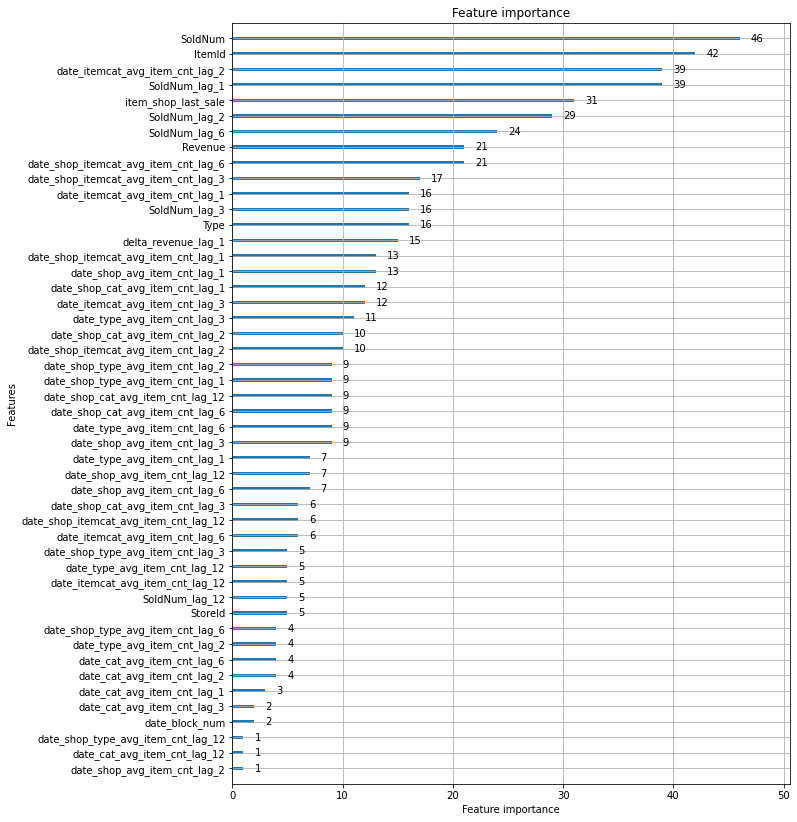

In [26]:
fig,ax = plt.subplots(1,1,figsize=(10,14))
lightgbm.plot_importance(model,ax)

In [27]:
Y_test.shape

(3060,)

In [28]:
sub = pd.DataFrame(Y_test)
sub=sub.reset_index()
sub.drop('index',axis=1,inplace=True)
#sub.to_csv('./sub/sub_lgbm_170_data_shifted_n102.csv',header=None)
sub

,0
0,0.741550
1,0.461323
2,0.945228
3,1.863013
4,4.886383
...,...
3055,0.801827
3056,0.107363
3057,0.107363
3058,0.107363


# MinMax&Std scaler170item n62 shifted
- train rmse: 1.3245948315184255 
- valid rmse: 1.0832403686966705

# 170item n62 shifted
- train rmse: 1.3245948315184255 
- valid rmse: 1.0831562001746171
# 170item n15 shifted
- train rmse: 1.9521866522059823 
- valid rmse: 1.0837525295531663

# 170item n102 shifted
- train rmse: 1.4367909206592175 
- valid rmse: 1.0366511792454673


### 170item
- train rmse: 0.3514101314248571 
- valid rmse: 0.35570241819879894

### n60
#'YYYY',  #'MM',  #'StoreId', #'ItemId', ( #'StoreId', #'ItemId',と同スコア）

### XGboost
- train rmse: 0.29034735378634735 
- valid rmse: 0.34442551777180663
### LGBM
- train rmse: 0.21164506441564213 
- valid rmse: 0.22978429540944267

### 26 features
- train rmse: 0.36613899749754336 
- valid rmse: 0.34295317268310577
### n102 (with from total w/o outlier)
- train rmse: 0.29084835741109794 
- valid rmse: 0.2824319863692583

### all_item
- train rmse: 2.2297869317767787 
- valid rmse: 1.6987105703234906

### all_data outlier
- train rmse: 1.5102106962876753 
- valid rmse: 1.5436462588268263